In [13]:
from helper import*
import params as cfg
import sys
sys.path.insert(1, '/Users/joshuaighalo/Documents/GitHub/eegDementia')

In [79]:
"Functions utilized in this script"
def multipleFilesNotch(input_3d,fs):
    notch_out = []
    filtering = filters()
    for i in range(input_3d.shape[0]):
        notch_out.append(filtering.notch(input_3d[i,:,:],fs))
    return np.array(notch_out)
def multipleFilesbutterBandpass(input_3d,lowcut,highcut,fs):
    butter_out = []
    filtering = filters()
    for i in range(input_3d.shape[0]):
        butter_out.append(filtering.butterBandPass(input_3d[i,:,:],lowcut,highcut,fs))
    return np.array(butter_out)
def multipleAvgBandPower(input_3d,fs,low,high):
    avg_out = []
    for i in range(input_3d.shape[0]):
        avg_out.append(avgBandPower(input_3d[i,:,:],fs,low,high))
    return np.array(avg_out)
def multipleEMD(input3D):
    def EMD(data):
        def param(data,template_1,template_2):
            imf_chans = emd.sift.sift(data)
            corr = []
            for i in range(imf_chans.shape[1]):
                corr.append(np.corrcoef(imf_chans[:,i],template_1)[0,1])
            corr = np.array(corr)
            # extract indices of negative correlation
            pos_corr = np.where(corr > 0)[0]
            cleanIMFS = np.delete(imf_chans,pos_corr,axis=1)
            regen_signal_1 = np.sum(cleanIMFS,axis=1)

            imf_chans = emd.sift.sift(regen_signal_1)
            corr = []
            for i in range(imf_chans.shape[1]):
                corr.append(np.corrcoef(imf_chans[:,i],template_2)[0,1])
            corr = np.array(corr)
            # extract indices of negative correlation
            pos_corr = np.where(corr > 0)[0]
            cleanIMFS = np.delete(imf_chans,pos_corr,axis=1)
            regen_signal_2 = np.sum(cleanIMFS,axis=1)
            return regen_signal_2
        emd_tp9 = param(data[:,0],data[:,1],data[:,2])
        emd_tp10 = param(data[:,3],data[:,1],data[:,2])
        emd_af7 = data[:,1]
        emd_af8 = data[:,2]
        return np.vstack((emd_tp9,emd_af7,emd_af8,emd_tp10)).T
    emd_out = []
    for i in range(input3D.shape[0]):
        emd_out.append(EMD(input3D[i,:,:]))
    return np.array(emd_out)
def multipleAdaptiveFilter(input3D):
    def param(input2D):
        filtering = filters()
        eegchan = input2D[:,[0,3]]
        eogchan = input2D[:,[1,2]]
        adap = filtering.adaptive(eegchan,eogchan)
        adap = np.vstack((adap[:,0],eogchan[:,0],eogchan[:,1],adap[:,1])).T
        return adap
    adap_out = []
    for i in range(input3D.shape[0]):
        adap_out.append(param(input3D[i,:,:]))
    return np.array(adap_out)
def multipleFilesICA(input_3d,fs):
    ica_out = []
    for i in range(input_3d.shape[0]):
        ica_out.append(ICA(input_3d[i,:,:],fs))
    return np.array(ica_out)
def pk2pk(input,threshold):
    def fnc(data,threshold_):
        # replace all values greater than threshold by the mean of the neighboring values
        if threshold_ > 0:
            data[data > threshold_] = np.mean(data[data < threshold_])
        if threshold_ < 0:
            data[data < threshold_] = np.mean(data[data > threshold_])
        #data[np.where(abs(data) > threshold_)] = 0
        return data
    p1 = fnc(input[:,0],threshold[0])
    p2 = fnc(input[:,1],threshold[1])
    p3 = fnc(input[:,2],threshold[2])
    p4 = fnc(input[:,3],threshold[3])
    return np.array([p1,p2,p3,p4]).T
def multipleConvert2Zeros(input3D):
    def params(data):
        data[:,1] = np.zeros(len(data[:,1]))
        data[:,2] = np.zeros(len(data[:,2]))
        return data
    def convert2zeros(data2D):
        return params(data2D)
    out3D = []
    for i in range(input3D.shape[0]):
        out3D.append(convert2zeros(input3D[i,:,:]))
    return np.array(out3D)

In [15]:
#   Group-Task-Time
M11 = ['m11_1.zip','m11_2.zip','m11_3.zip','m11_4.zip','m11_5.zip']
M21 = ['m21_1.zip','m21_2.zip','m21_3.zip','m21_4.zip','m21_5.zip']
M12 = ['m12_1.zip','m12_2.zip','m12_3.zip','m12_4.zip','m12_5.zip']
M22 = ['m22_1.zip','m22_2.zip','m22_3.zip','m22_4.zip','m22_5.zip']
C11 = ['c11_1.zip','c11_2.zip','c11_3.zip','c11_4.zip','c11_5.zip']
C21 = ['c21_1.zip','c21_2.zip','c21_3.zip','c21_4.zip','c21_5.zip']
C12 = ['c12_1.zip','c12_2.zip','c12_3.zip','c12_4.zip','c12_5.zip']
C22 = ['c22_1.zip','c22_2.zip','c22_3.zip','c22_4.zip','c22_5.zip']
localDir = "/Users/joshuaighalo/Downloads/Mind_Monitor/"
destDir = "/Users/joshuaighalo/Downloads/Mind_Monitor/dest/"
os.system('rm -rf %s/*' % destDir)
fs_setting = 'constant'

In [16]:
#   Extract eeg data fro participants within the groups
M11 = zipExtract(M11,localDir,destDir,"M11",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
M21 = zipExtract(M21,localDir,destDir,"M21",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
M12 = zipExtract(M12,localDir,destDir,"M12",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
M22 = zipExtract(M22,localDir,destDir,"M22",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
C11 = zipExtract(C11,localDir,destDir,"C11",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
C21 = zipExtract(C21,localDir,destDir,"C21",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
C12 = zipExtract(C12,localDir,destDir,"C12",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
C22 = zipExtract(C22,localDir,destDir,"C22",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
time_s = np.arange(0,cfg.collection_time,1/cfg.fs)

In [17]:
"""
denoiseM11 = multipleAdaptiveFilter(M11)
denoiseM21 = multipleAdaptiveFilter(M21)
denoiseM12 = multipleAdaptiveFilter(M12)
denoiseM22 = multipleAdaptiveFilter(M22)
denoiseC11 = multipleAdaptiveFilter(C11)
denoiseC21 = multipleAdaptiveFilter(C21)
denoiseC12 = multipleAdaptiveFilter(C12)
denoiseC22 = multipleAdaptiveFilter(C22)
"""

'\ndenoiseM11 = multipleAdaptiveFilter(M11)\ndenoiseM21 = multipleAdaptiveFilter(M21)\ndenoiseM12 = multipleAdaptiveFilter(M12)\ndenoiseM22 = multipleAdaptiveFilter(M22)\ndenoiseC11 = multipleAdaptiveFilter(C11)\ndenoiseC21 = multipleAdaptiveFilter(C21)\ndenoiseC12 = multipleAdaptiveFilter(C12)\ndenoiseC22 = multipleAdaptiveFilter(C22)\n'

In [18]:
denoiseM11 = multipleAdaptiveFilter(M11)
denoiseM21 = multipleAdaptiveFilter(M21)
denoiseM12 = multipleAdaptiveFilter(M12)
denoiseM22 = multipleAdaptiveFilter(M22)
denoiseC11 = multipleAdaptiveFilter(C11)
denoiseC21 = multipleAdaptiveFilter(C21)
denoiseC12 = multipleAdaptiveFilter(C12)
denoiseC22 = multipleAdaptiveFilter(C22)

In [80]:
#   Notch filters data collected from participants
noc_M11 = multipleFilesNotch(denoiseM11,cfg.fs)
noc_M21 = multipleFilesNotch(denoiseM21,cfg.fs)
noc_M12 = multipleFilesNotch(denoiseM12,cfg.fs)
noc_M22 = multipleFilesNotch(denoiseM22,cfg.fs)
noc_C11 = multipleFilesNotch(denoiseC11,cfg.fs)
noc_C21 = multipleFilesNotch(denoiseC21,cfg.fs)
noc_C12 = multipleFilesNotch(denoiseC12,cfg.fs)
noc_C22 = multipleFilesNotch(denoiseC22,cfg.fs)

In [81]:
#   Bandpass filters data collected from participants
band_M11 = multipleFilesbutterBandpass(noc_M11,cfg.lowcut,cfg.highcut,cfg.fs)
band_M21 = multipleFilesbutterBandpass(noc_M21,cfg.lowcut,cfg.highcut,cfg.fs)
band_M12 = multipleFilesbutterBandpass(noc_M12,cfg.lowcut,cfg.highcut,cfg.fs)
band_M22 = multipleFilesbutterBandpass(noc_M22,cfg.lowcut,cfg.highcut,cfg.fs)
band_C11 = multipleFilesbutterBandpass(noc_C11,cfg.lowcut,cfg.highcut,cfg.fs)
band_C21 = multipleFilesbutterBandpass(noc_C21,cfg.lowcut,cfg.highcut,cfg.fs)
band_C12 = multipleFilesbutterBandpass(noc_C12,cfg.lowcut,cfg.highcut,cfg.fs)
band_C22 = multipleFilesbutterBandpass(noc_C22,cfg.lowcut,cfg.highcut,cfg.fs)

band__M11 = multipleConvert2Zeros(band_M11)
band__M21 = multipleConvert2Zeros(band_M21)
band__M12 = multipleConvert2Zeros(band_M12)
band__M22 = multipleConvert2Zeros(band_M22)
band__C11 = multipleConvert2Zeros(band_C11)
band__C21 = multipleConvert2Zeros(band_C21)
band__C12 = multipleConvert2Zeros(band_C12)
band__C22 = multipleConvert2Zeros(band_C22)

<b>Denoise<b>

In [57]:
args_1 = {'time_s':time_s,'fs':256,'figsize':[35,15],'subTitles':['RAW_TP9','RAW_AF7','RAW_AF8','RAW_TP10'],'title':'Raw','tickRange':[0,120],'timeFrequencyDomainPlots':True}
args_2 = {'time_s':time_s,'fs':256,'figsize':[35,15],'subTitles':['ADAP_TP9','RAW_AF7','RAW_AF8','ADAP_TP10'],'title':'Adaptive','tickRange':[0,120],'timeFrequencyDomainPlots':True}

<b>C11_1<b>

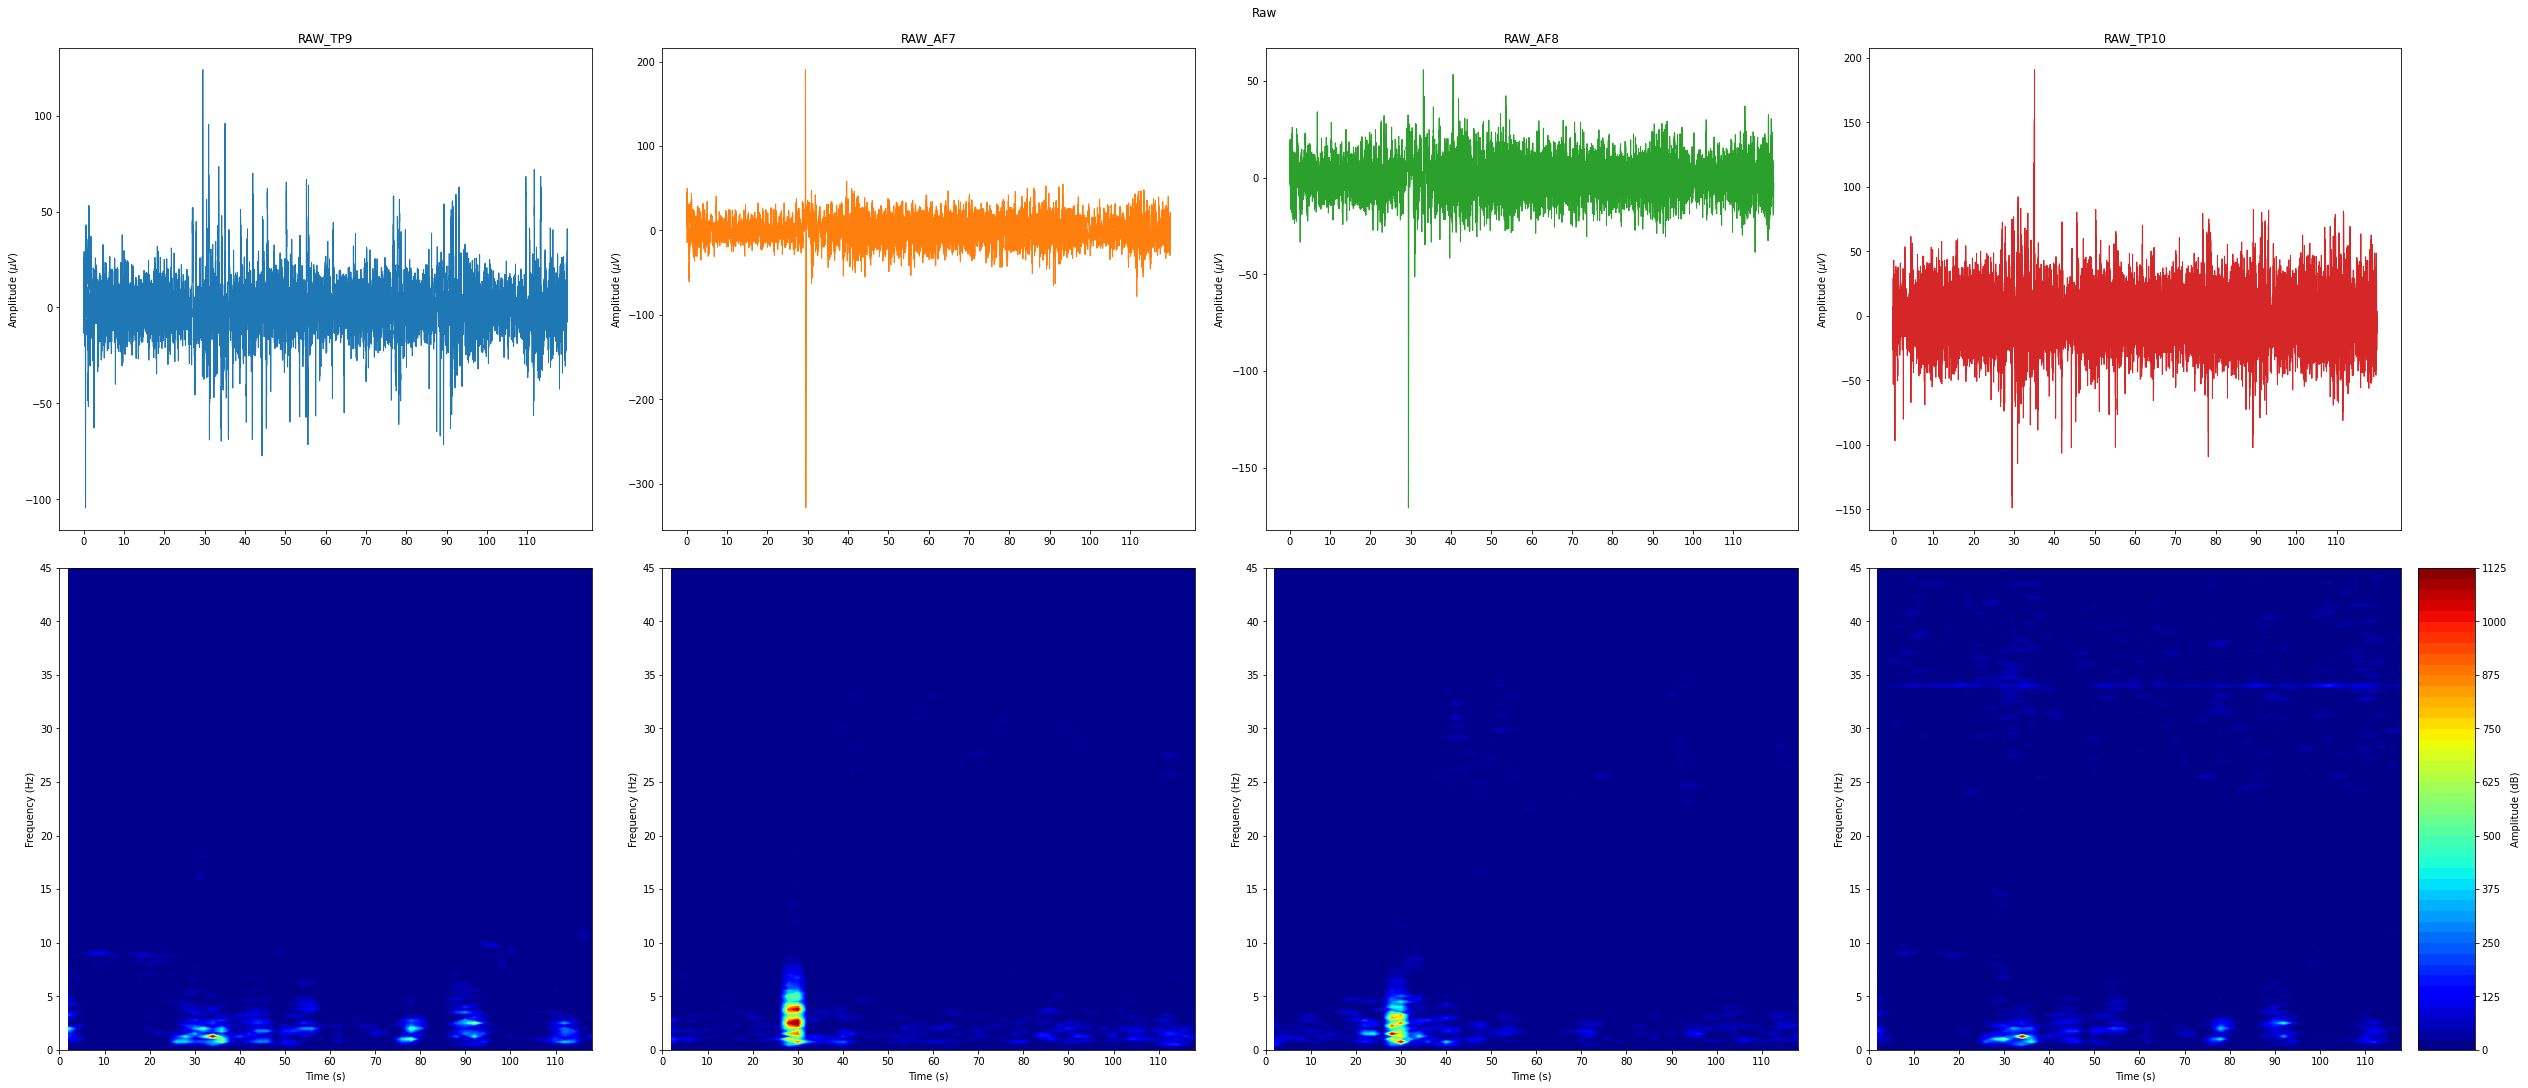

In [58]:
plots(data=band_C11[0],**args_1)

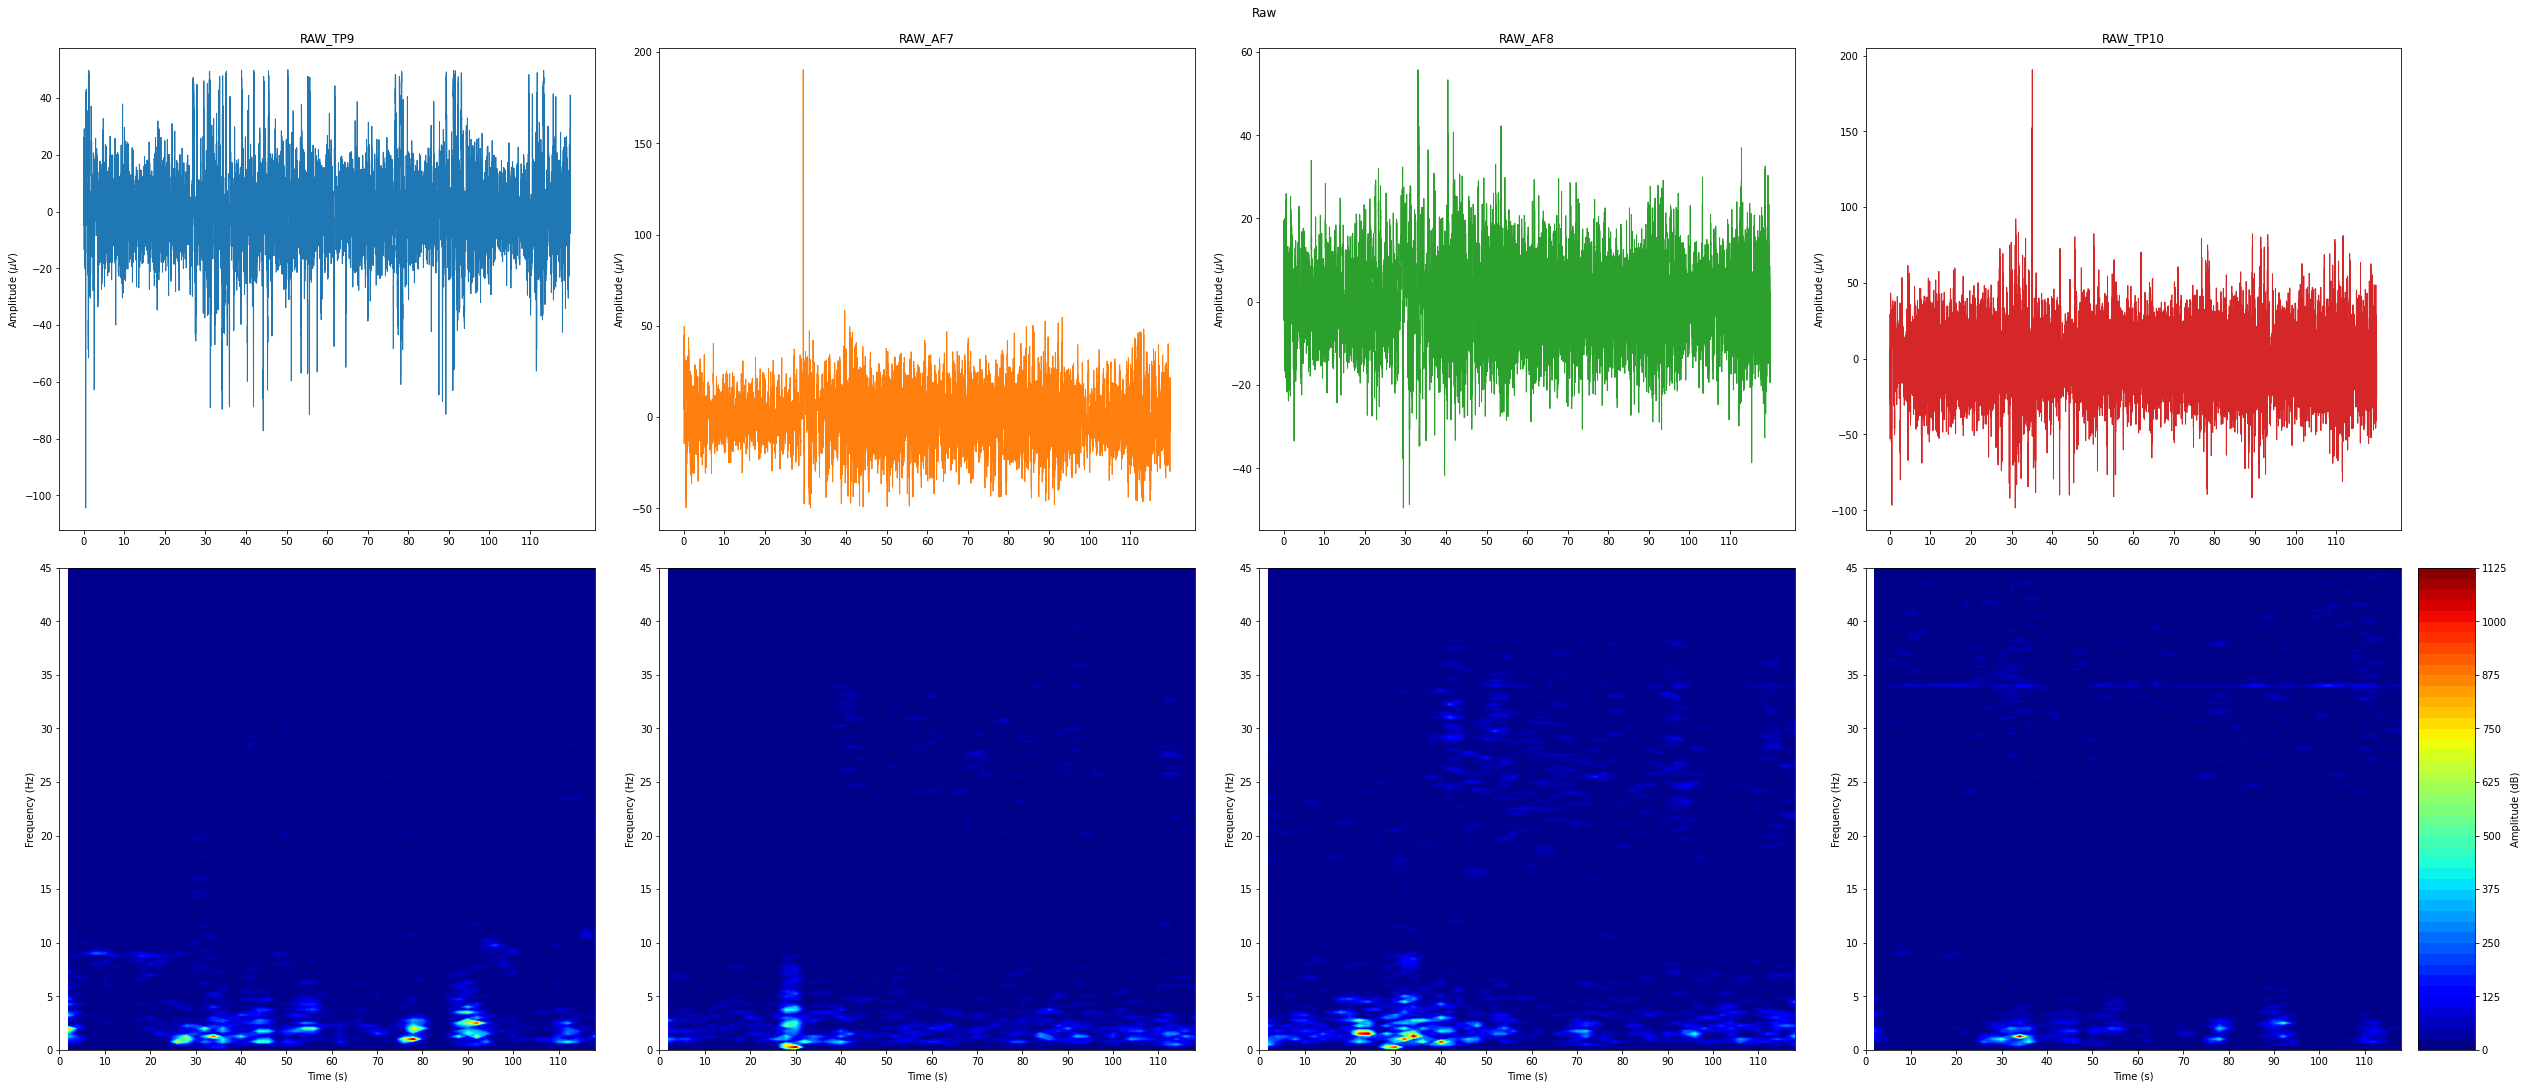

In [61]:
clean_1 = pk2pk(band_C11[0],[50,-50,-50,-100])
plots(data=clean_1,**args_1)

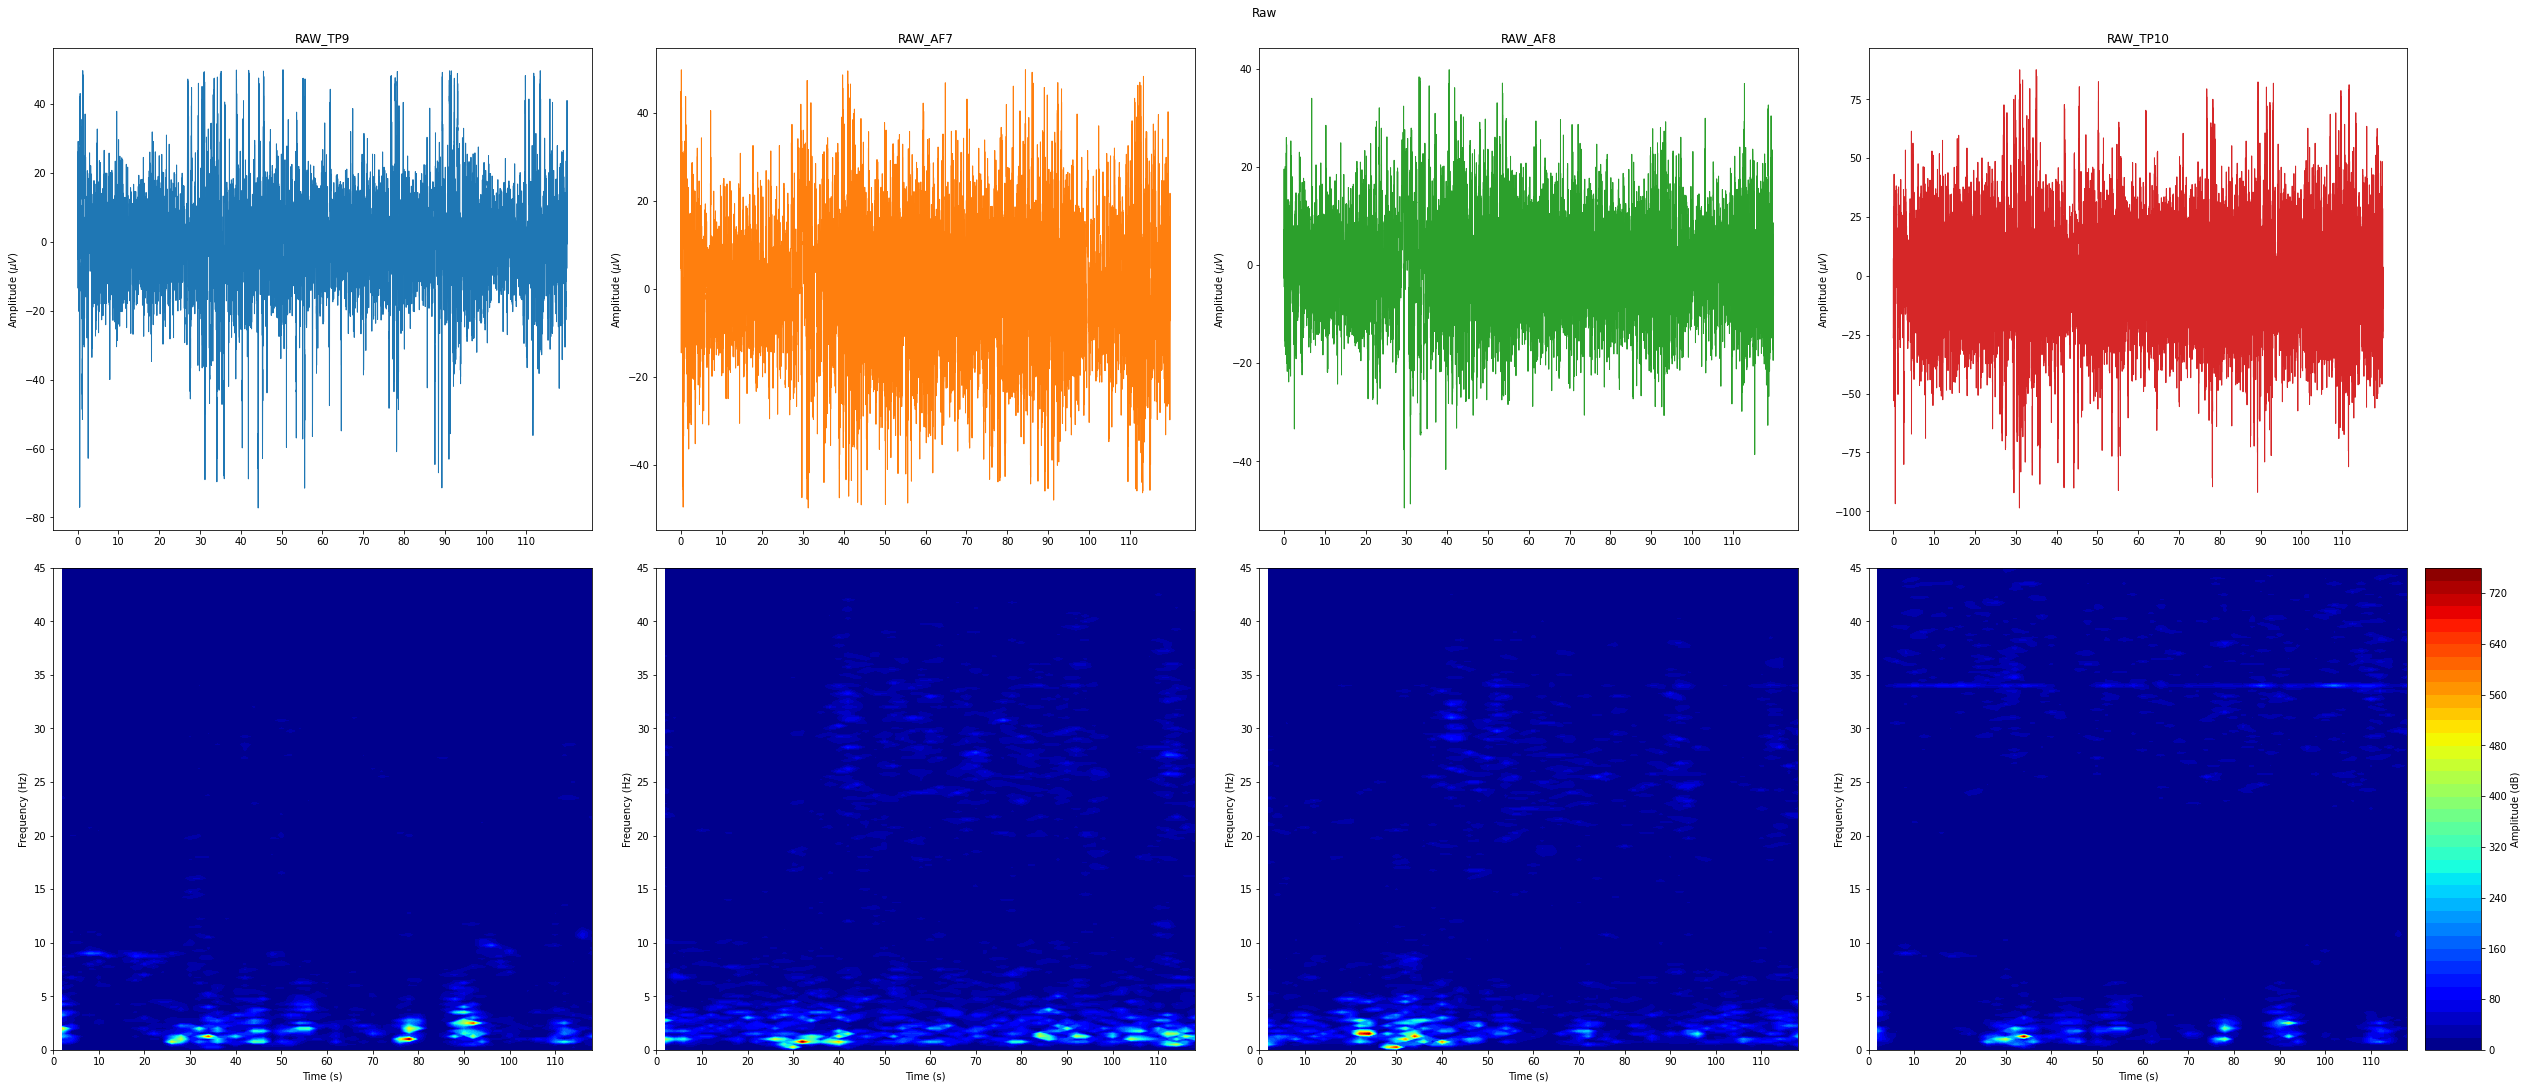

In [62]:
clean_2 = pk2pk(clean_1,[-80,50,40,90])
plots(data=clean_2,**args_1)

<b>C11_2<b>

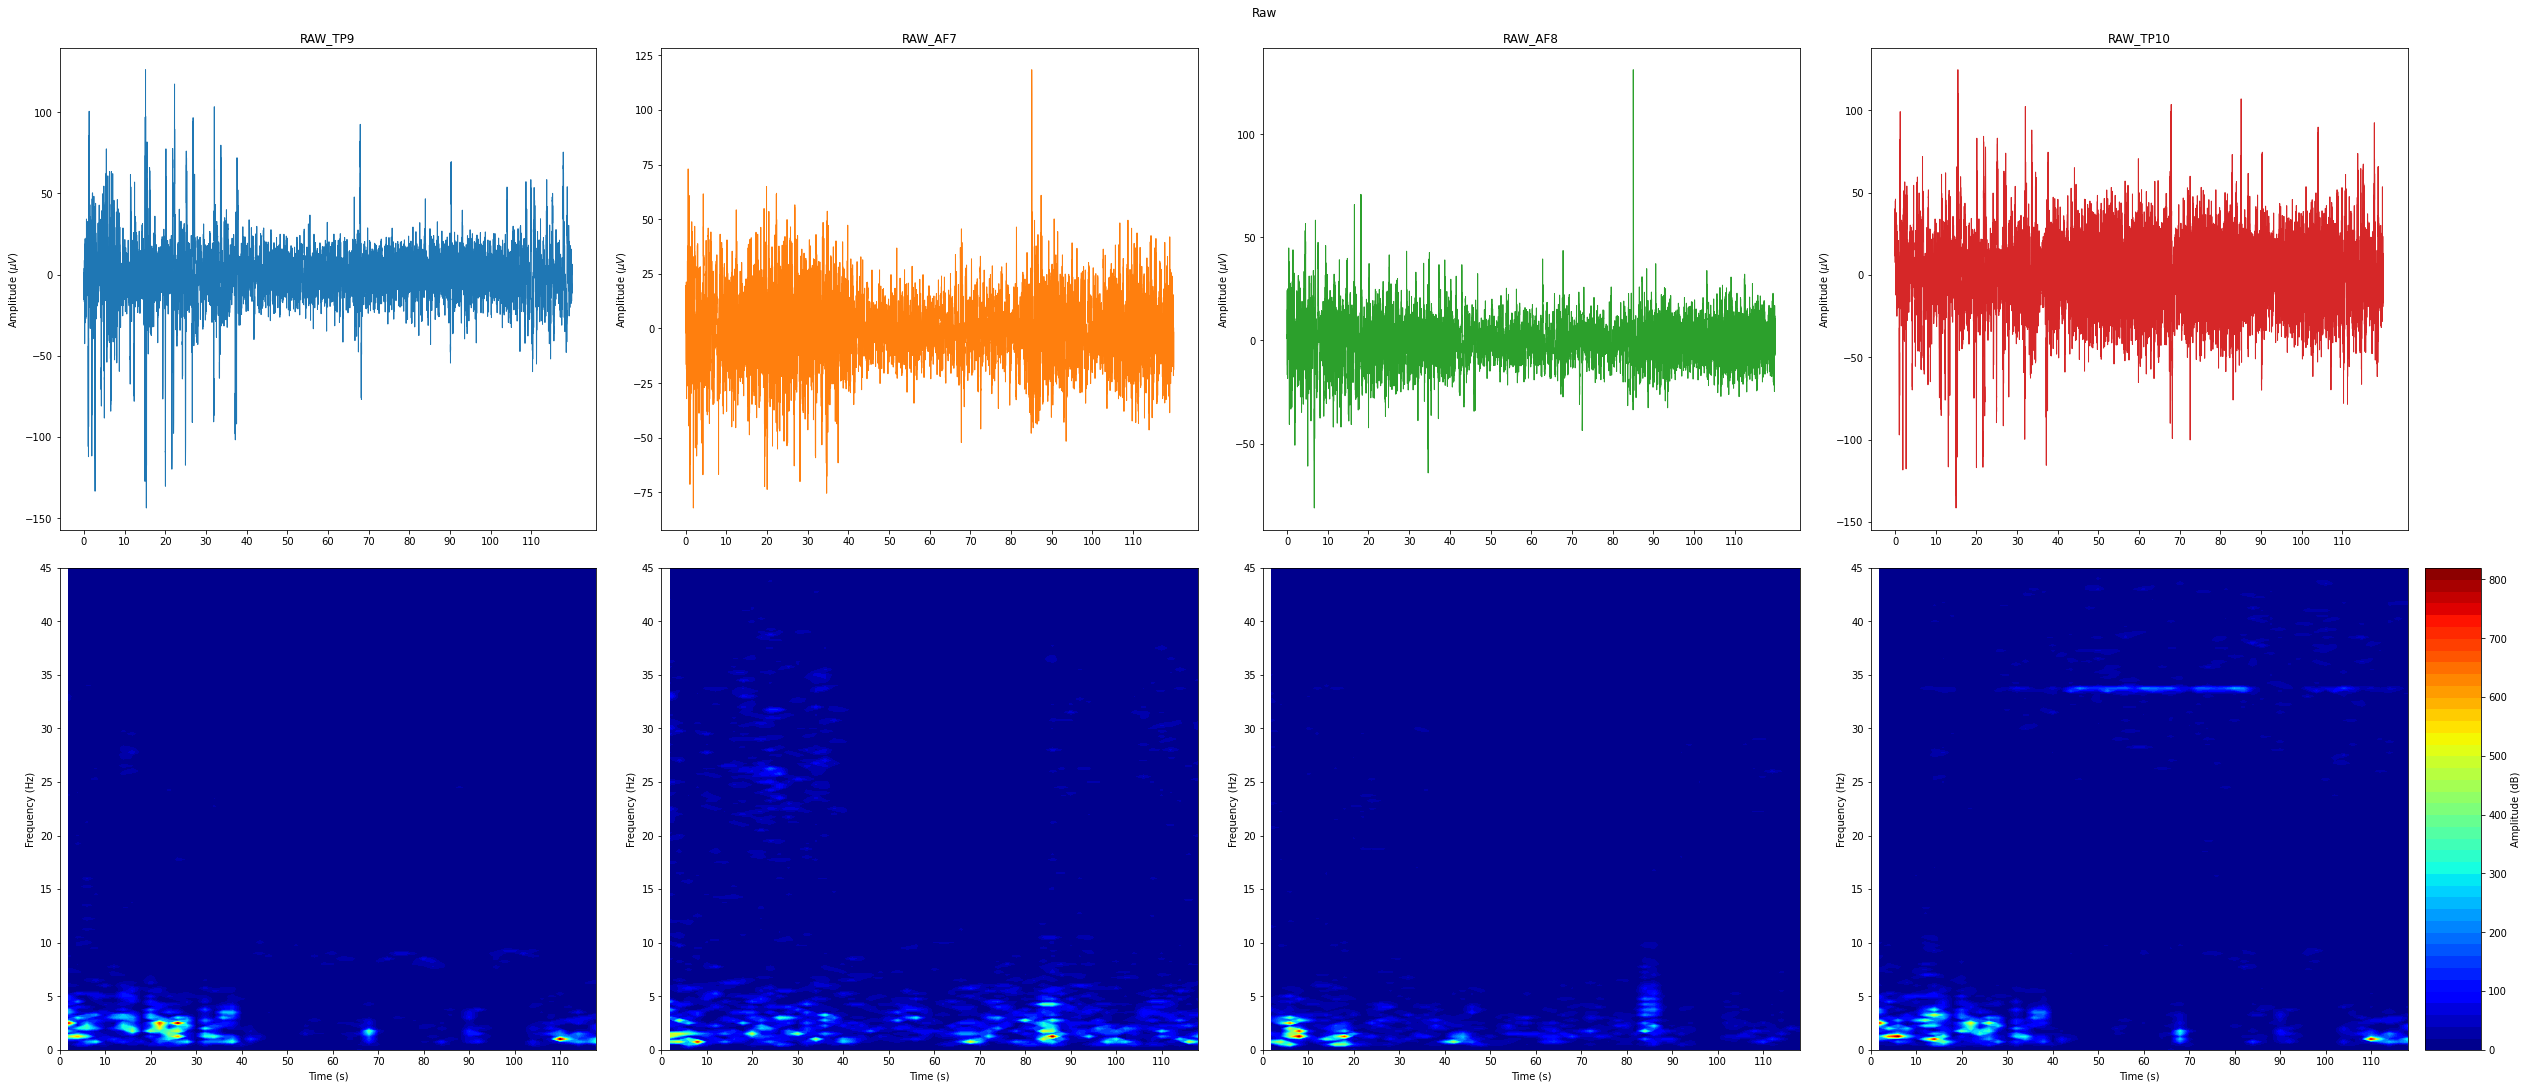

In [63]:
plots(data=band_C11[1],**args_1)

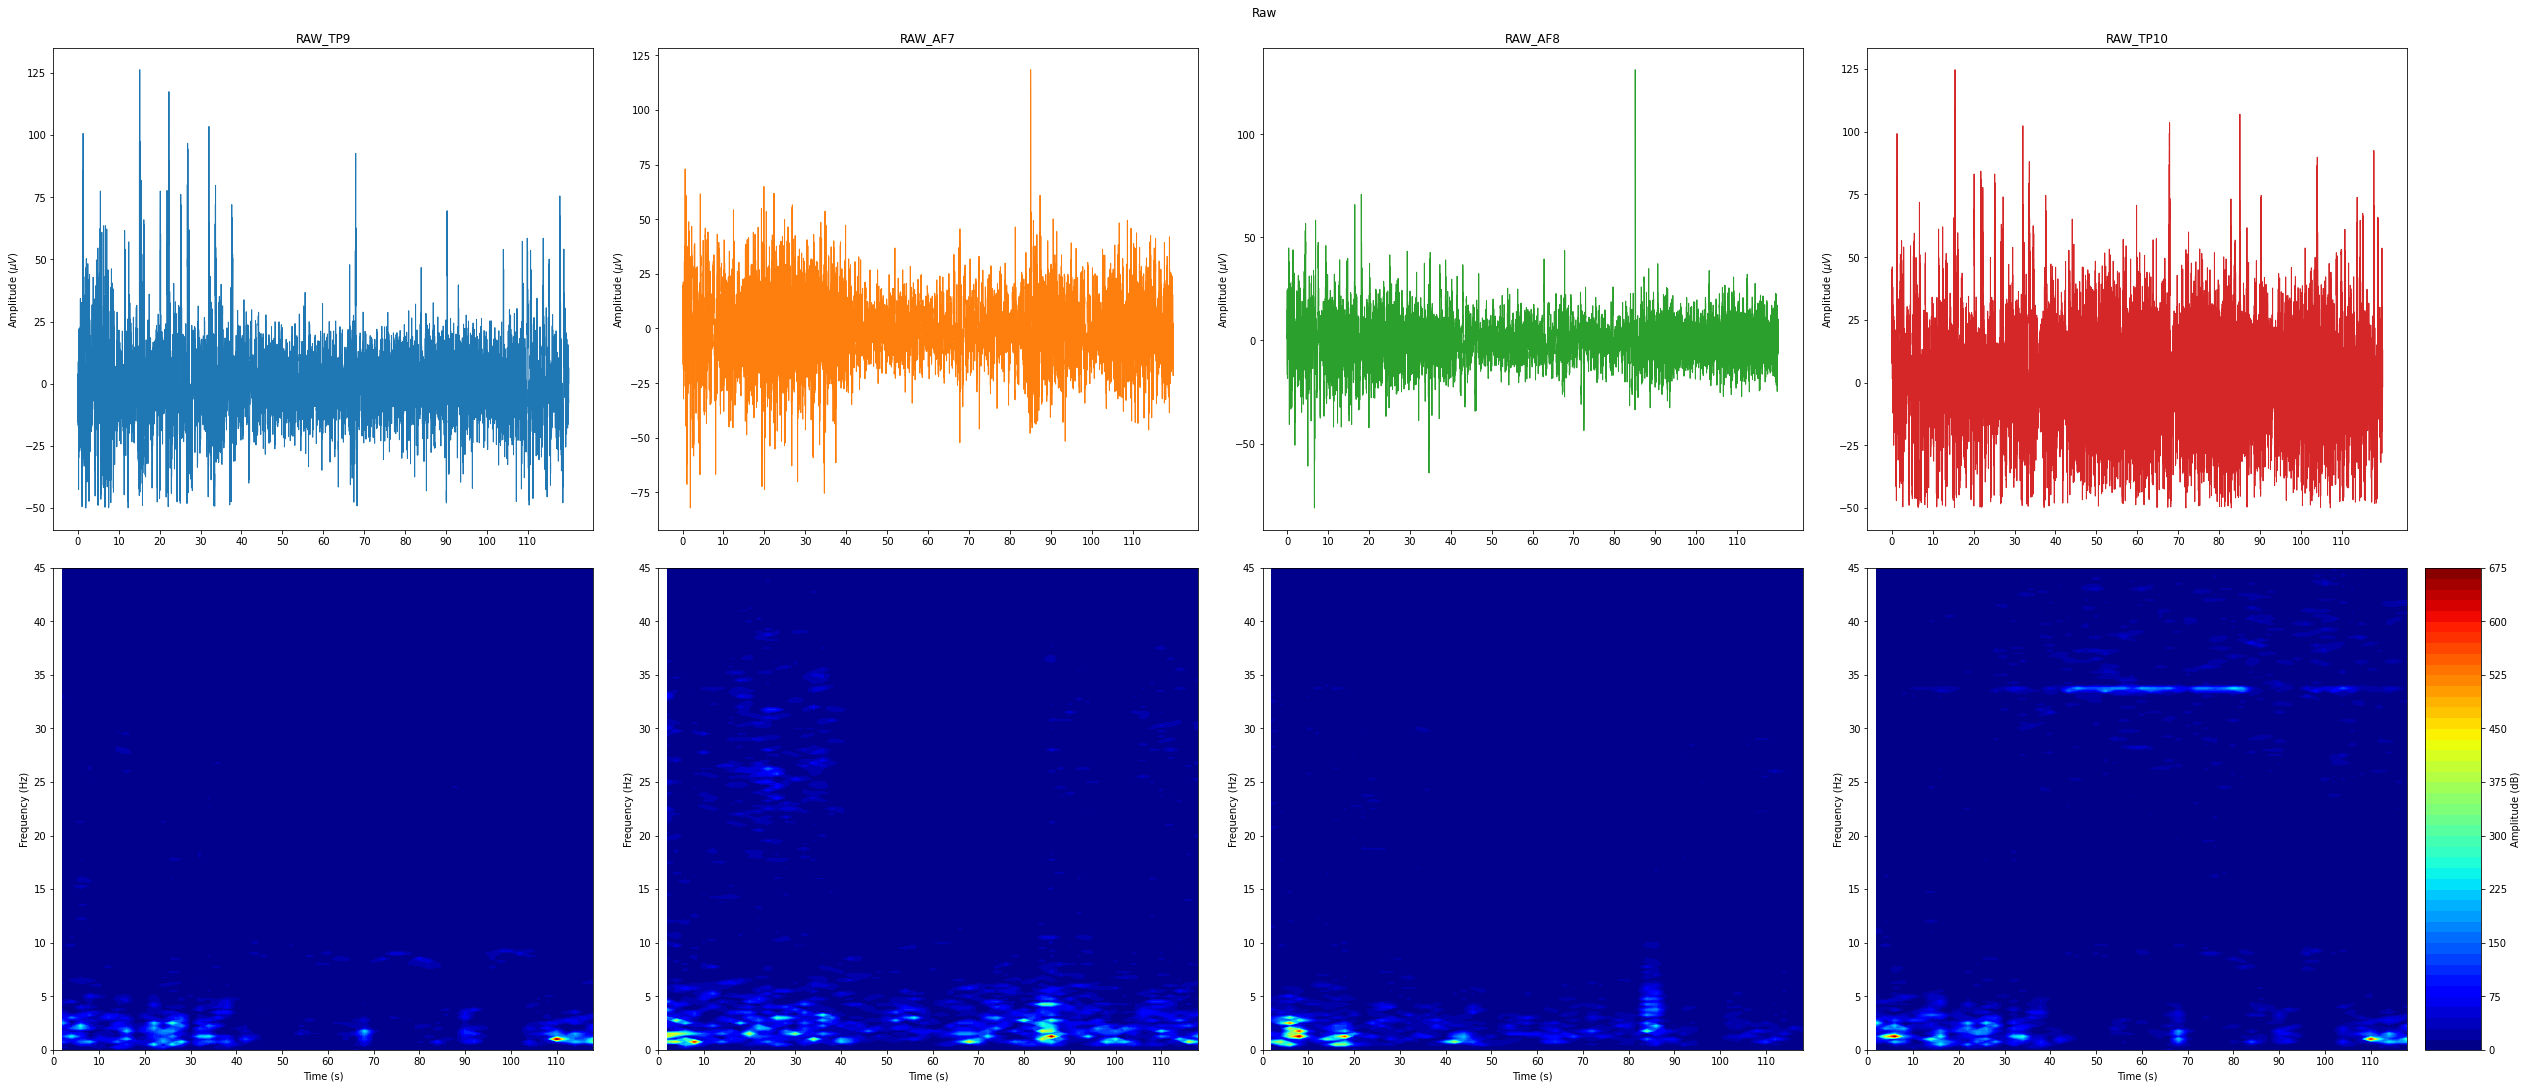

In [64]:
clean_20 = pk2pk(band_C11[1],[-50,200,200,-50])
plots(data=clean_20,**args_1)

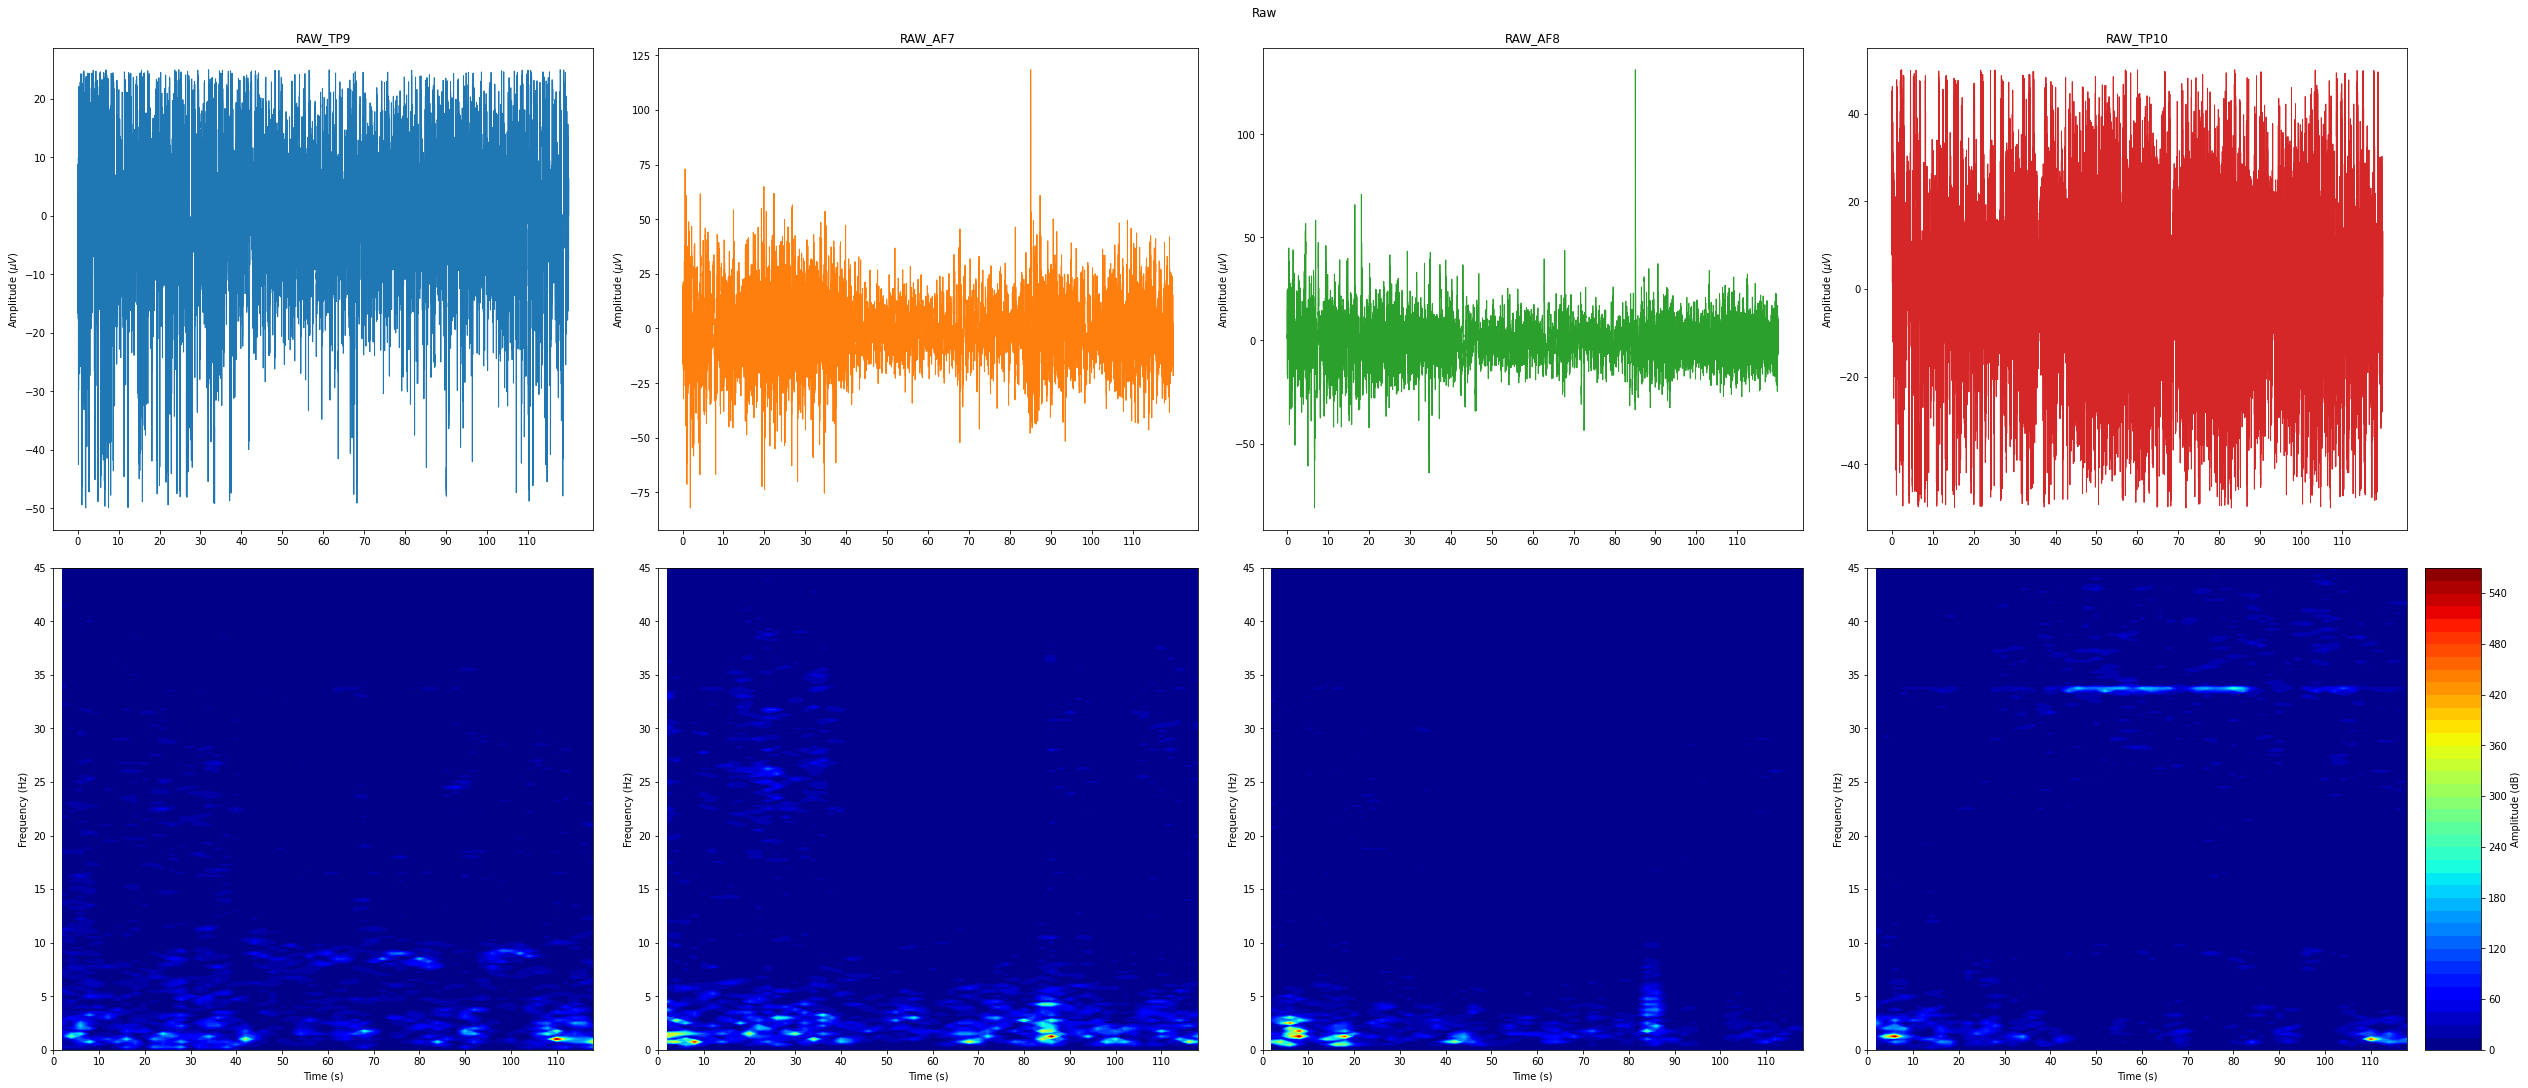

In [65]:
clean_21 = pk2pk(clean_20,[25,200,200,50])
plots(data=clean_21,**args_1)

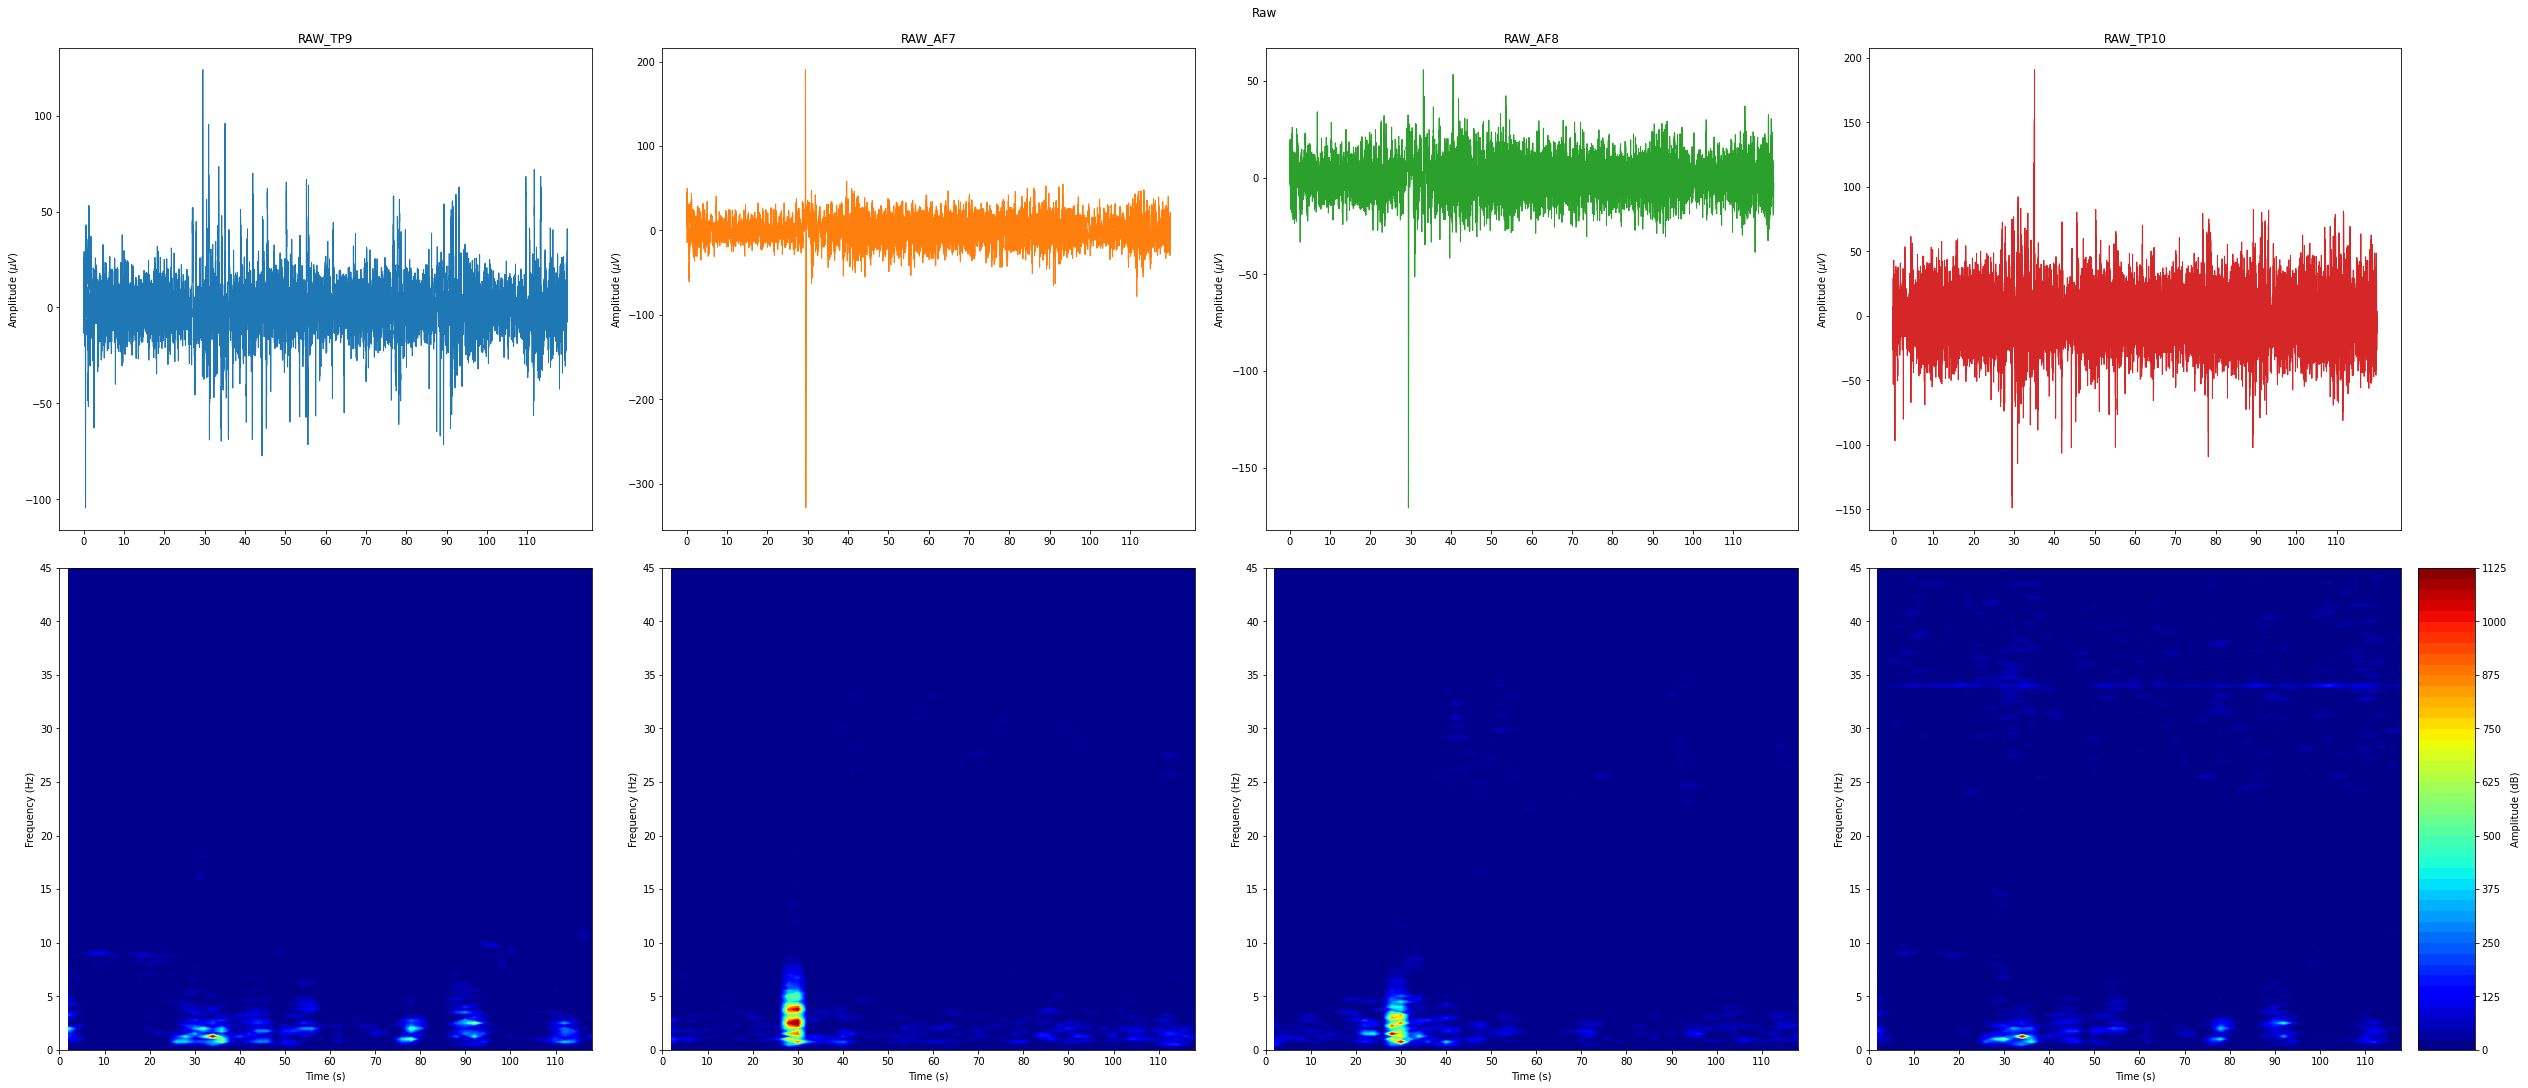

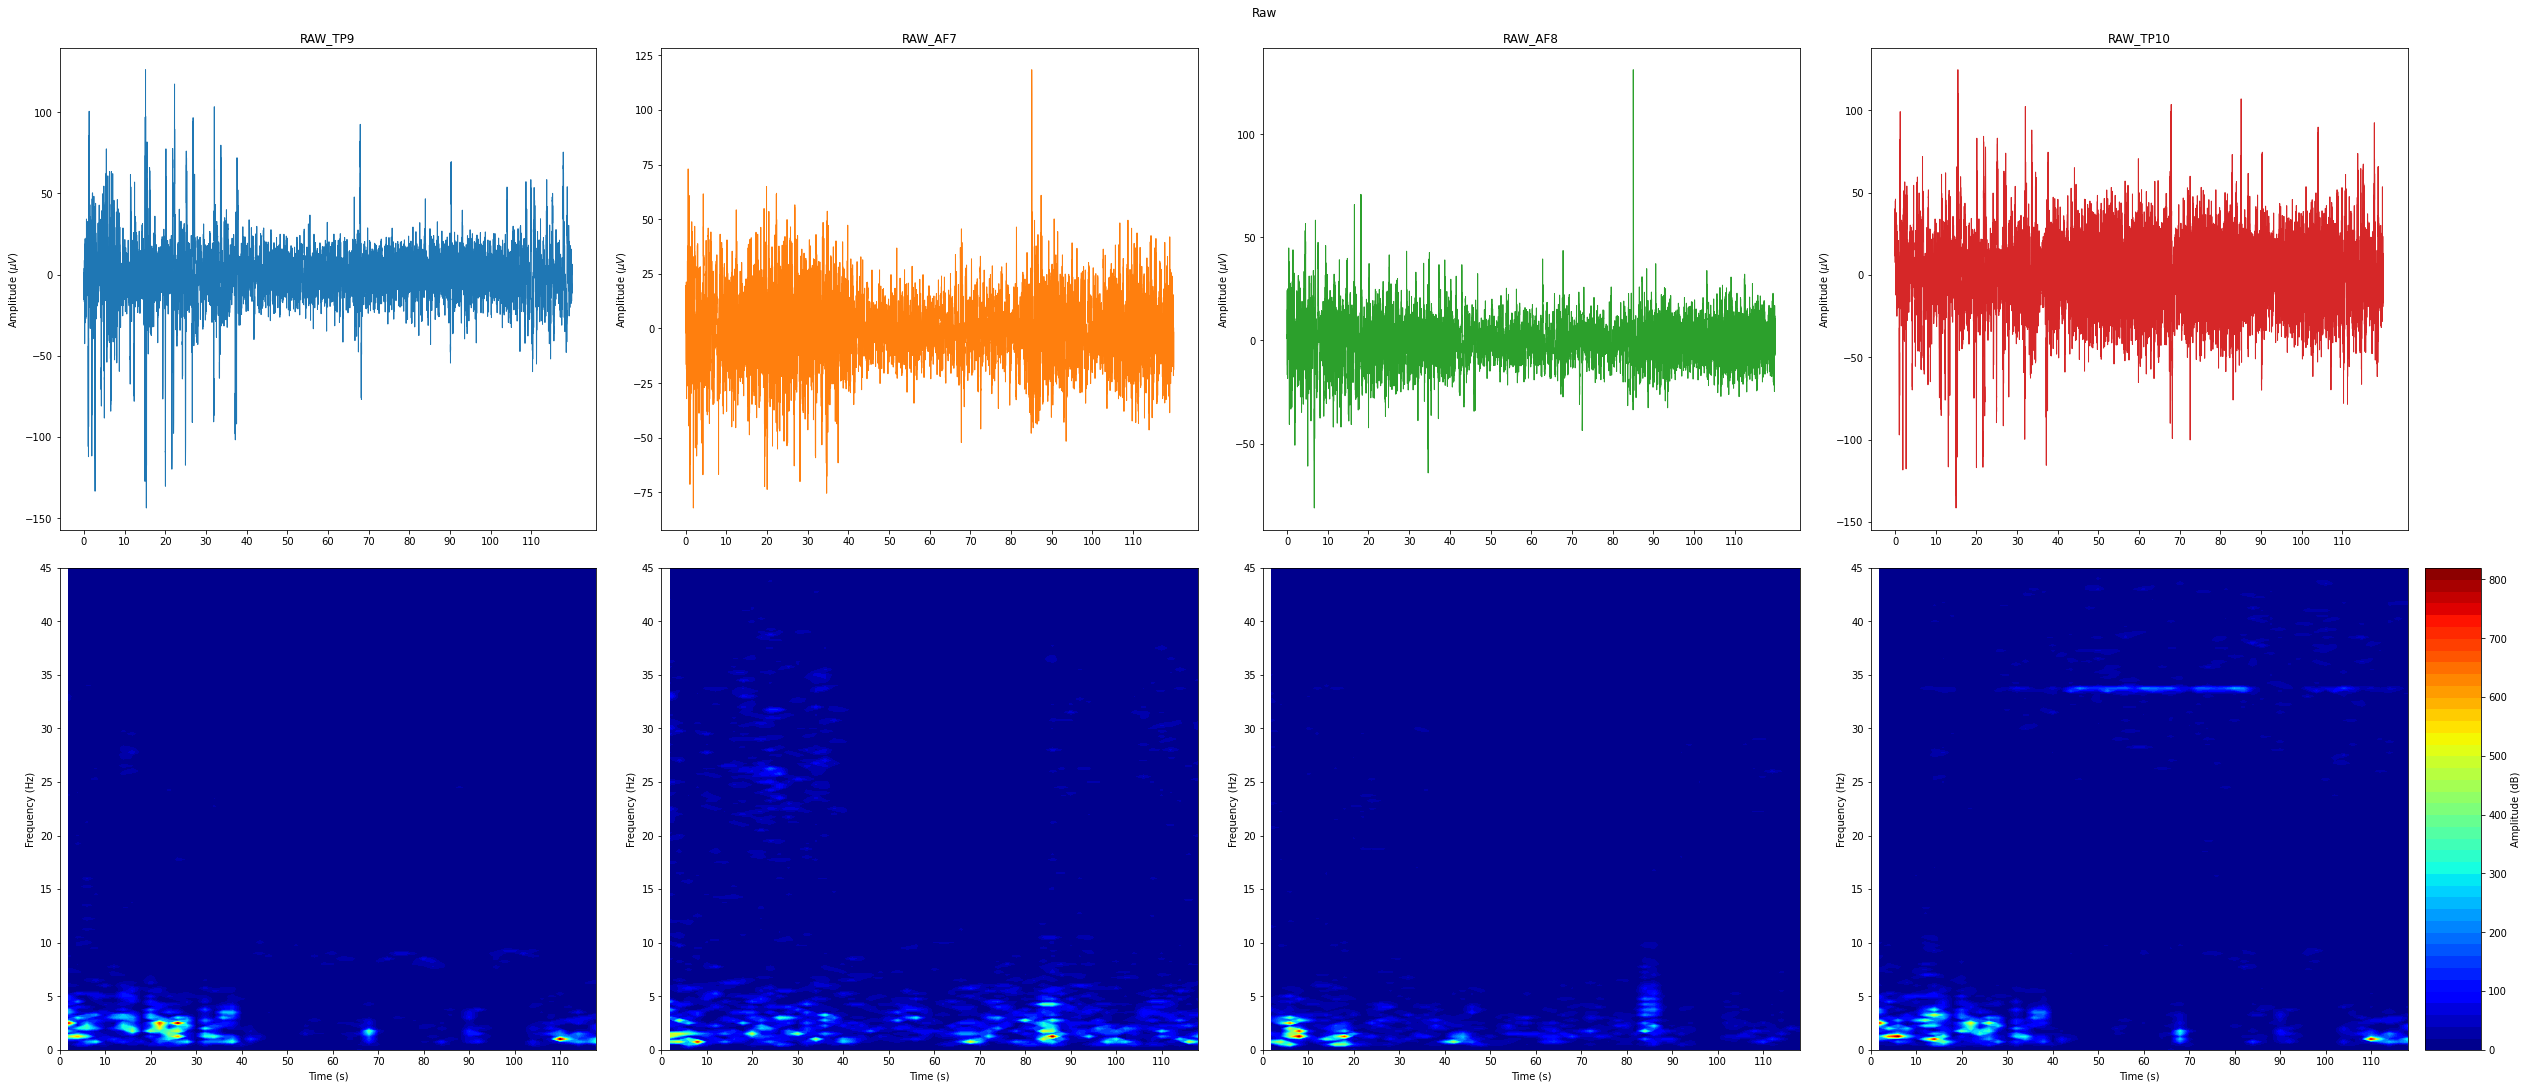

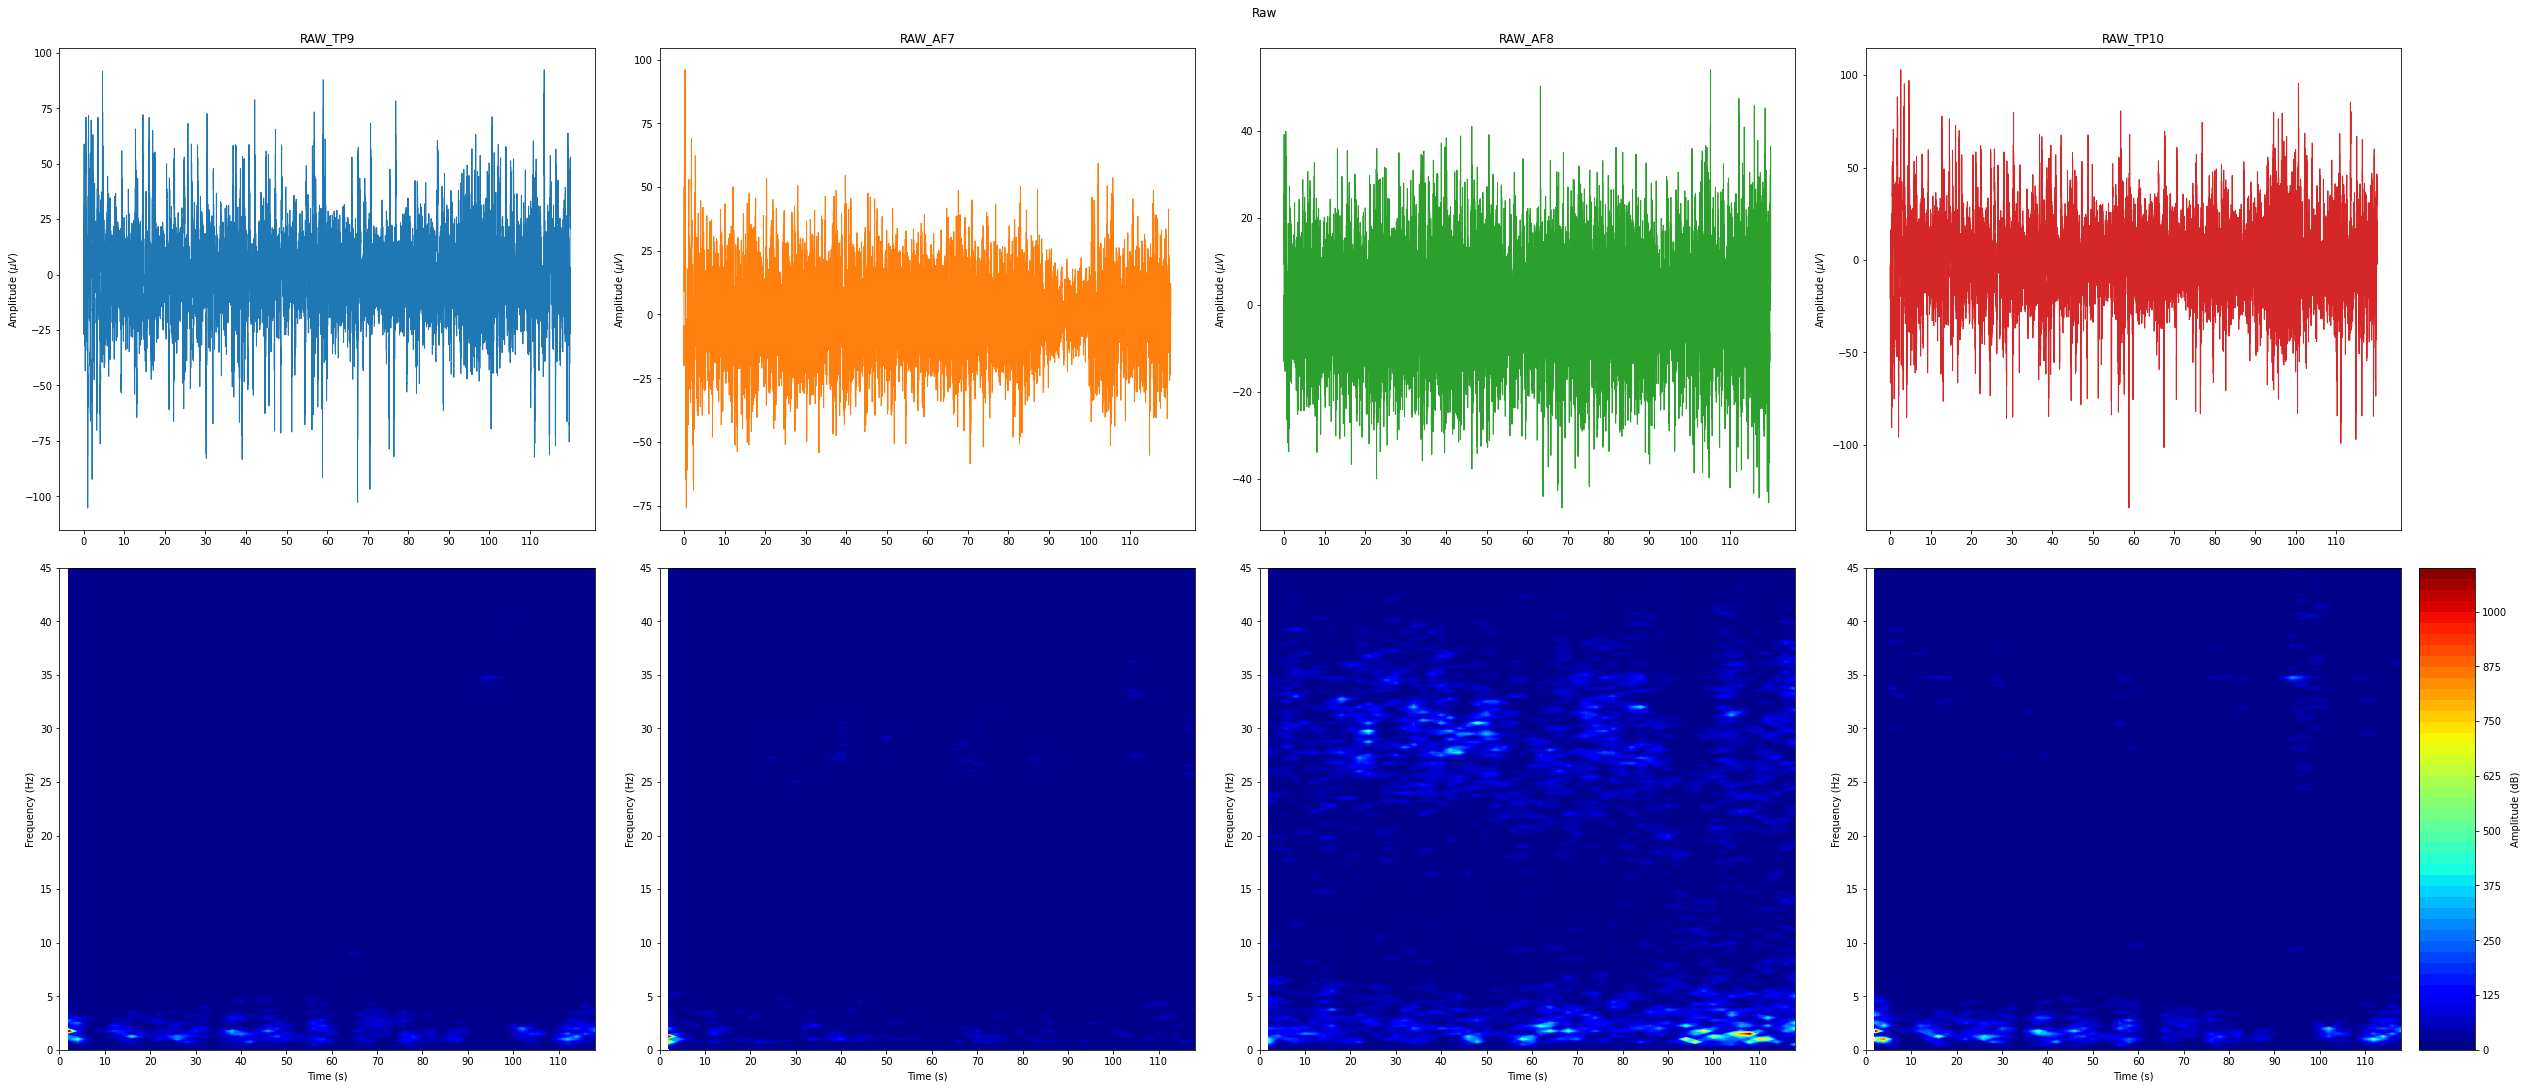

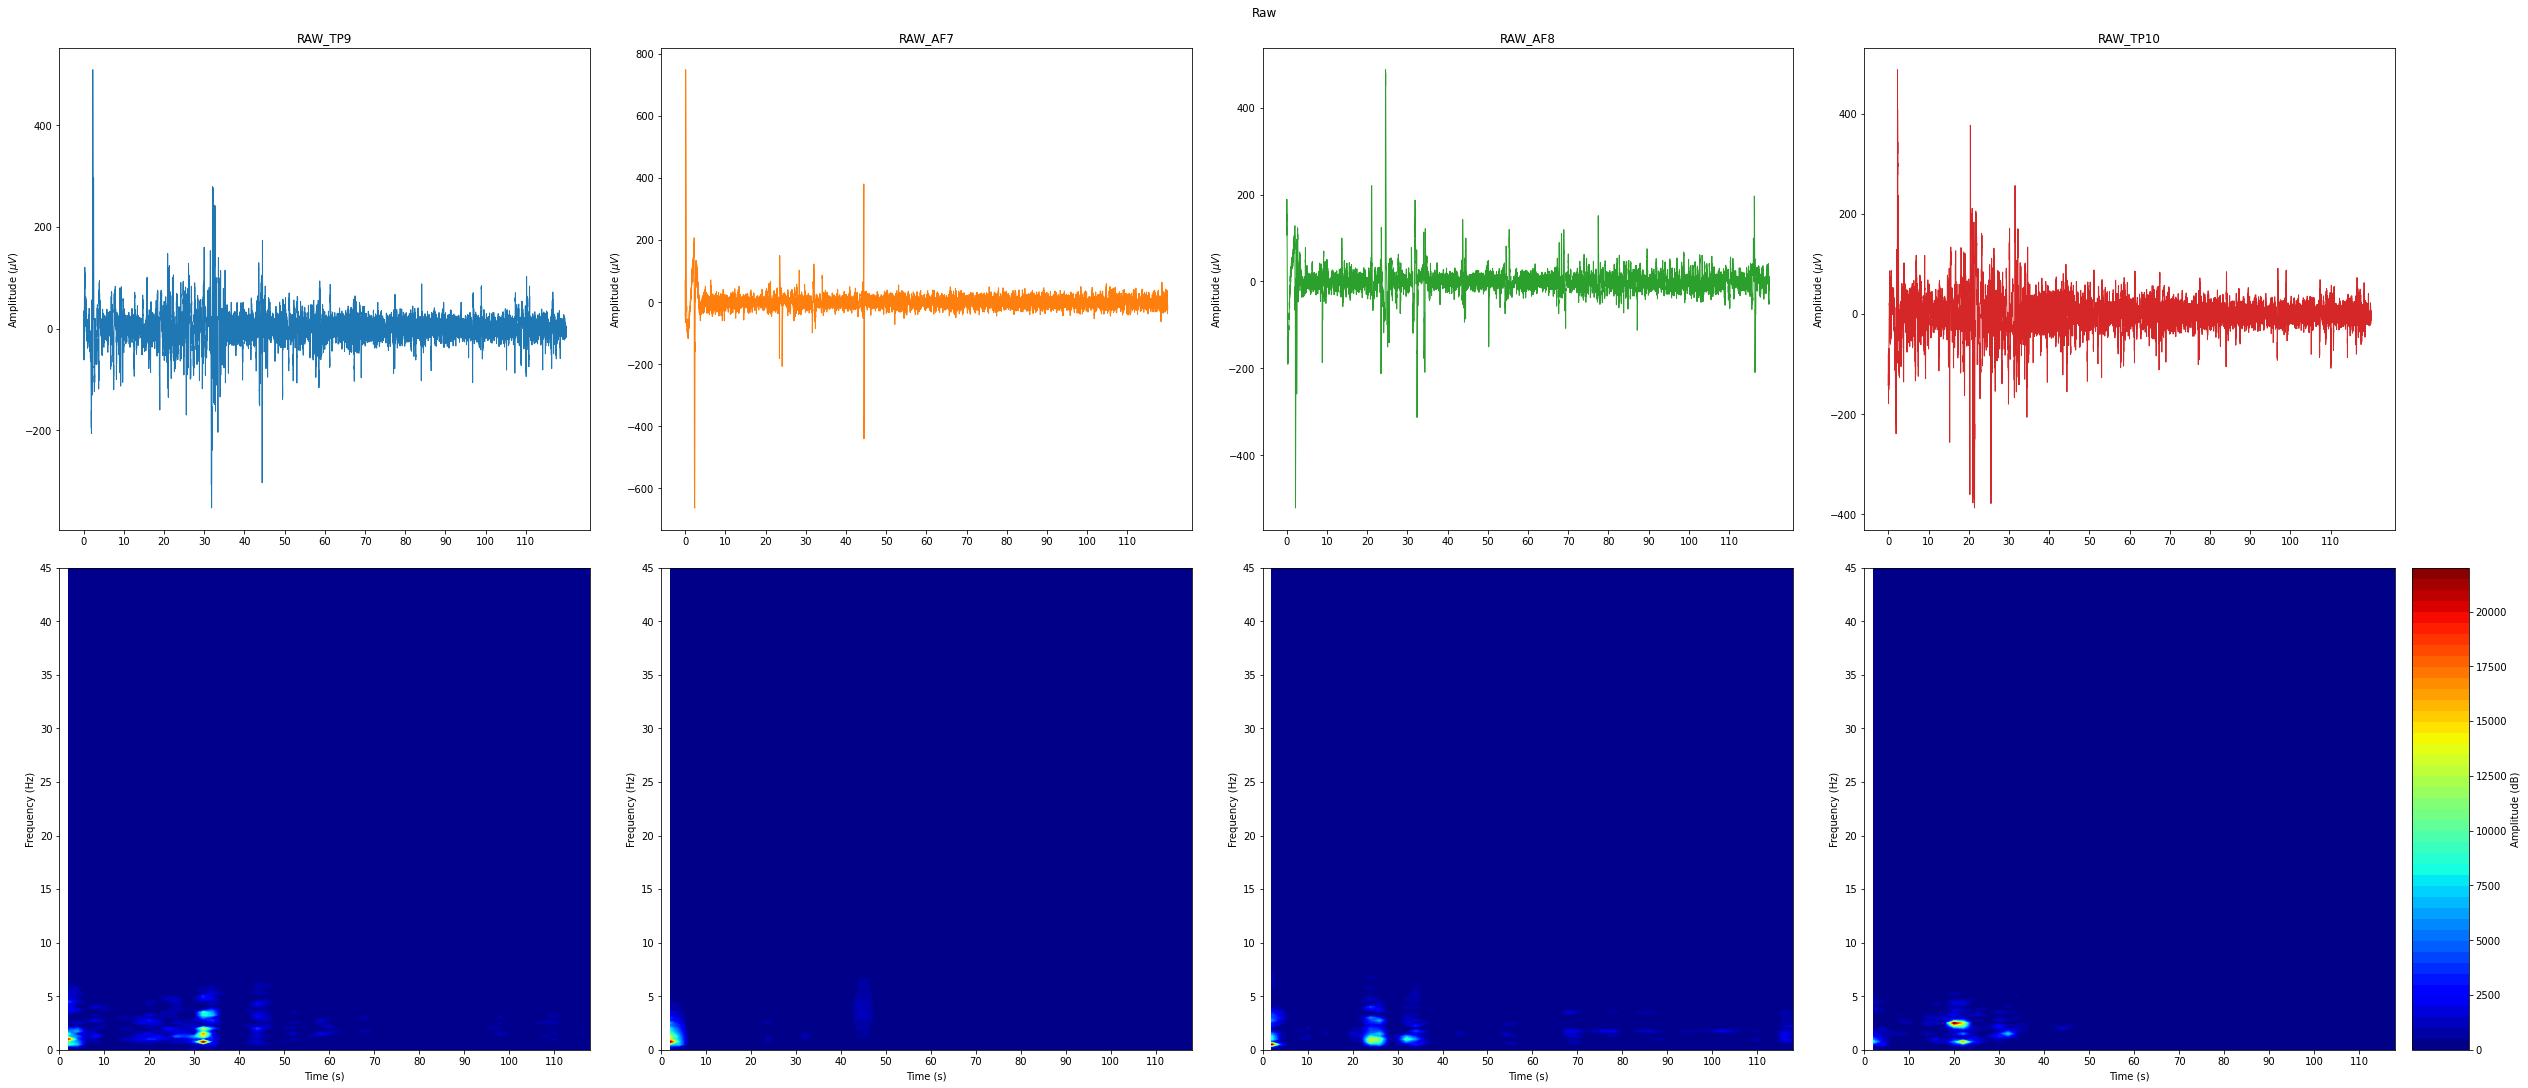

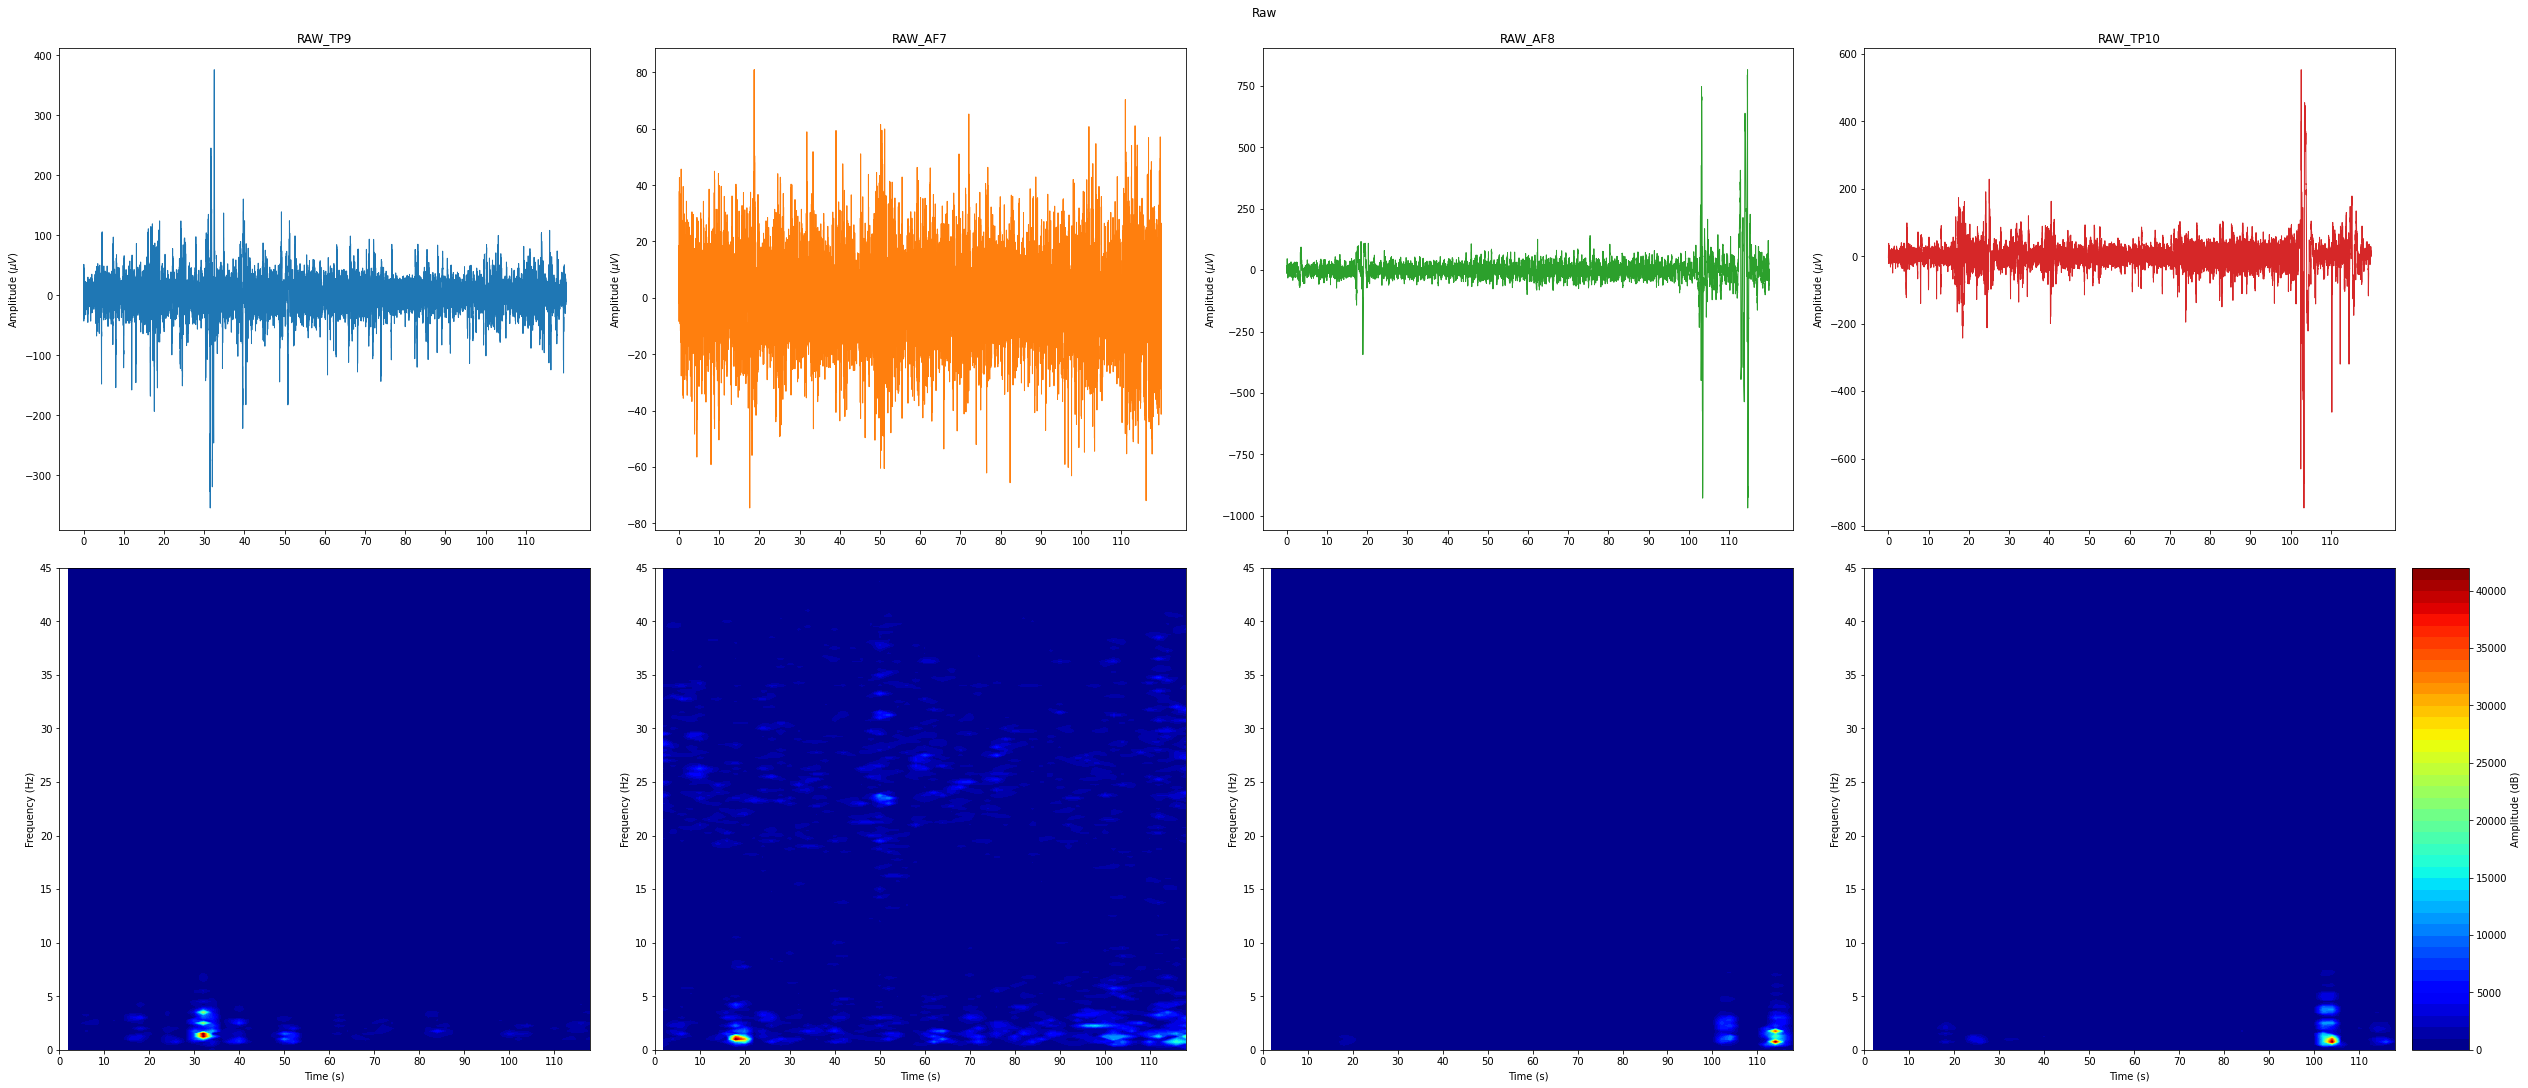

In [26]:
plots(data=band_C11[0],**args_1)
plots(data=band_C11[1],**args_1)
plots(data=band_C11[2],**args_1)
plots(data=band_C11[3],**args_1)
plots(data=band_C11[4],**args_1)

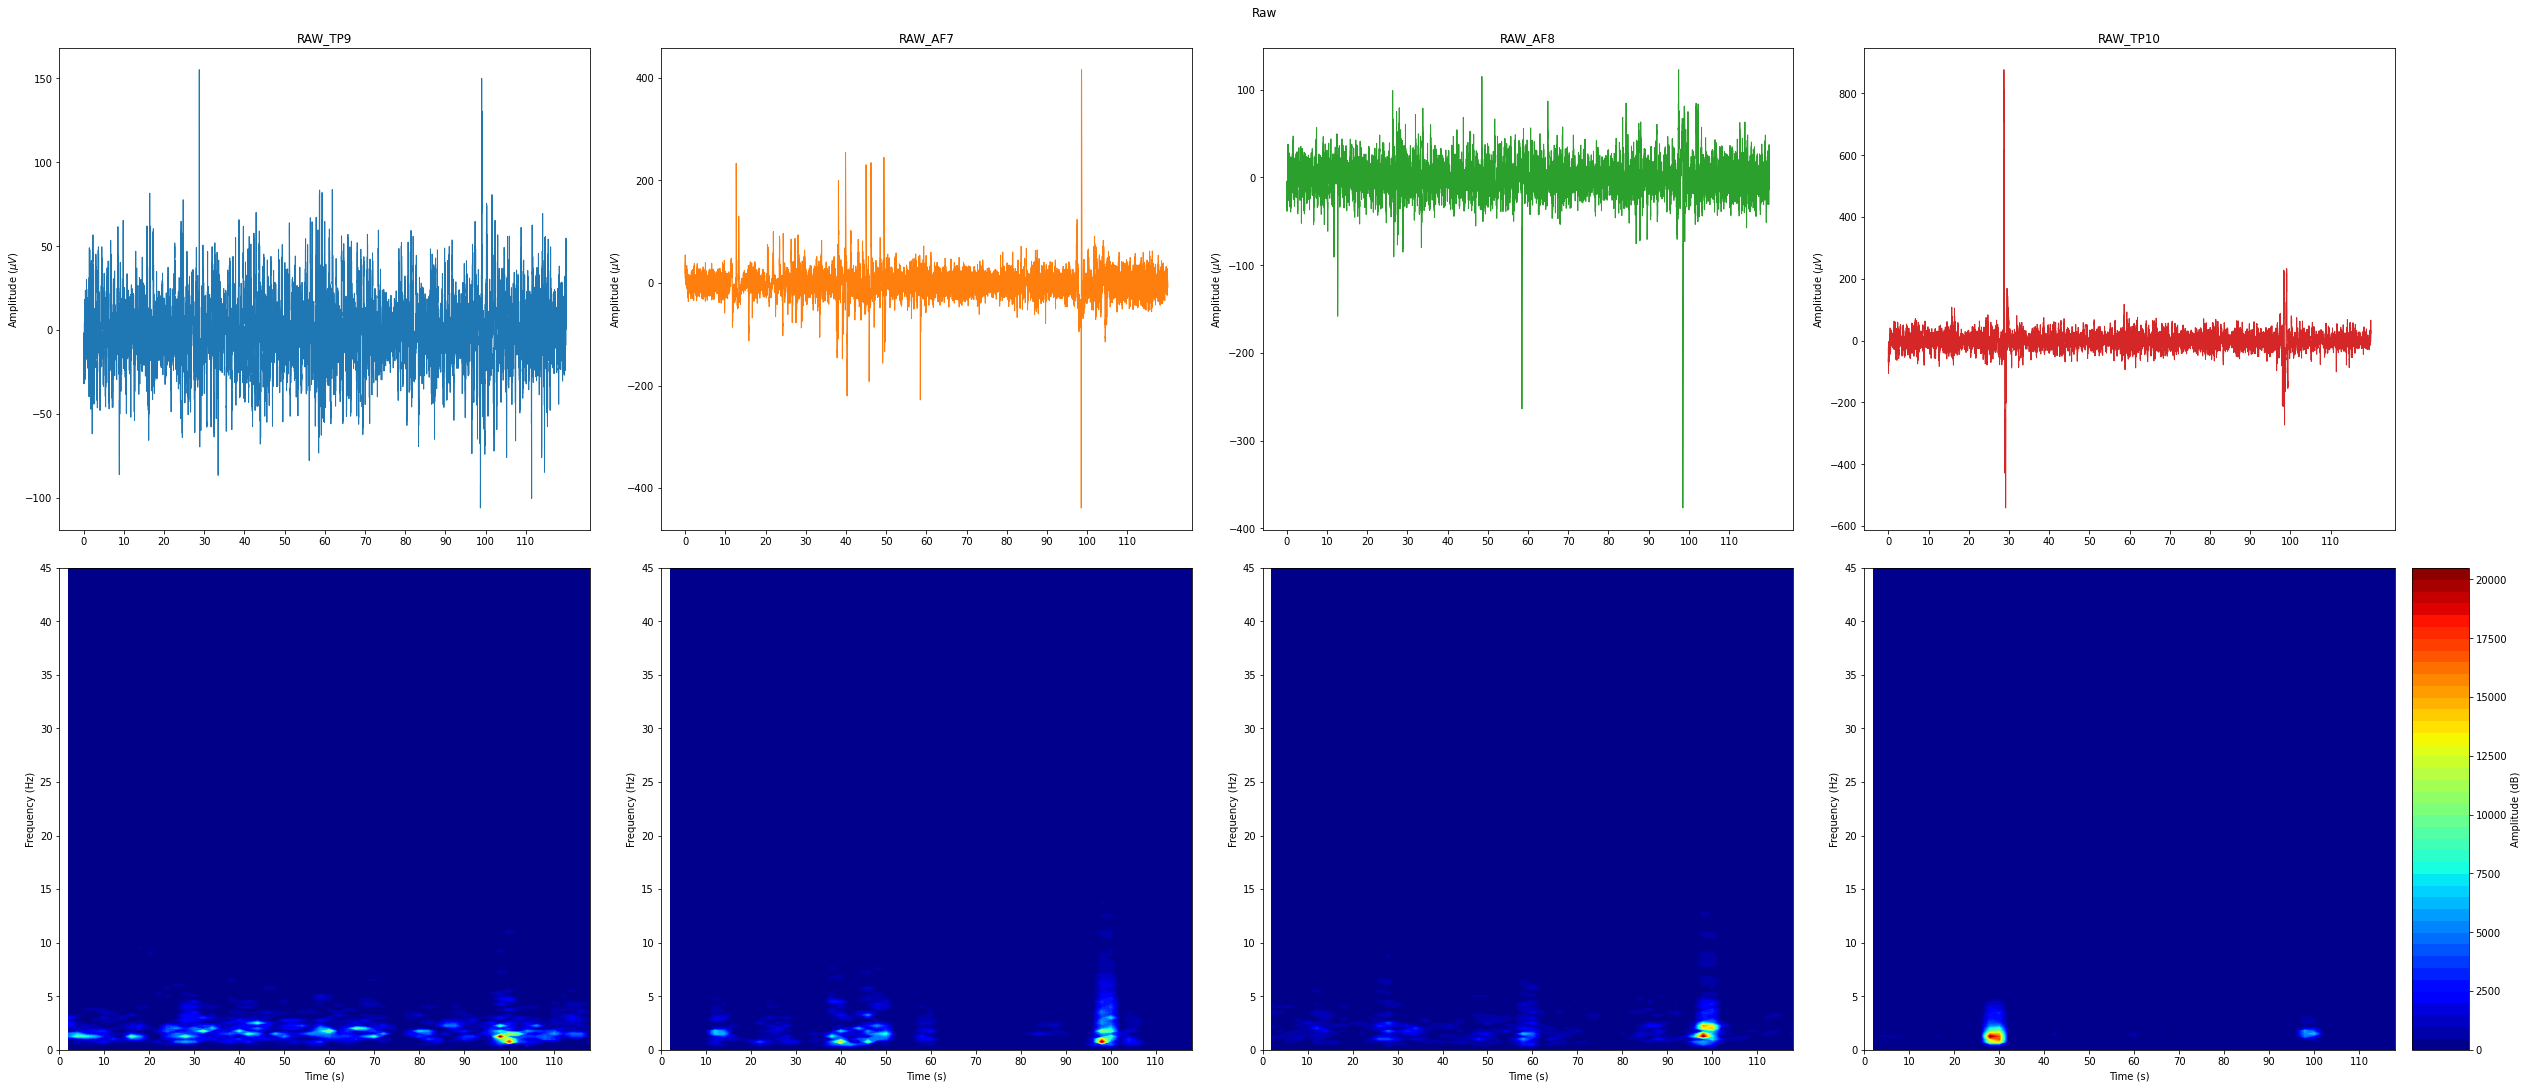

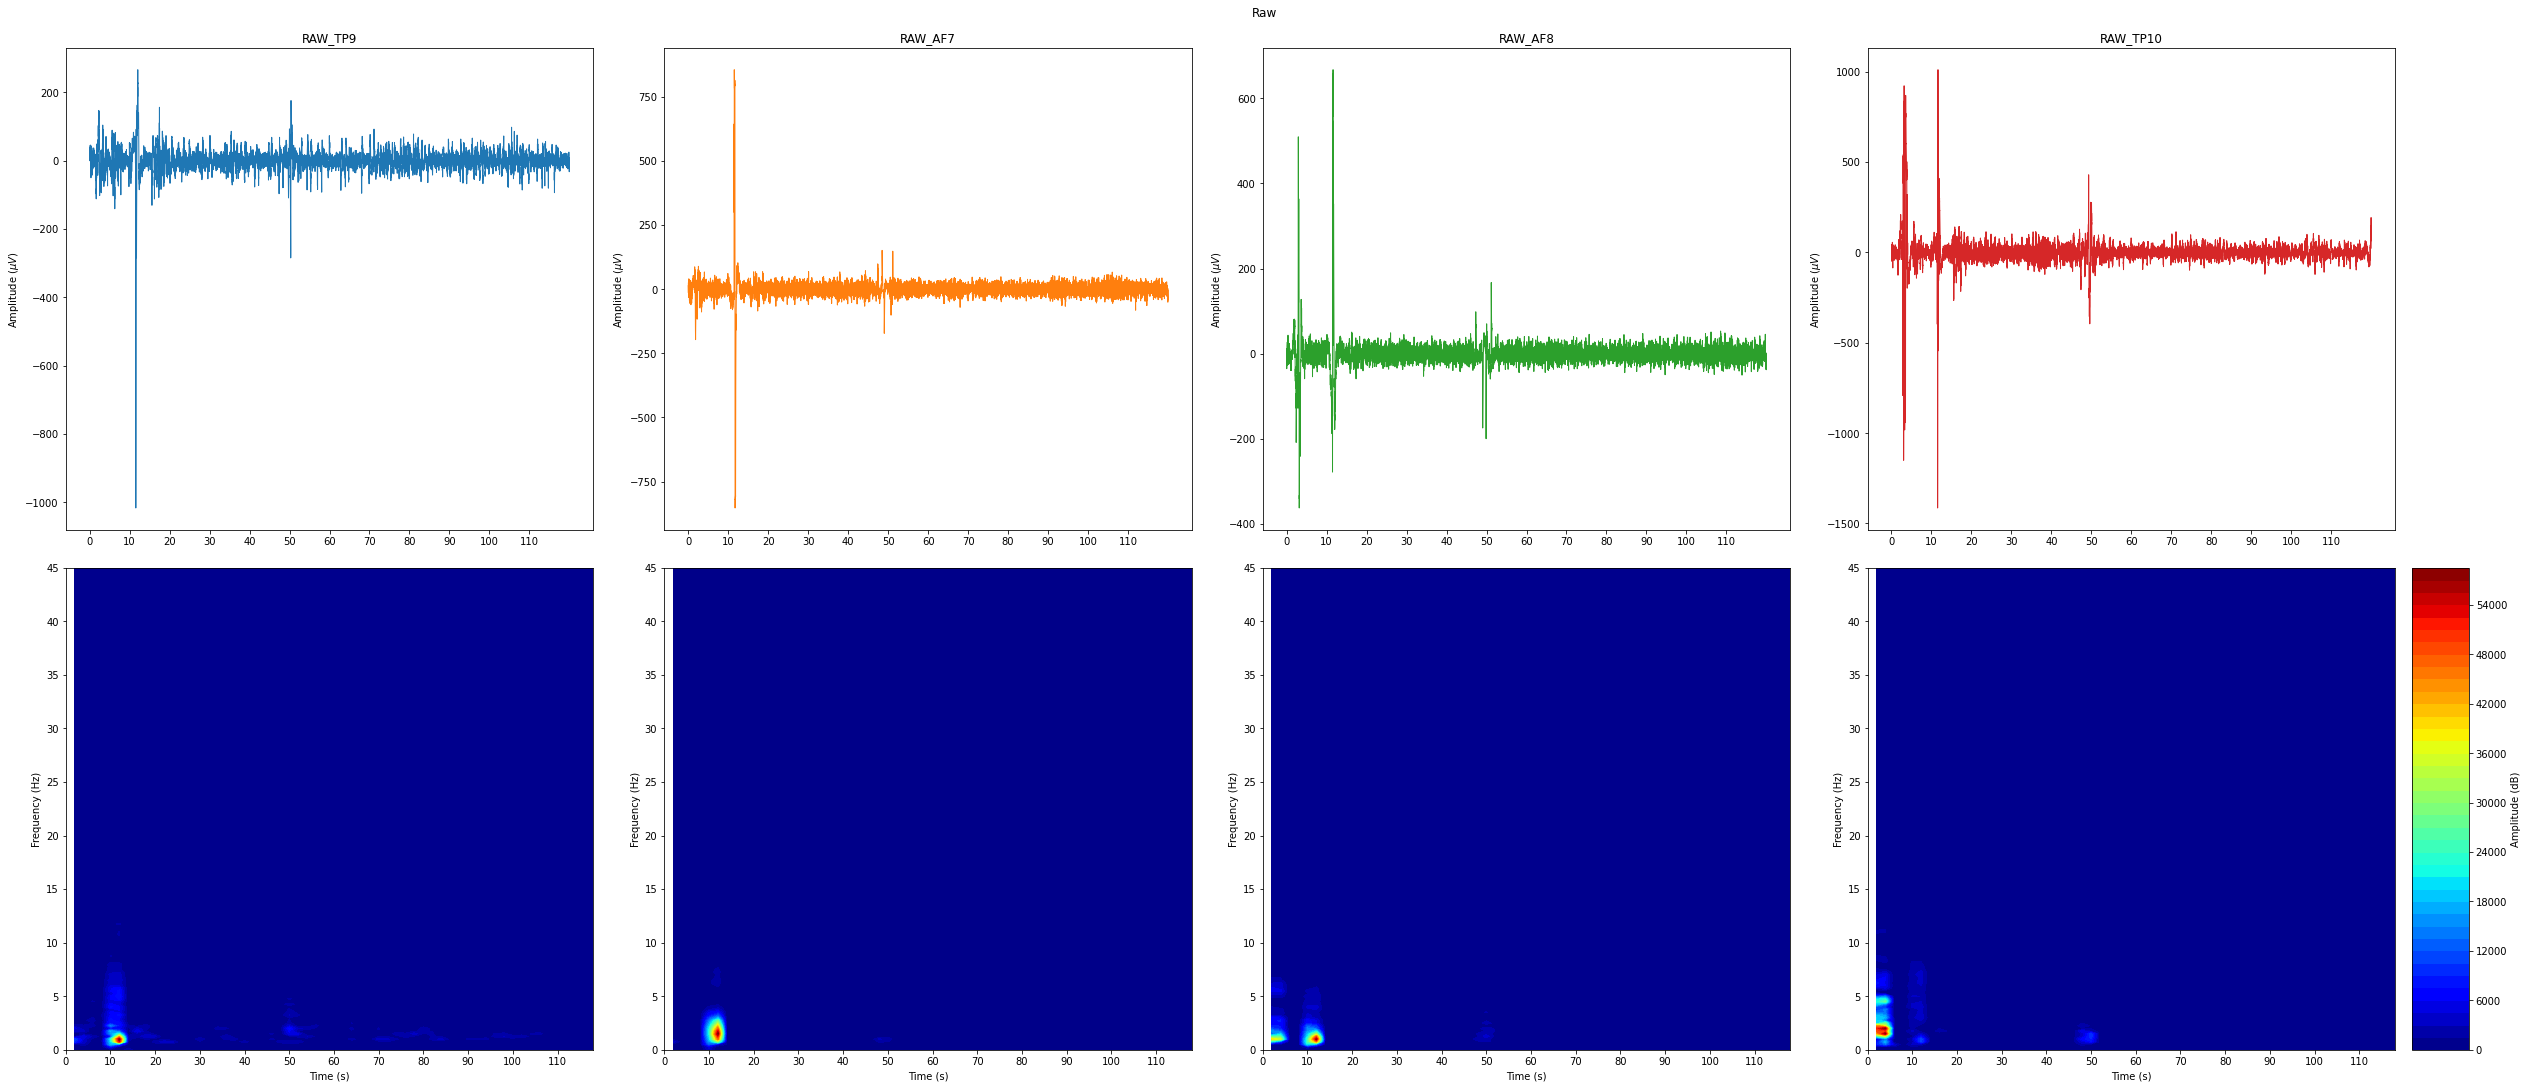

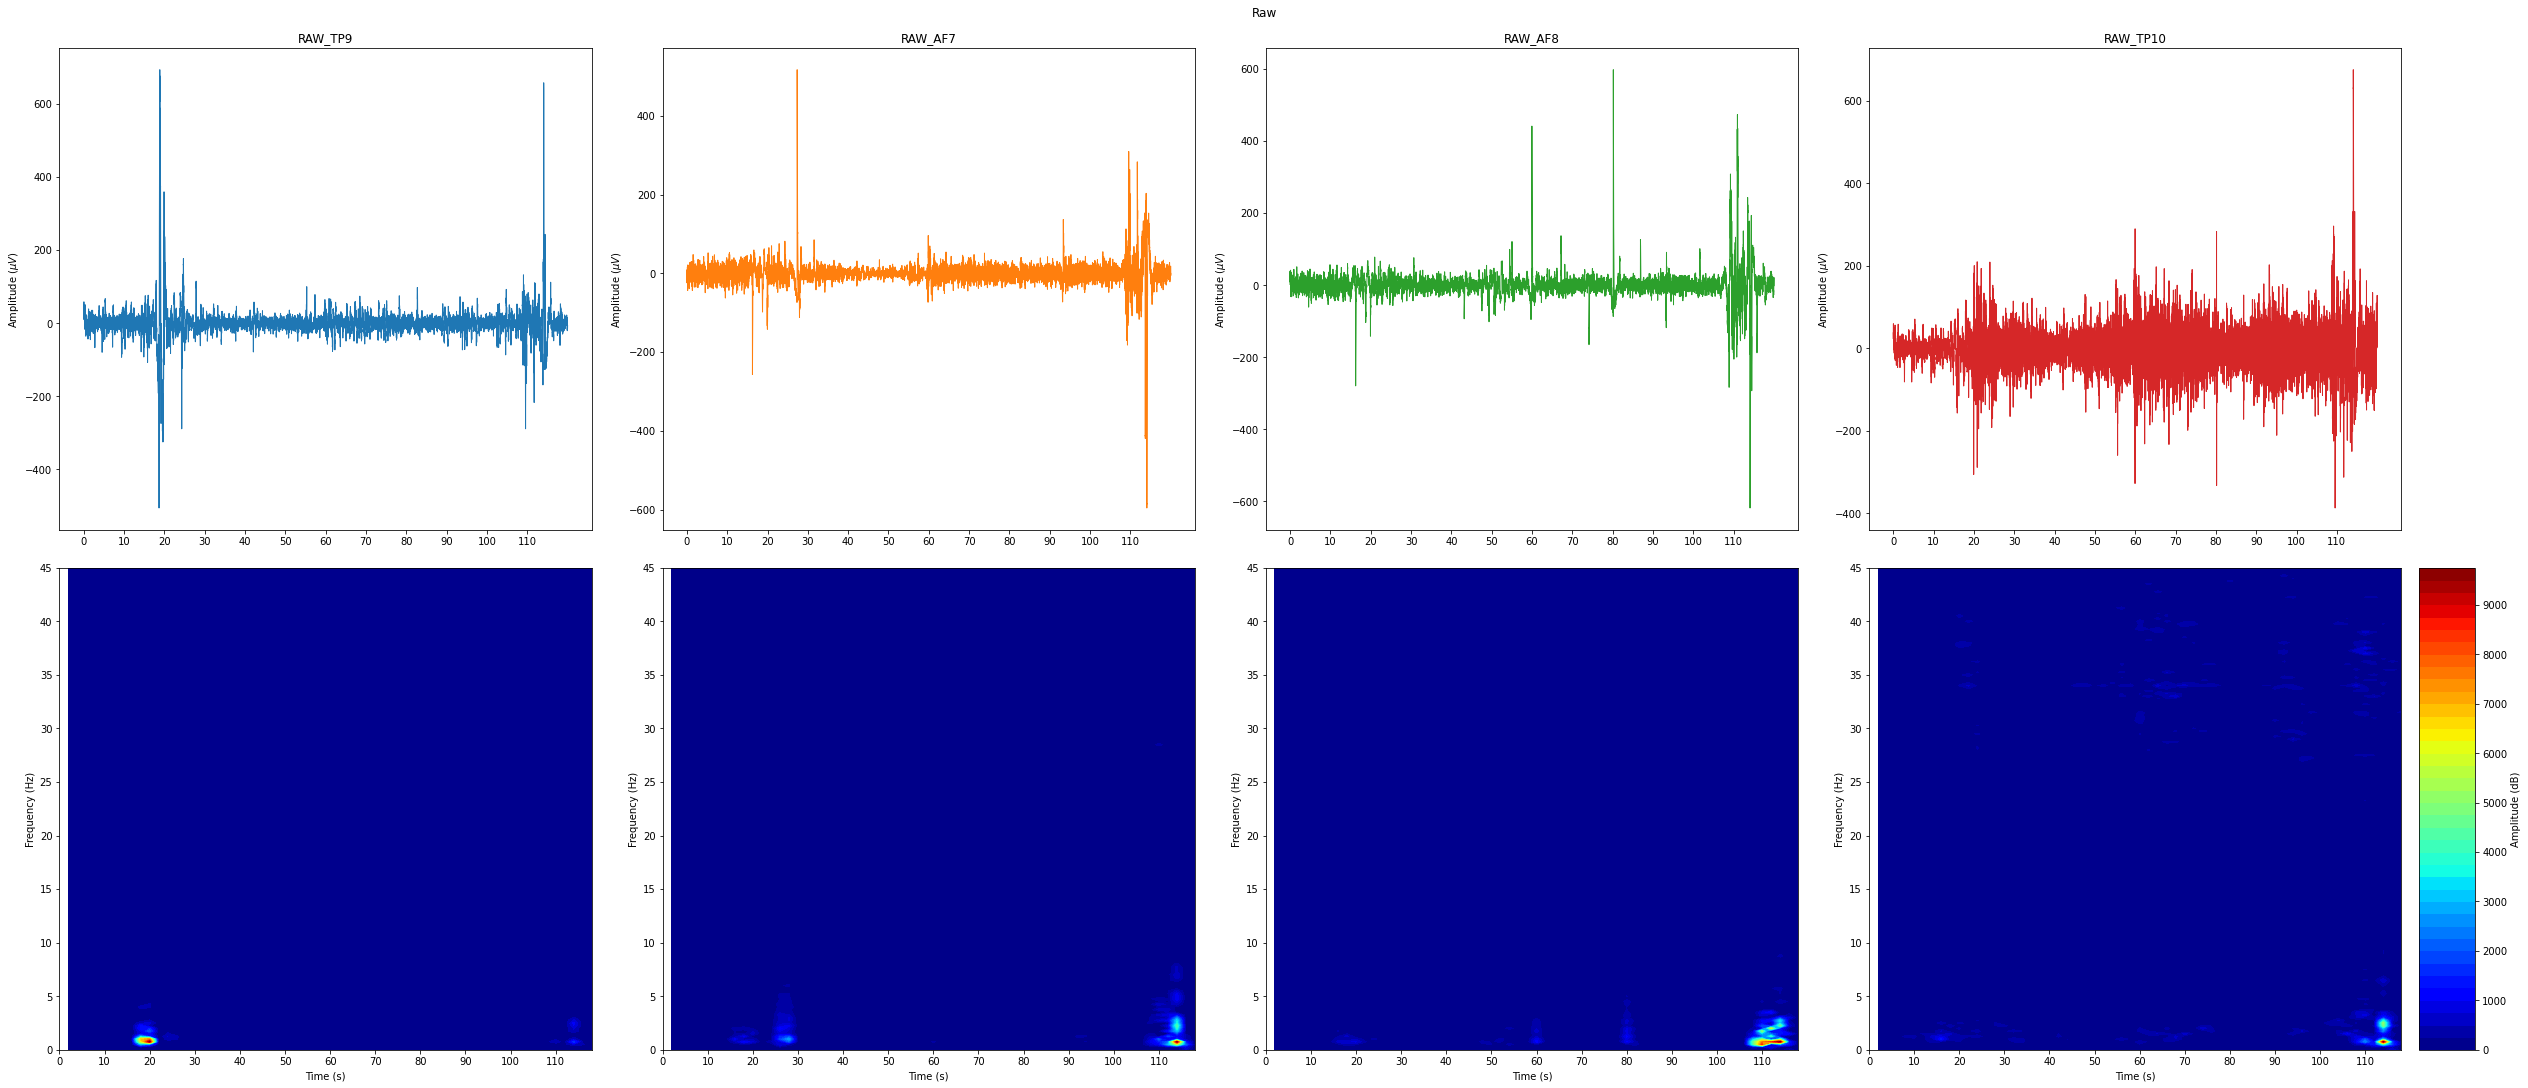

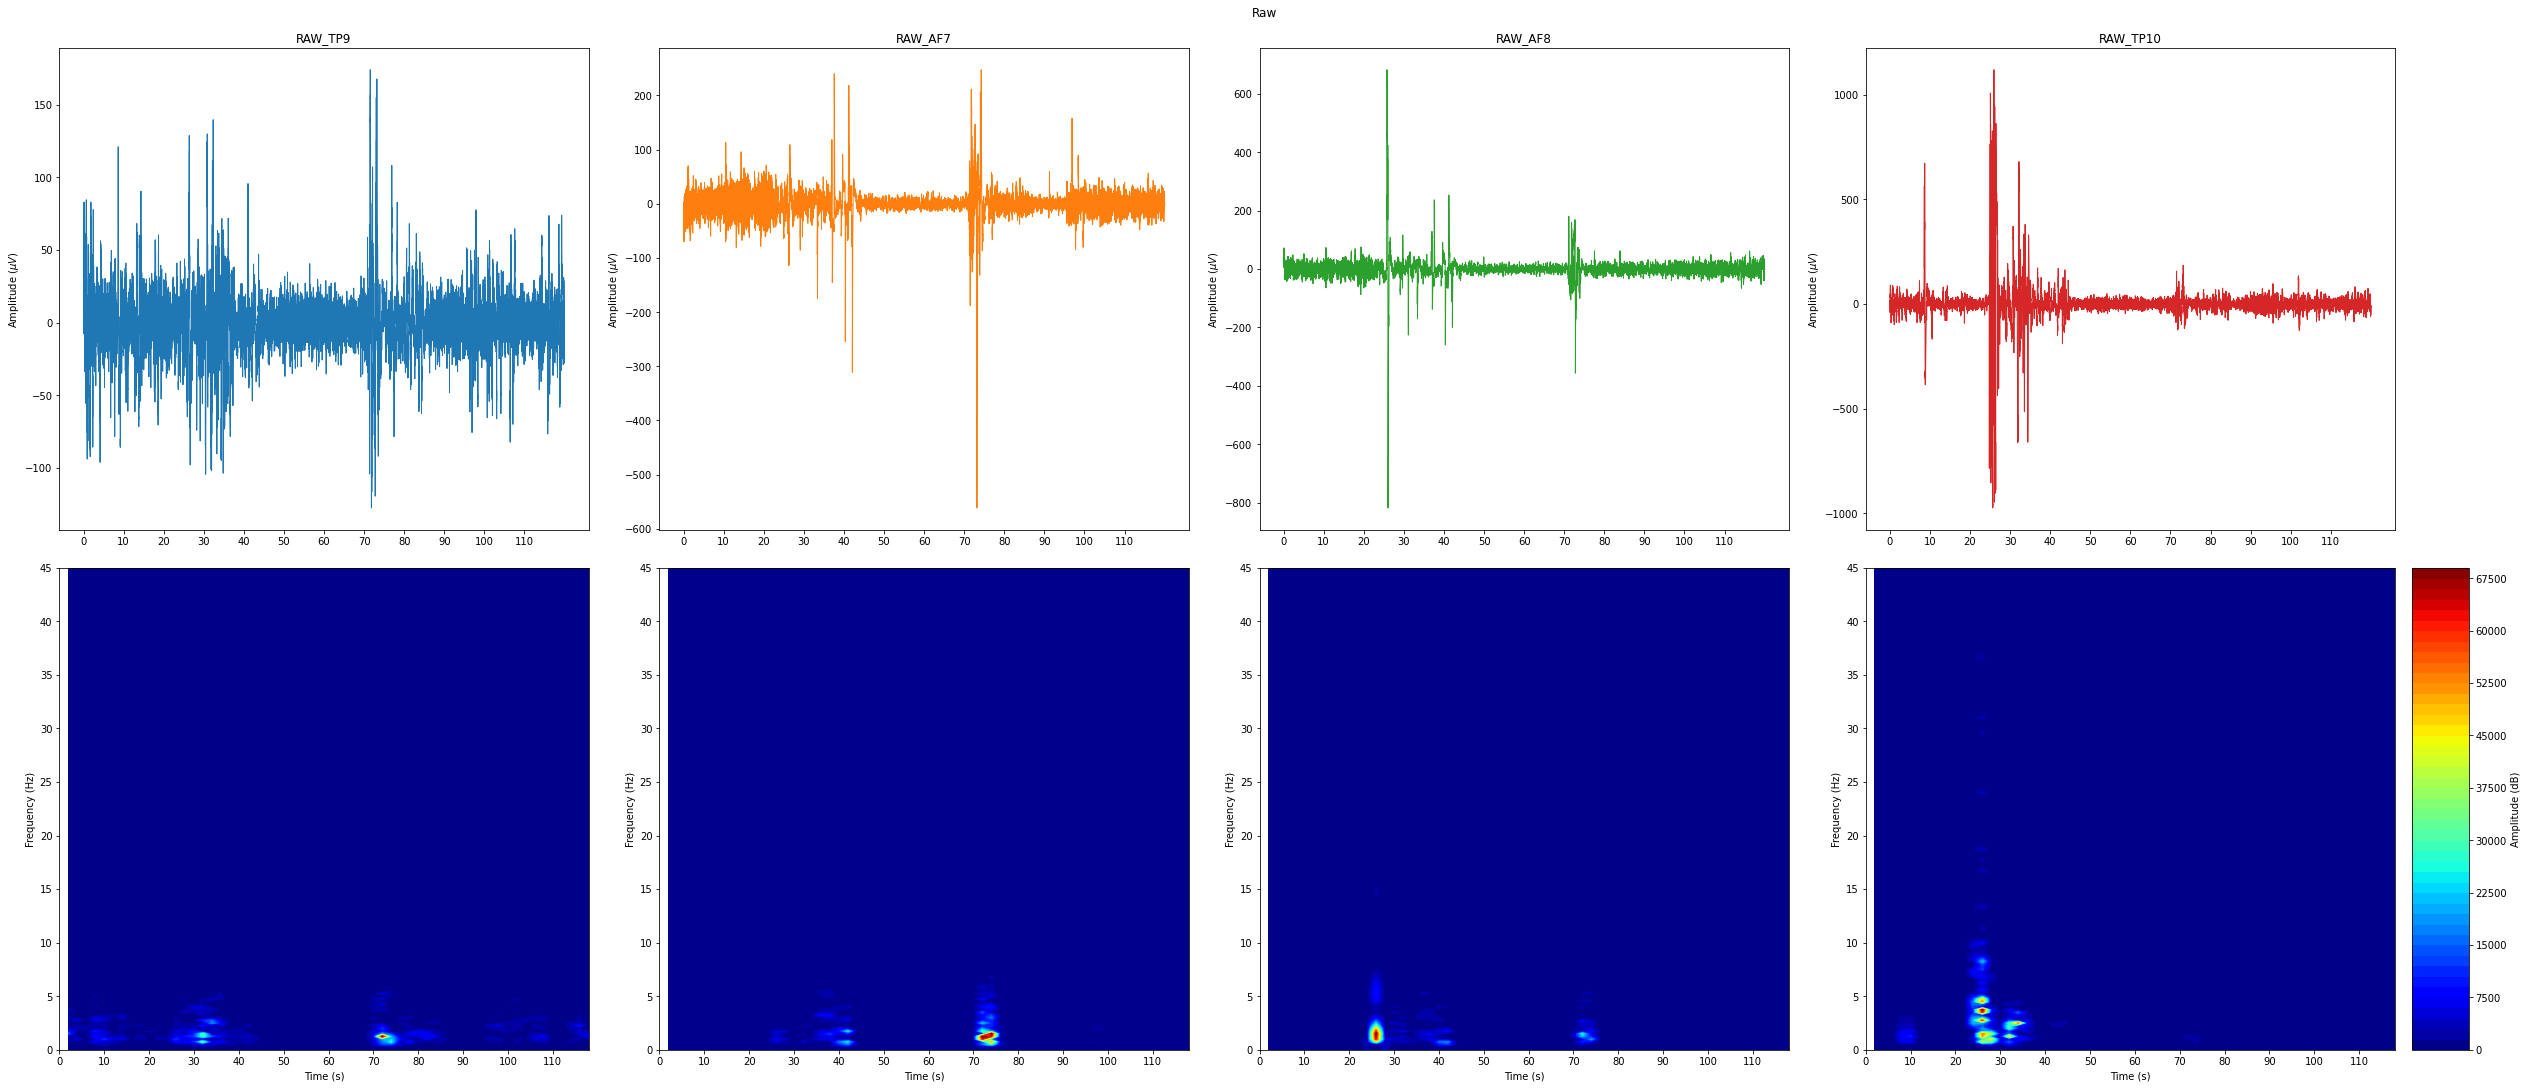

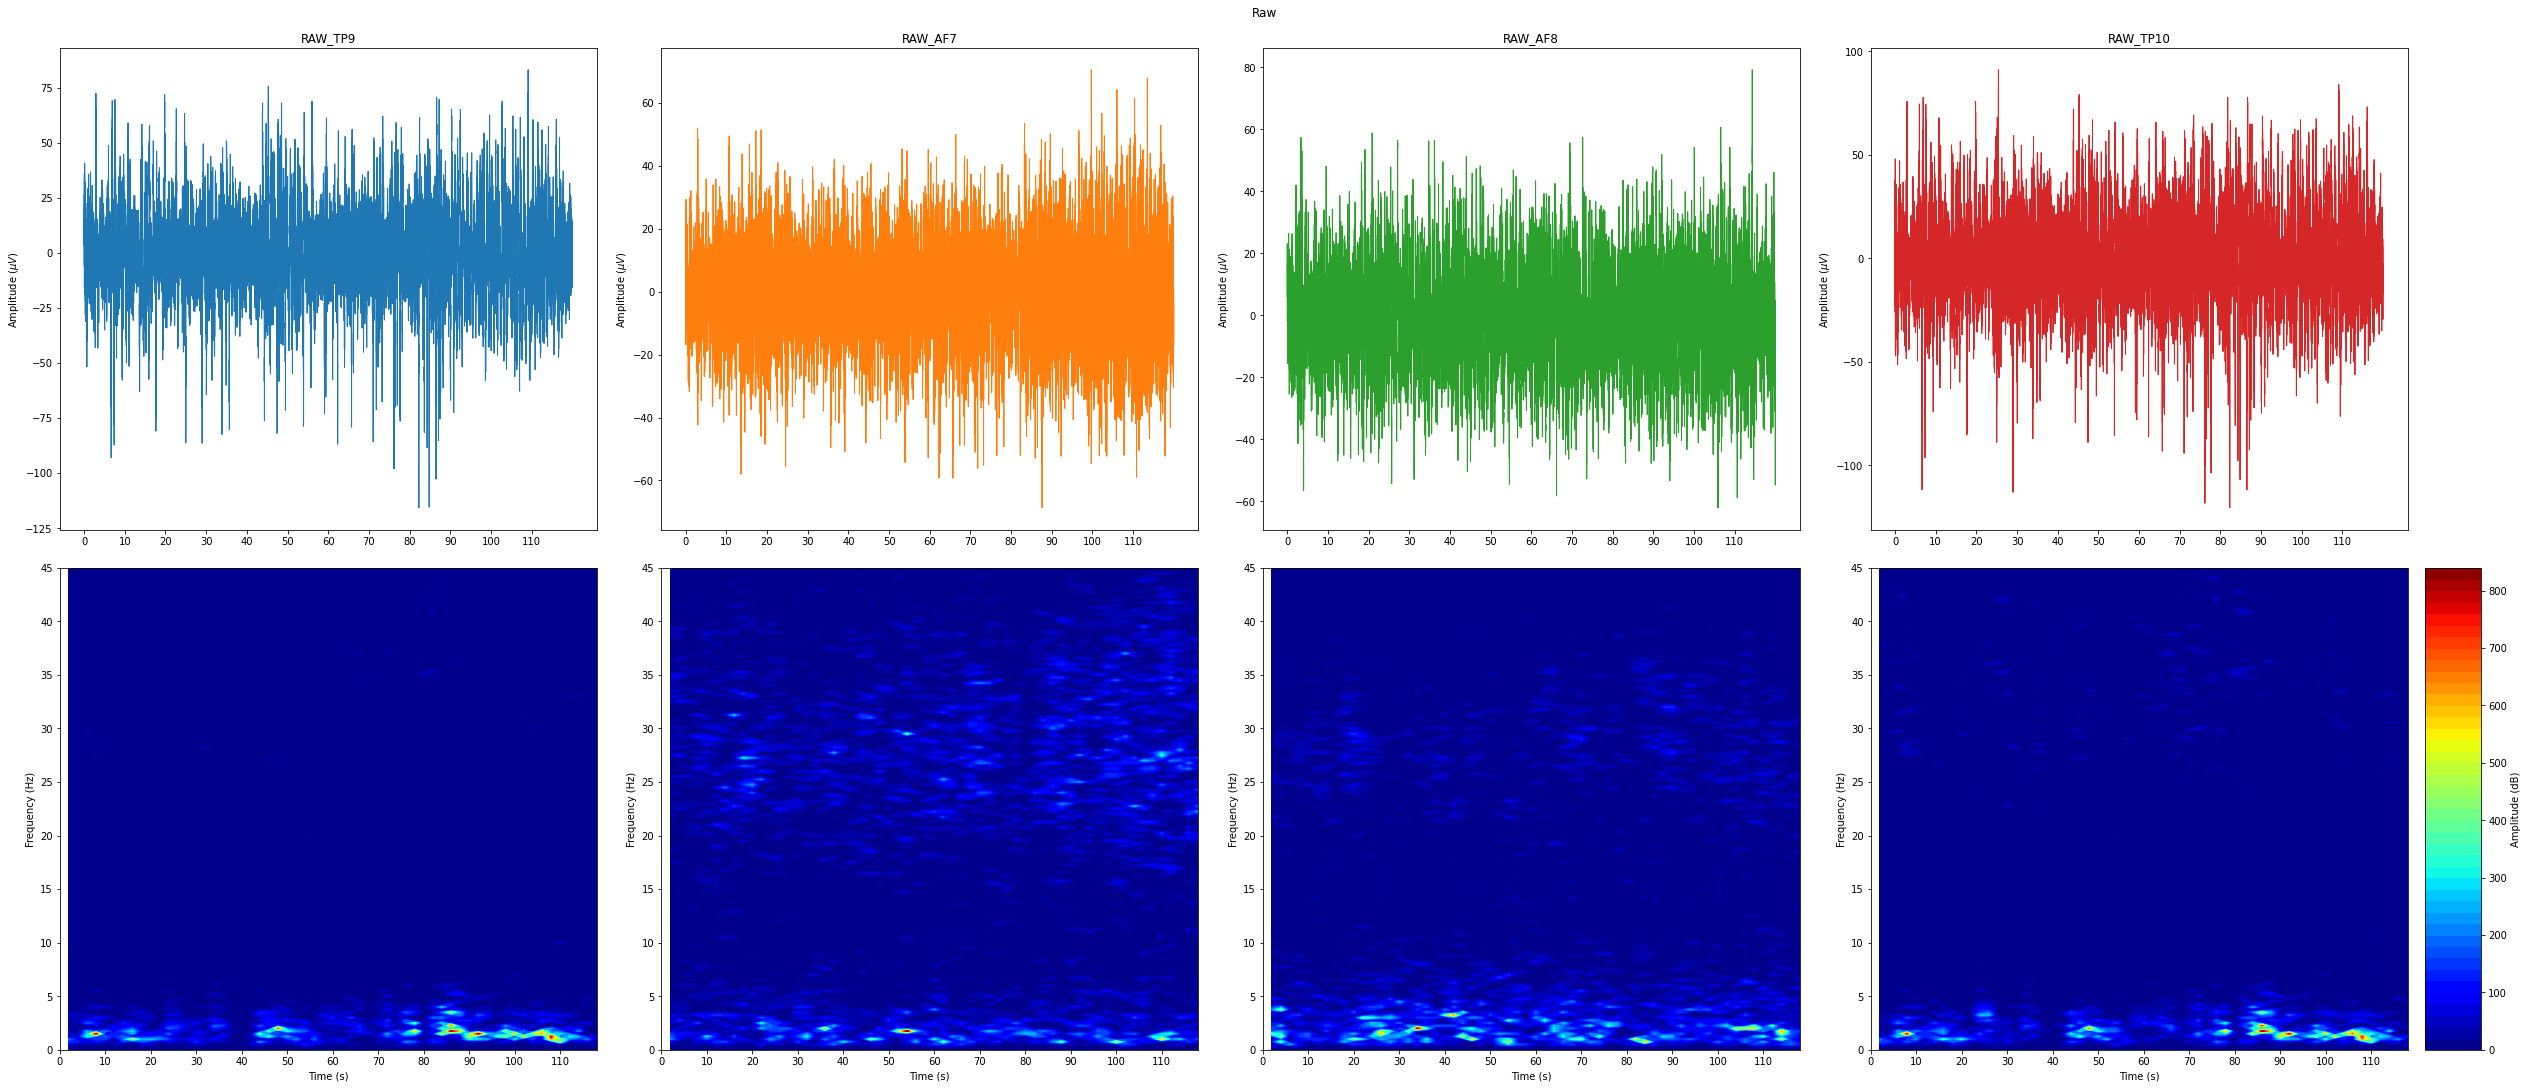

In [28]:
plots(data=band_C12[0],**args_1)
plots(data=band_C12[1],**args_1)
plots(data=band_C12[2],**args_1)
plots(data=band_C12[3],**args_1)
plots(data=band_C12[4],**args_1)

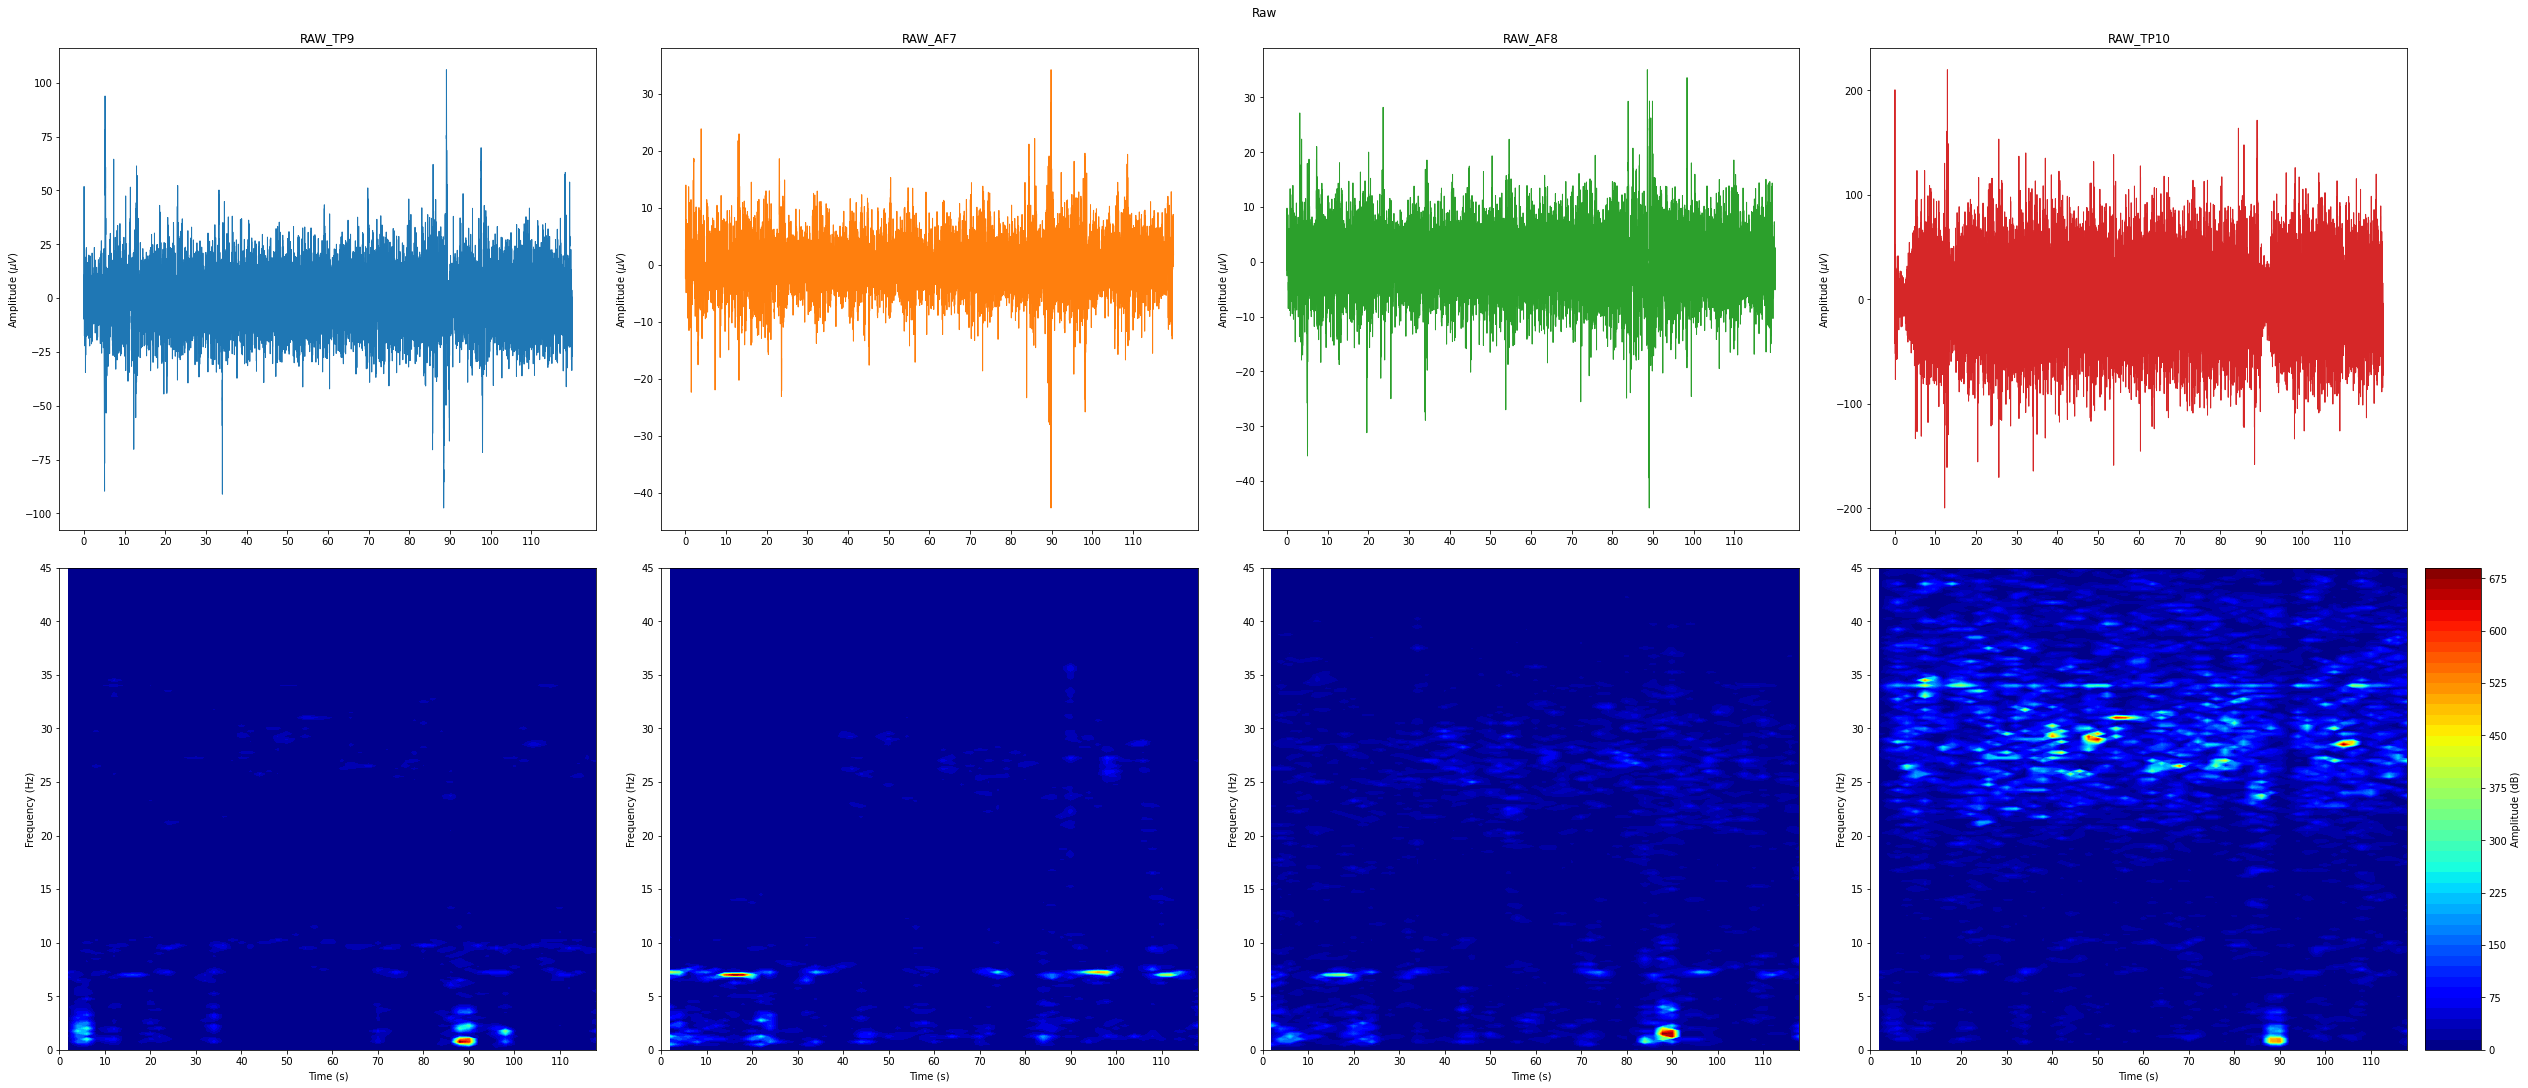

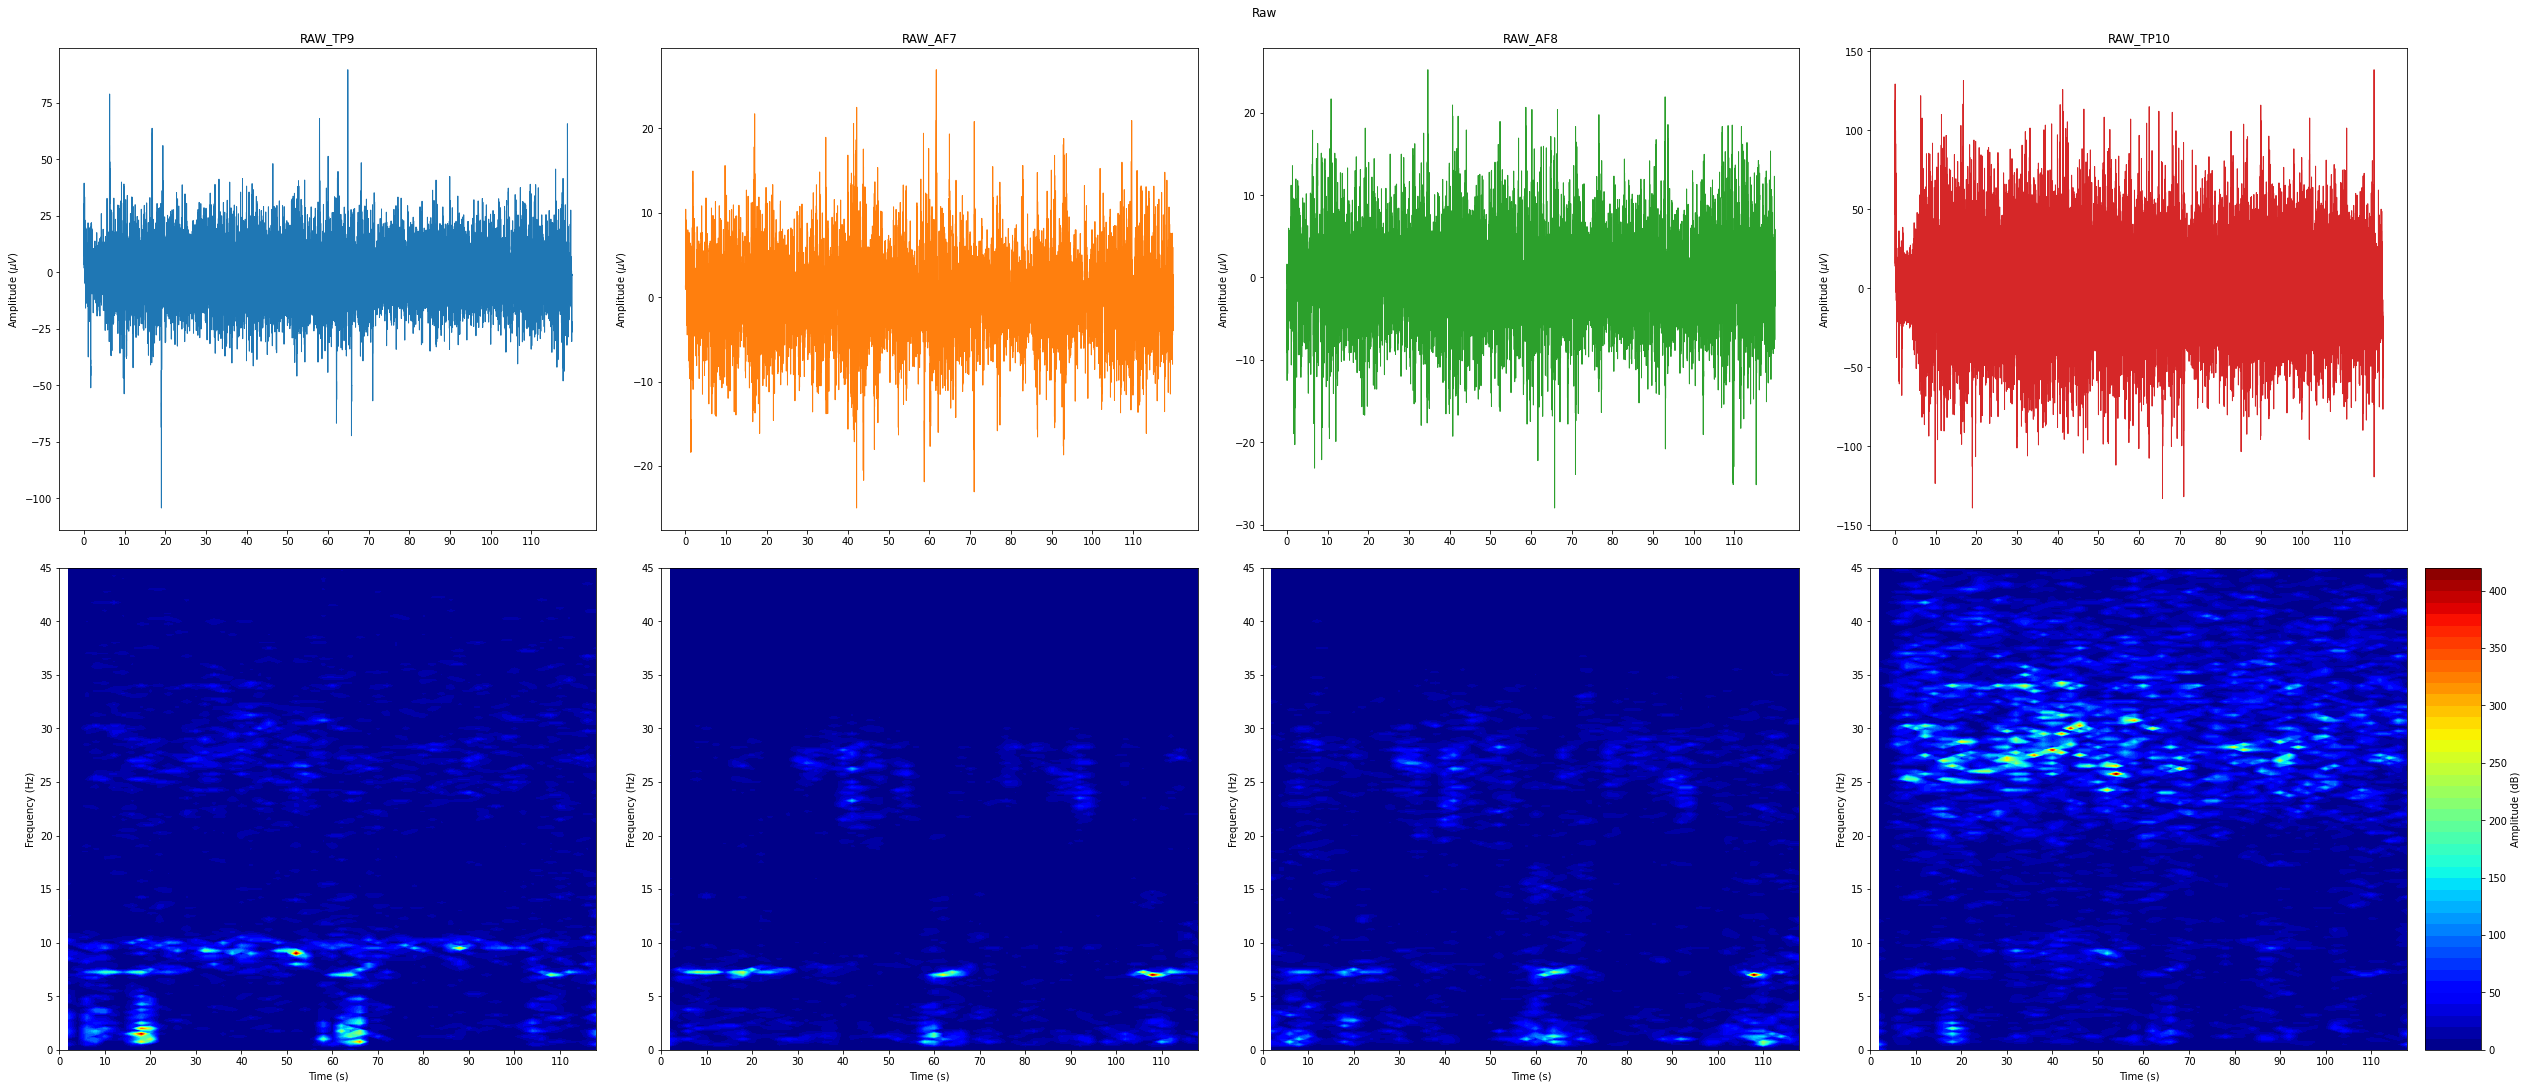

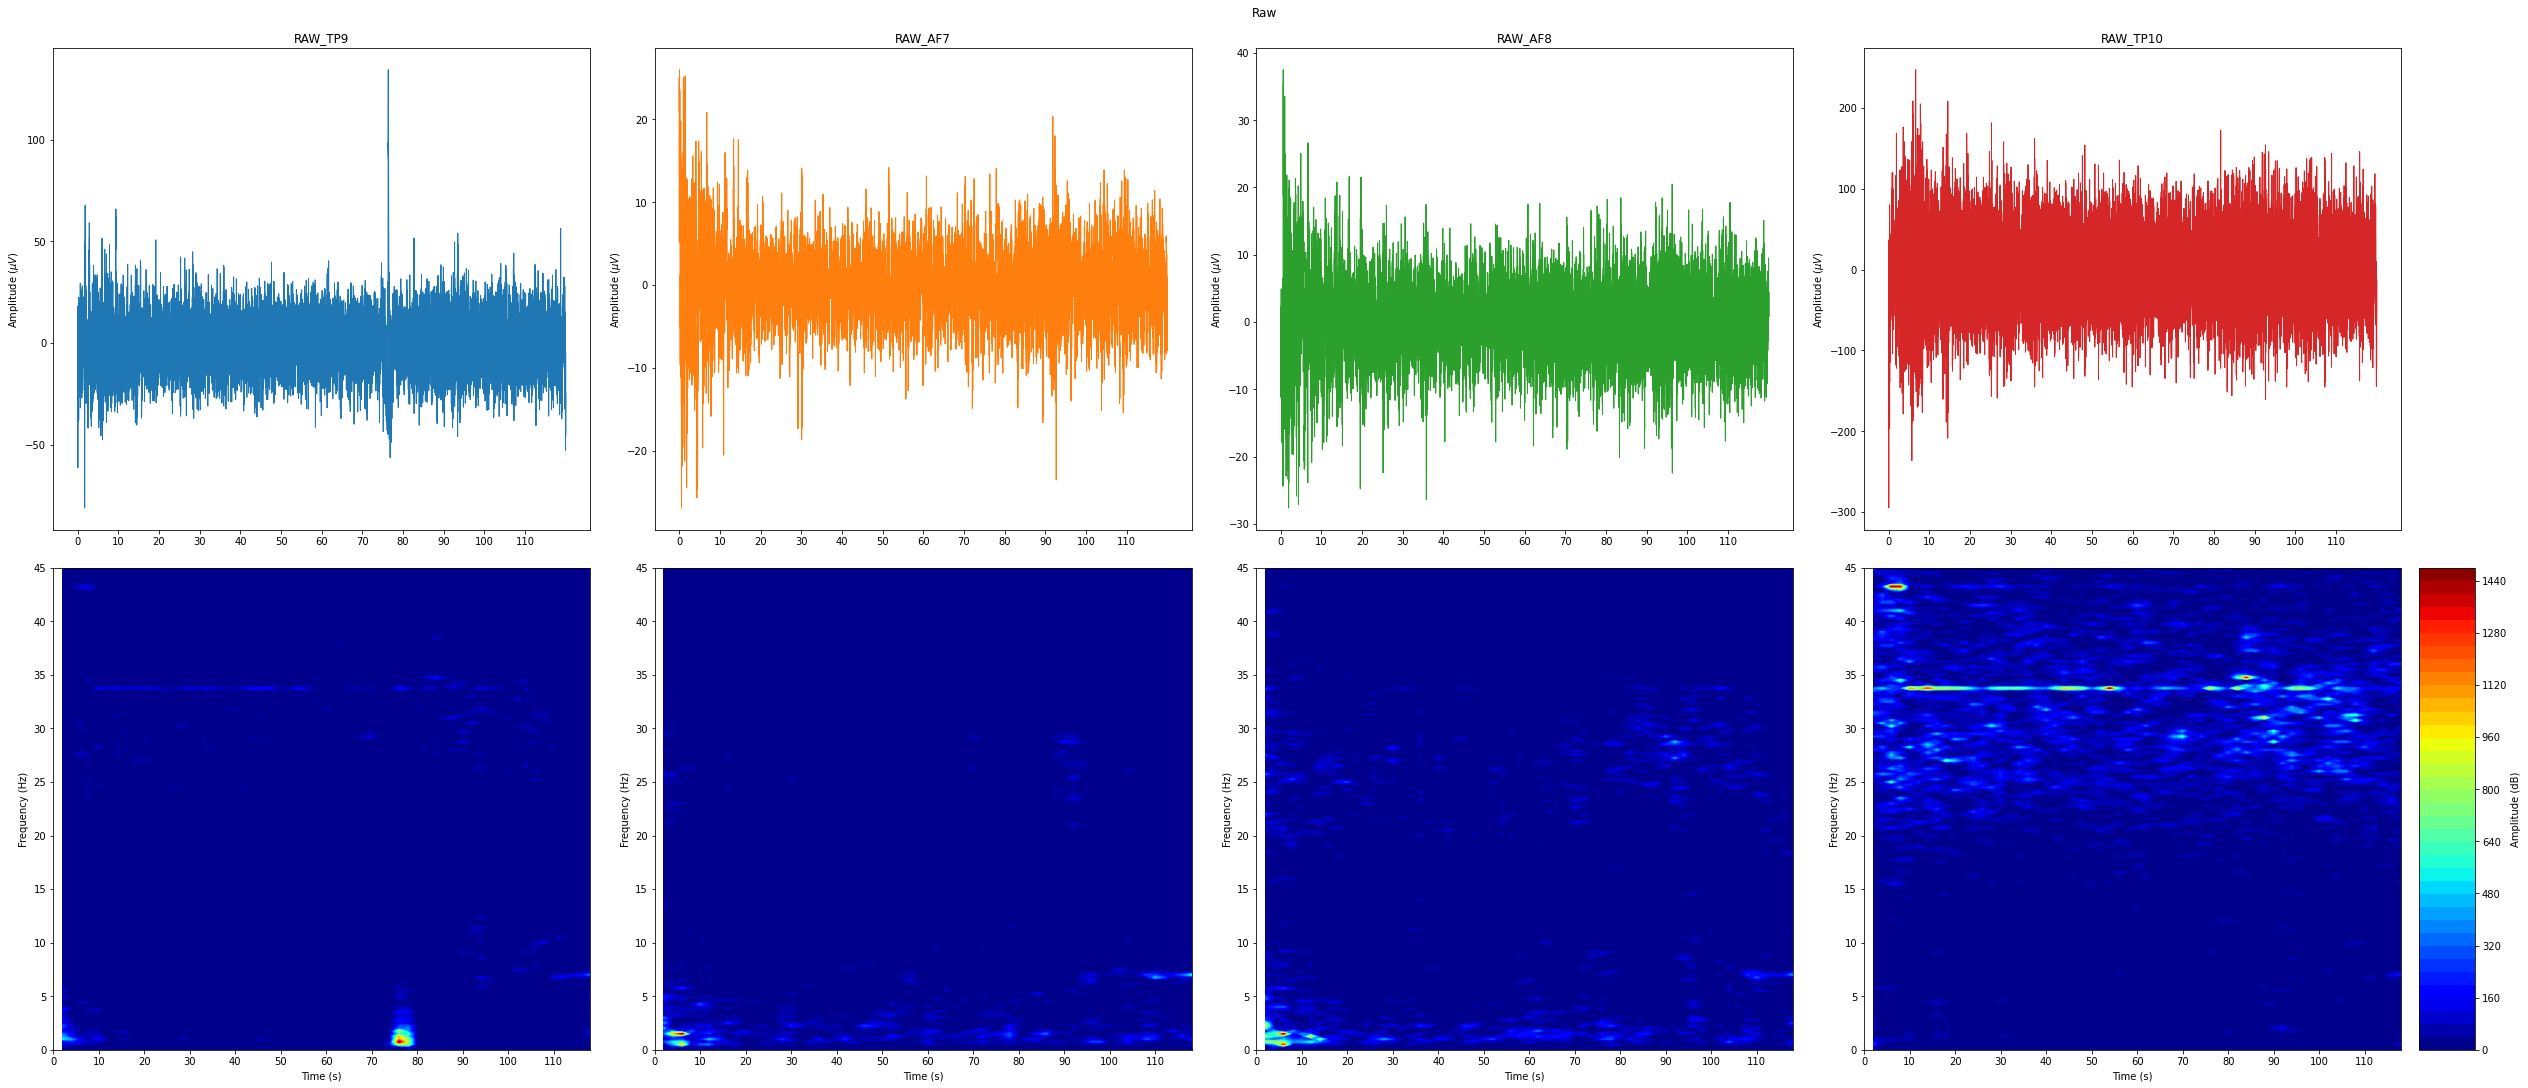

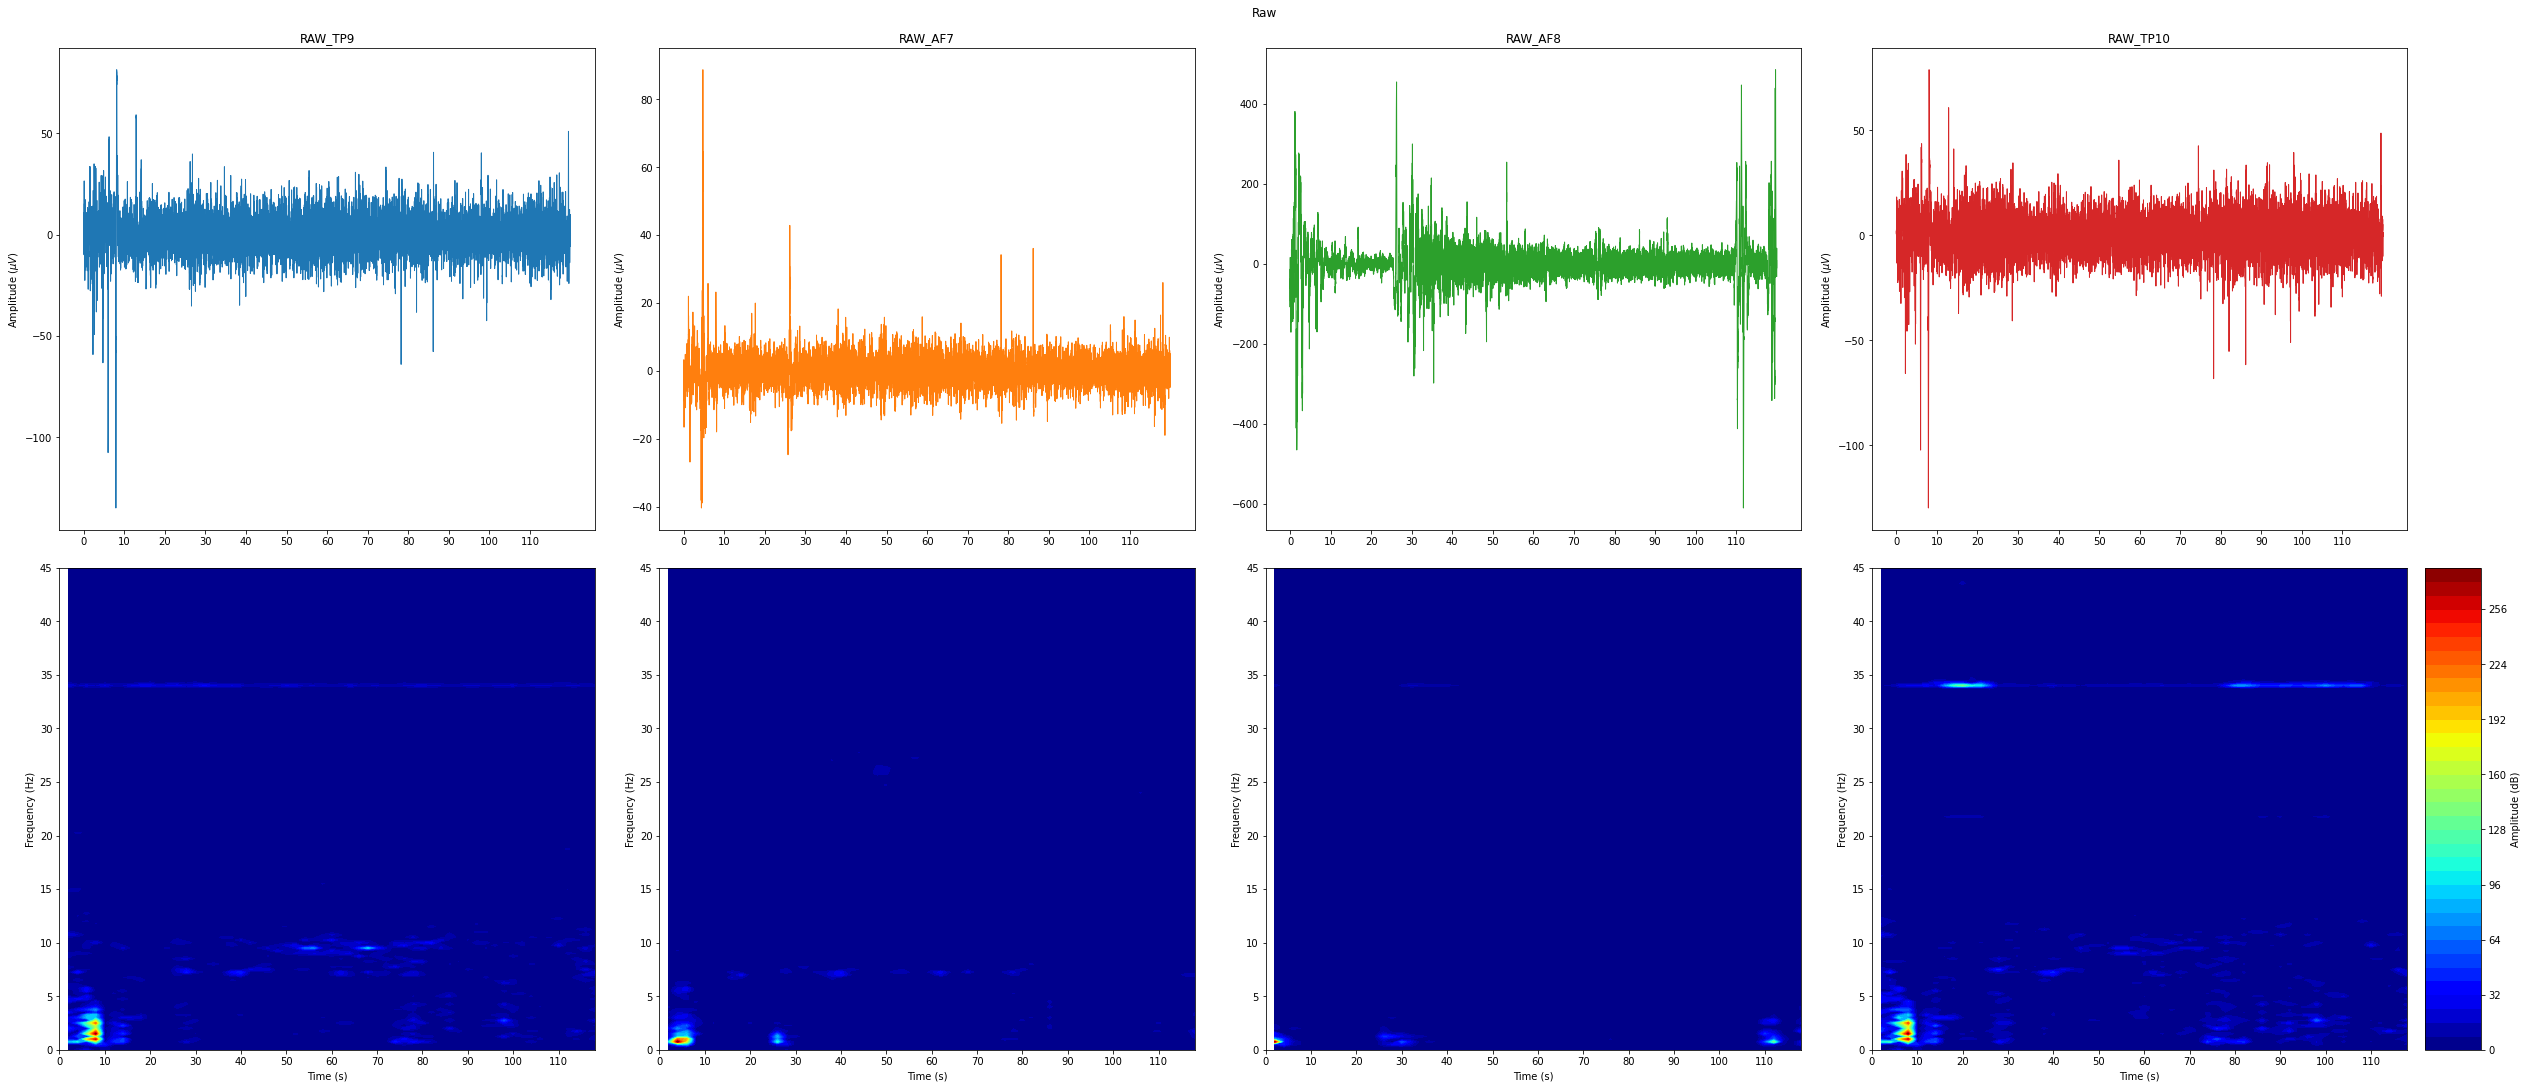

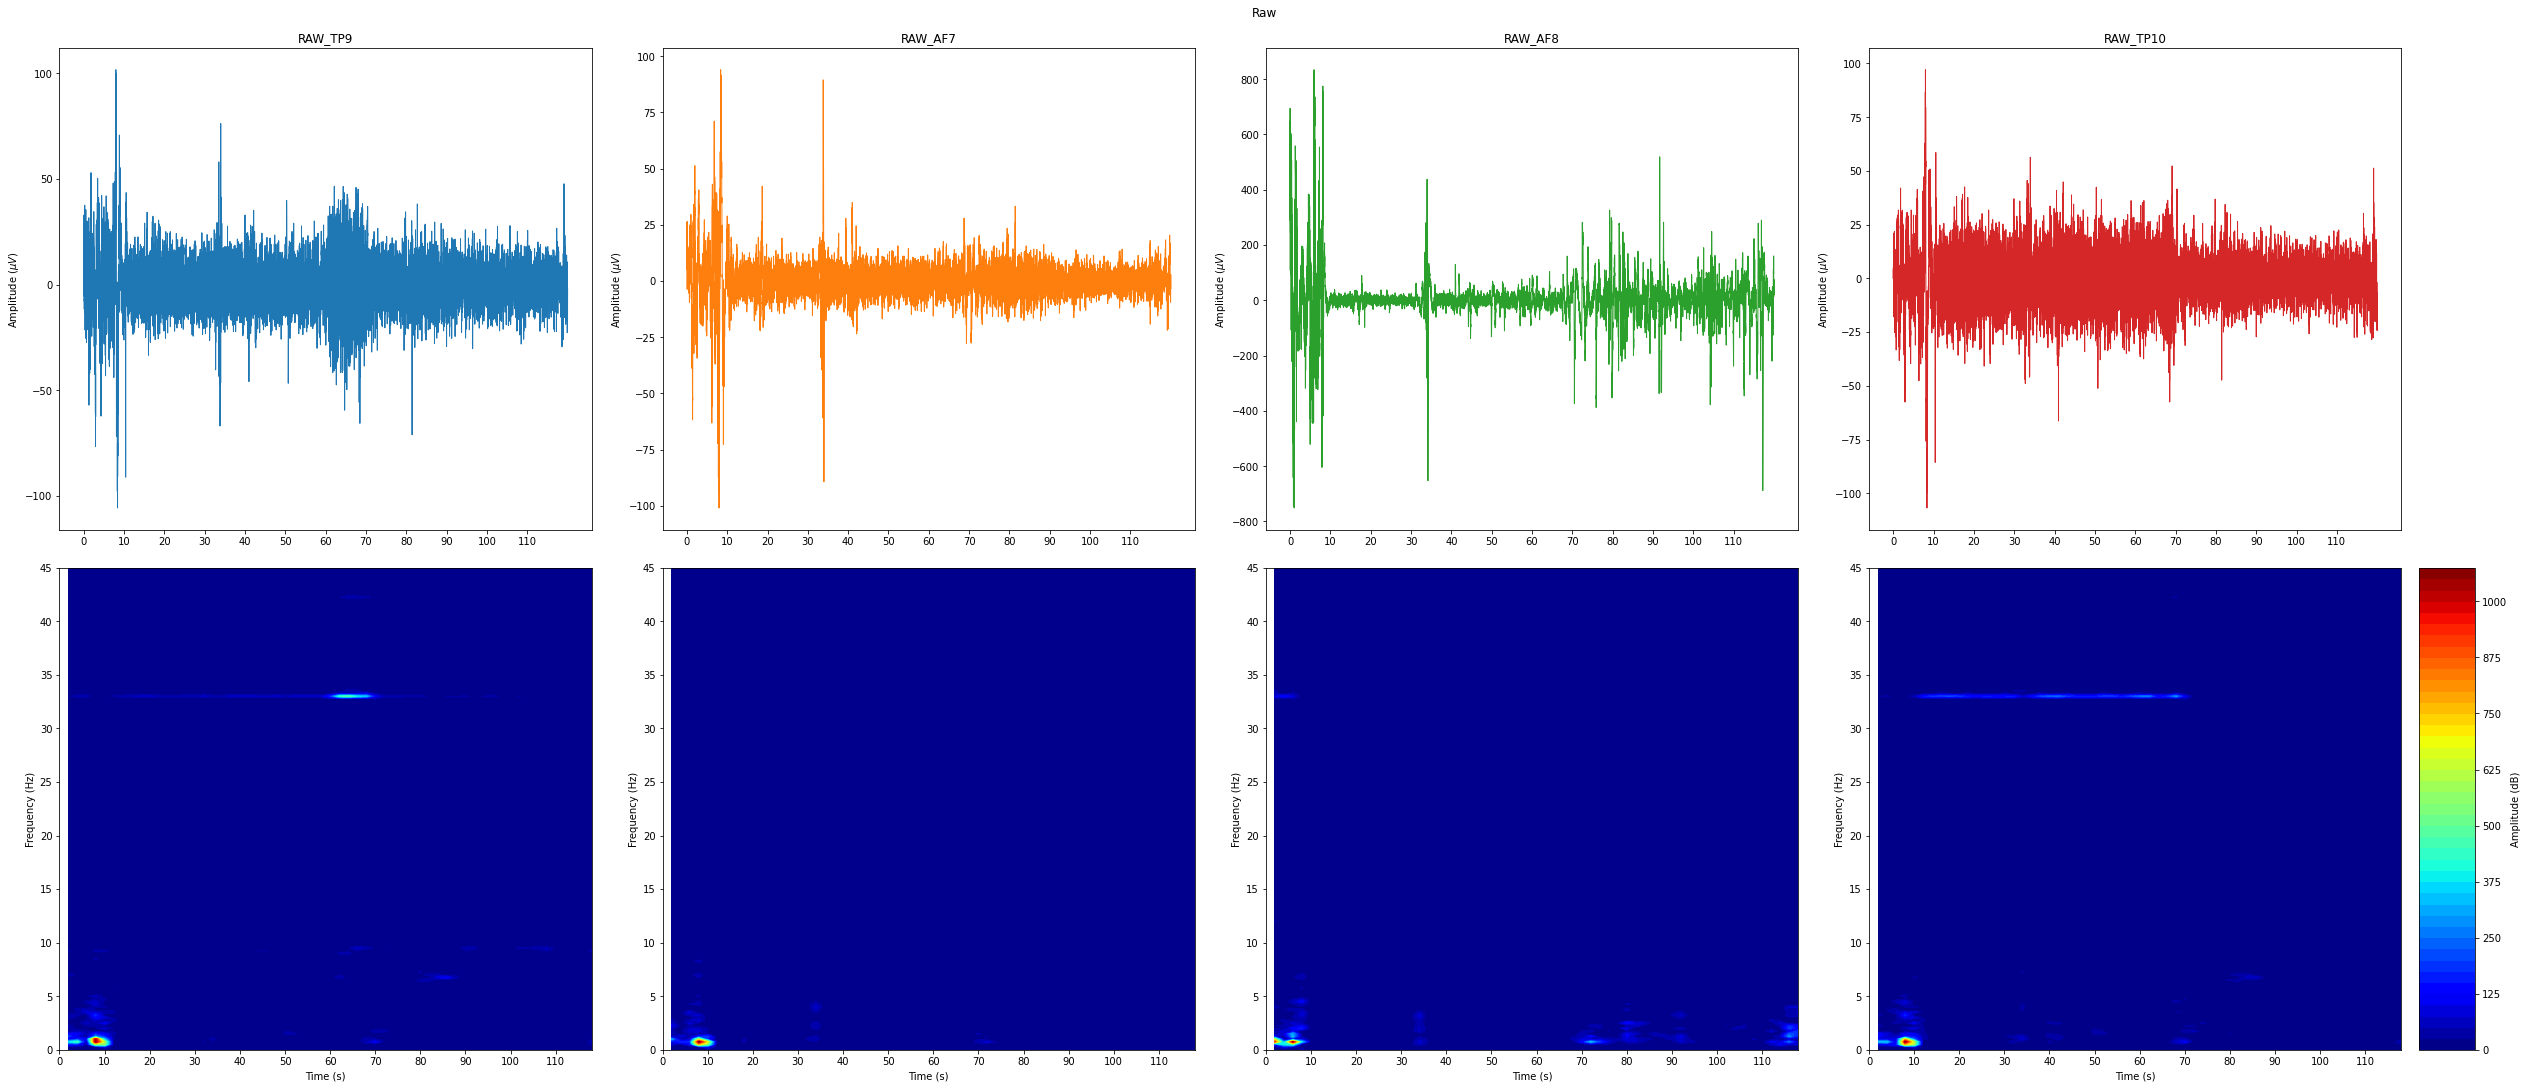

In [27]:
plots(data=band_C21[0],**args_1)
plots(data=band_C21[1],**args_1)
plots(data=band_C21[2],**args_1)
plots(data=band_C21[3],**args_1)
plots(data=band_C21[4],**args_1)

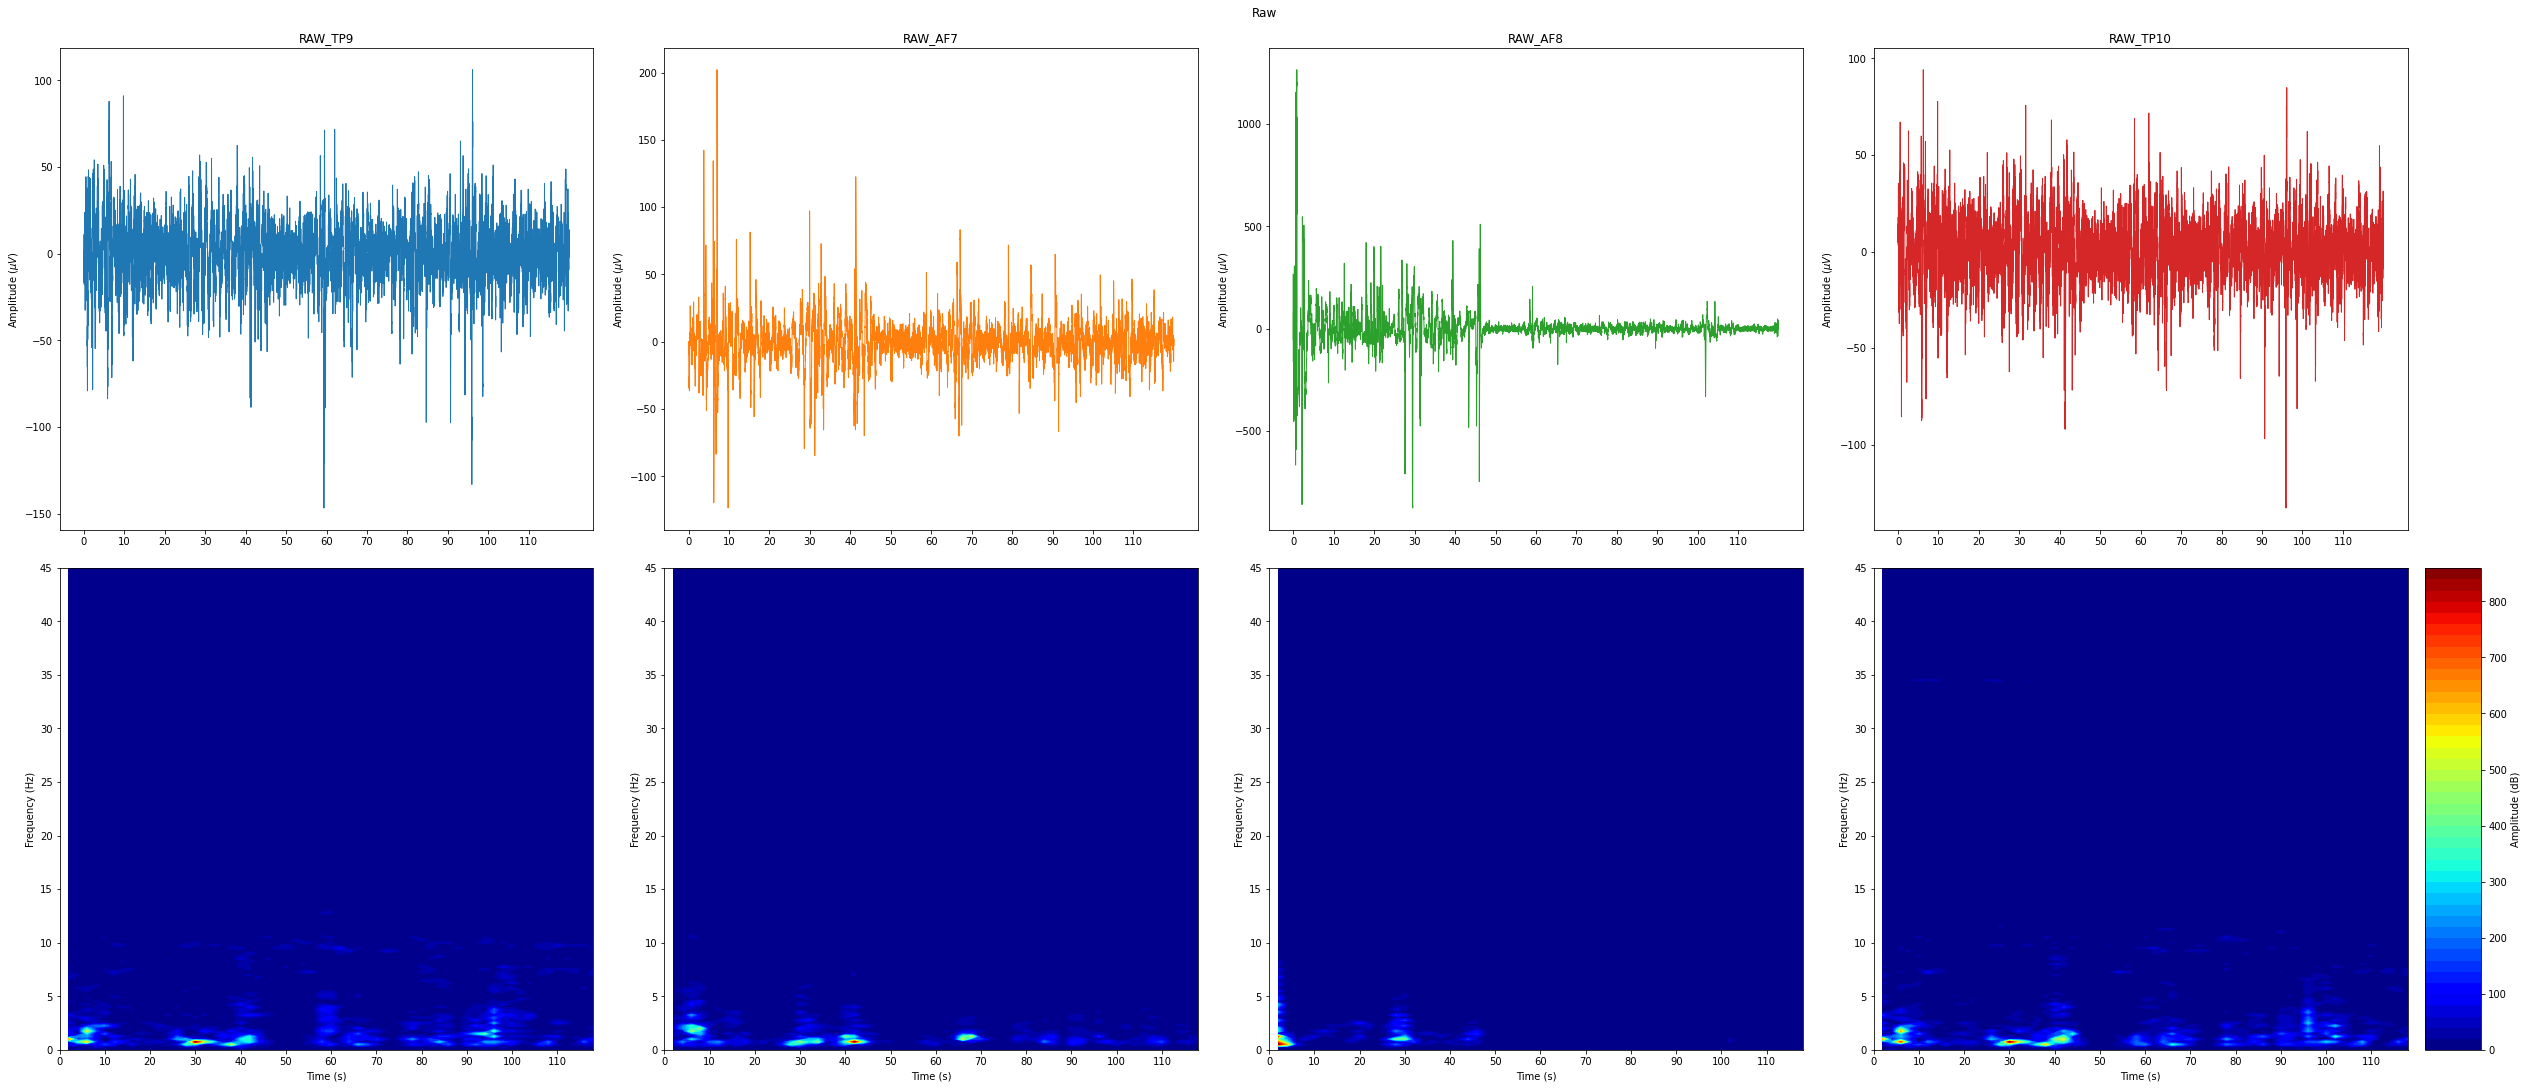

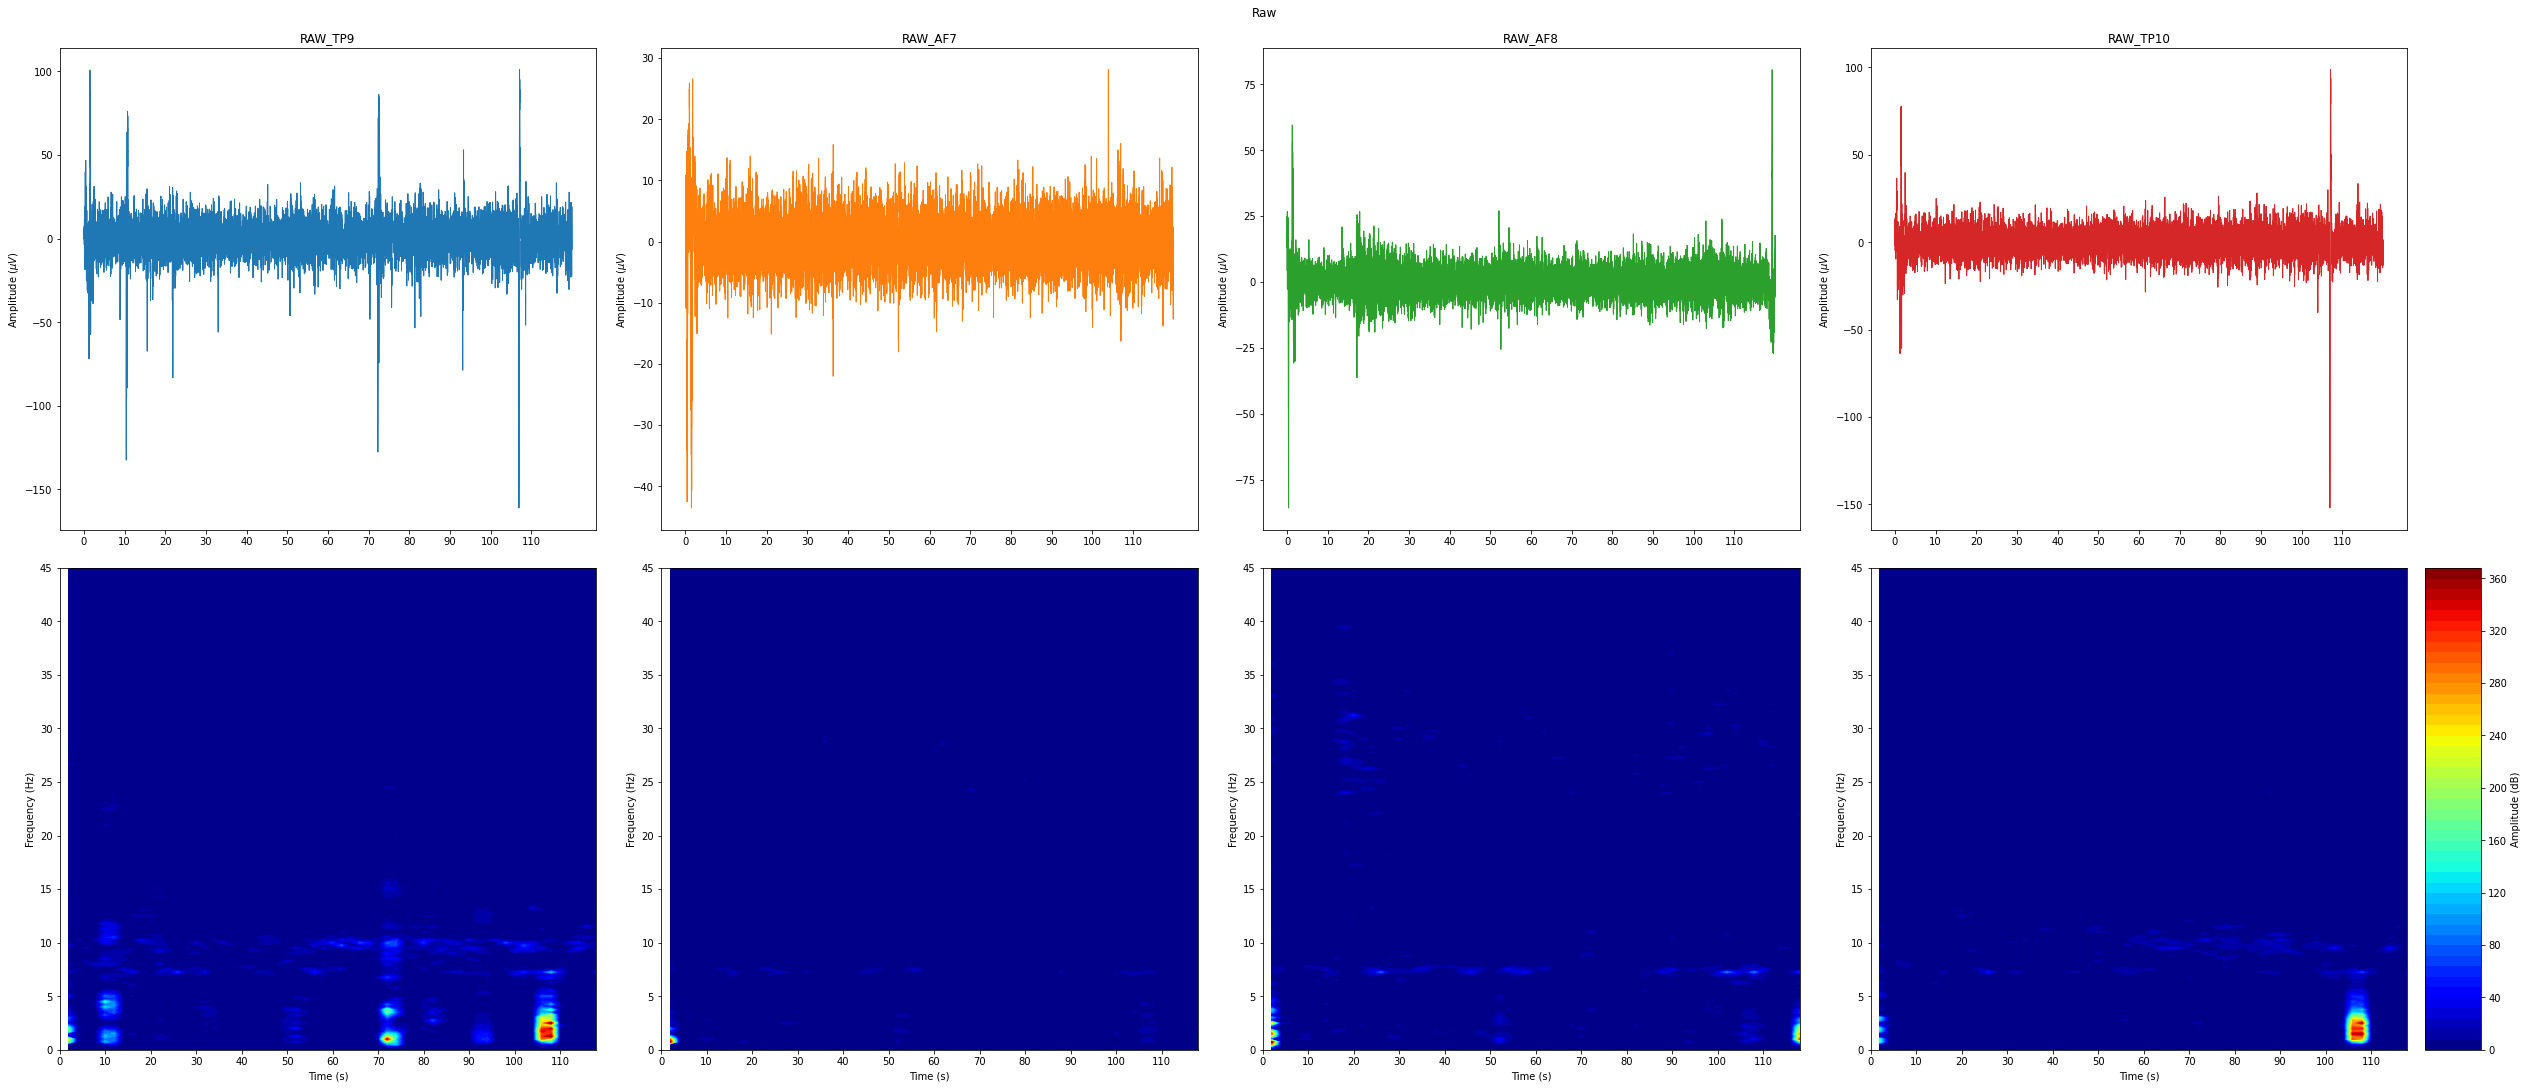

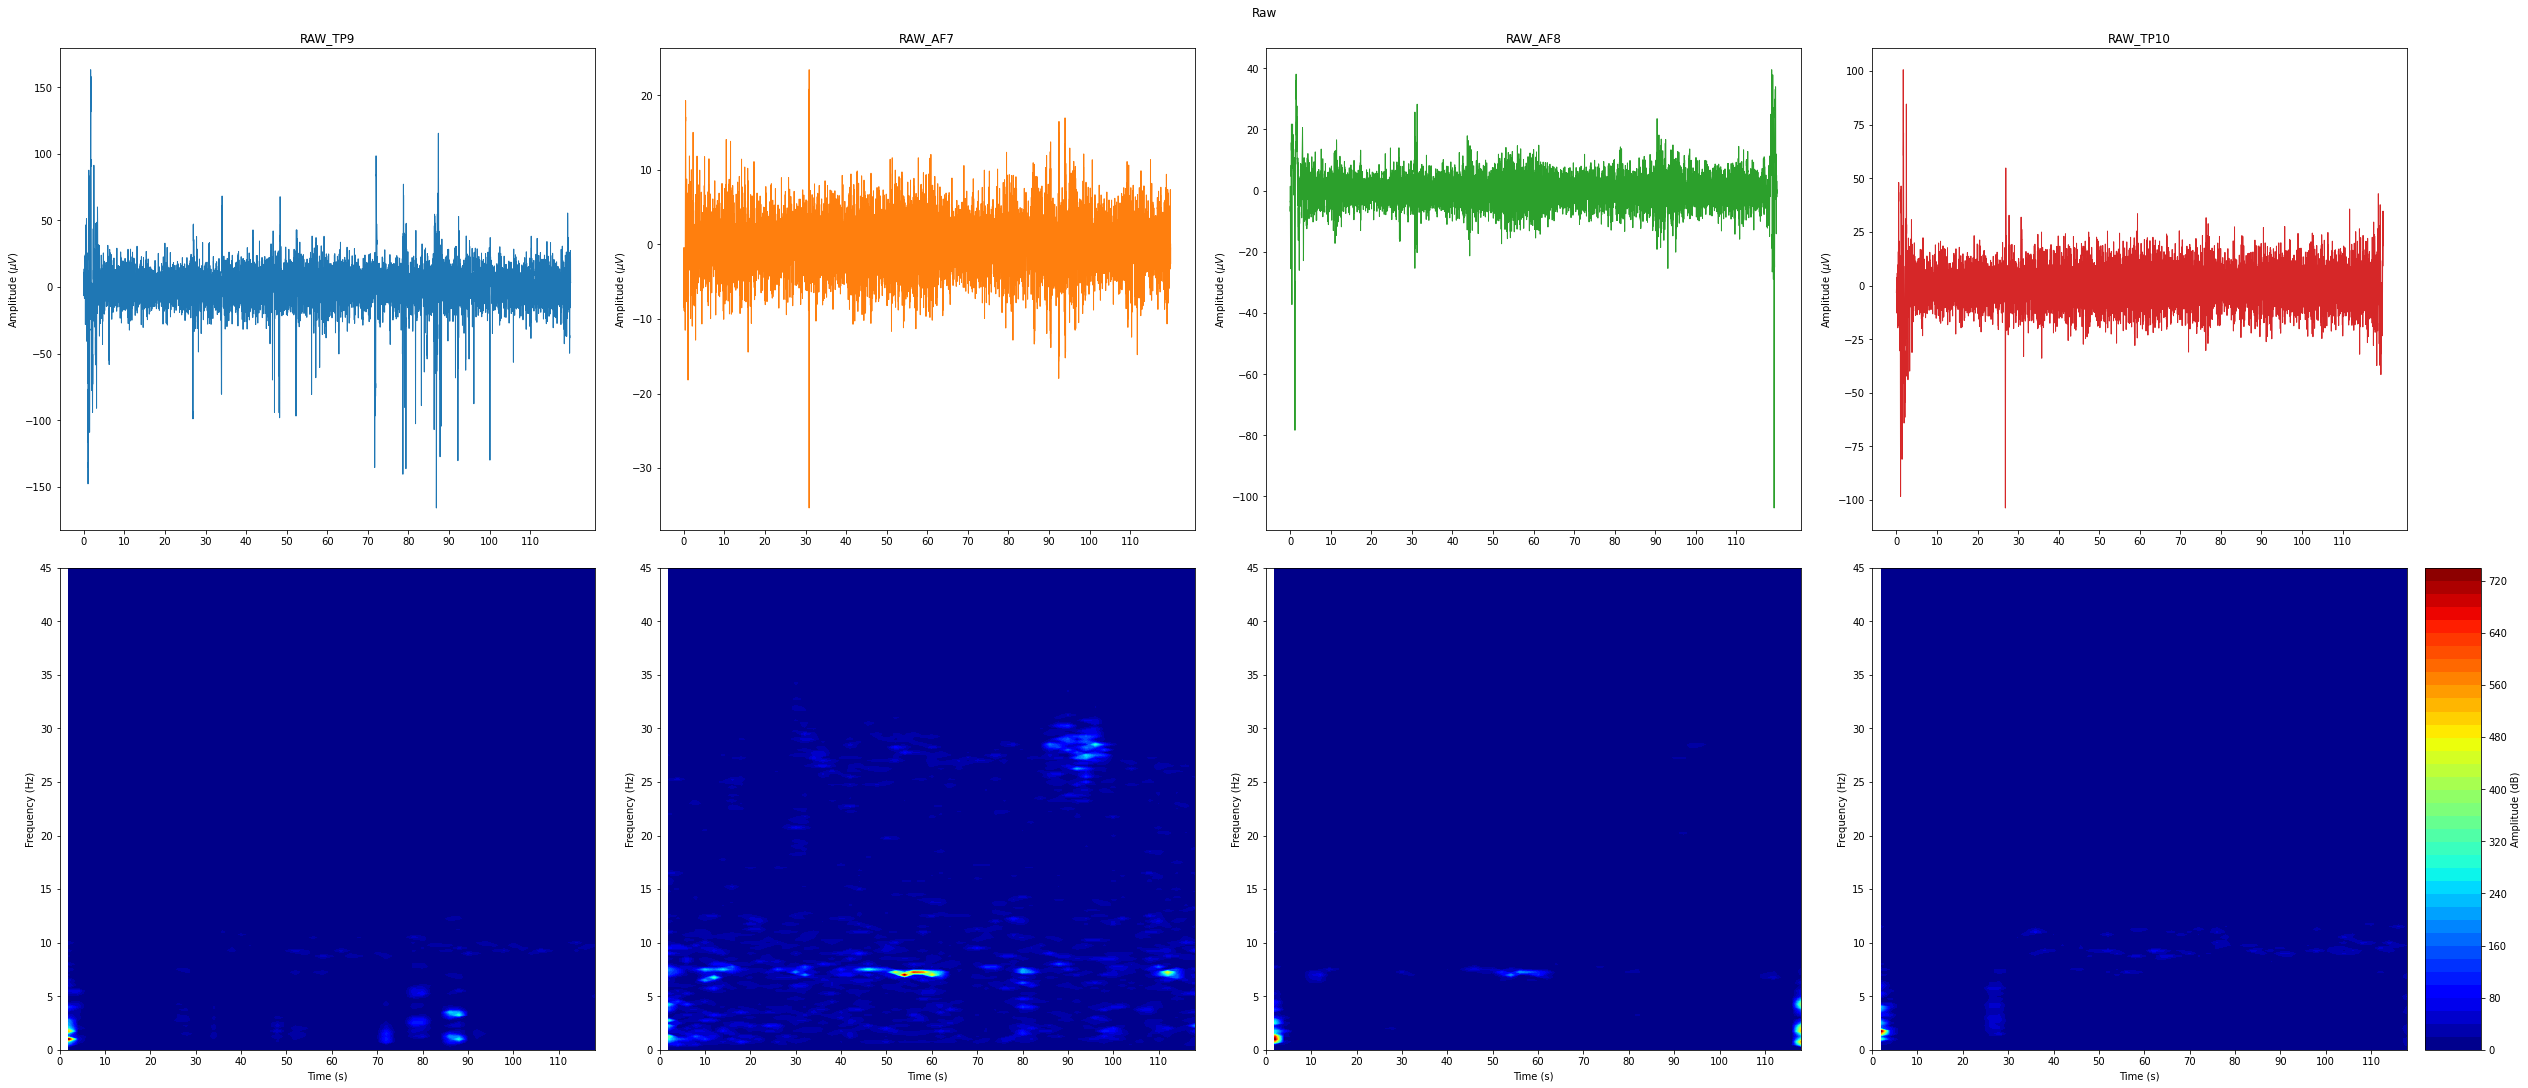

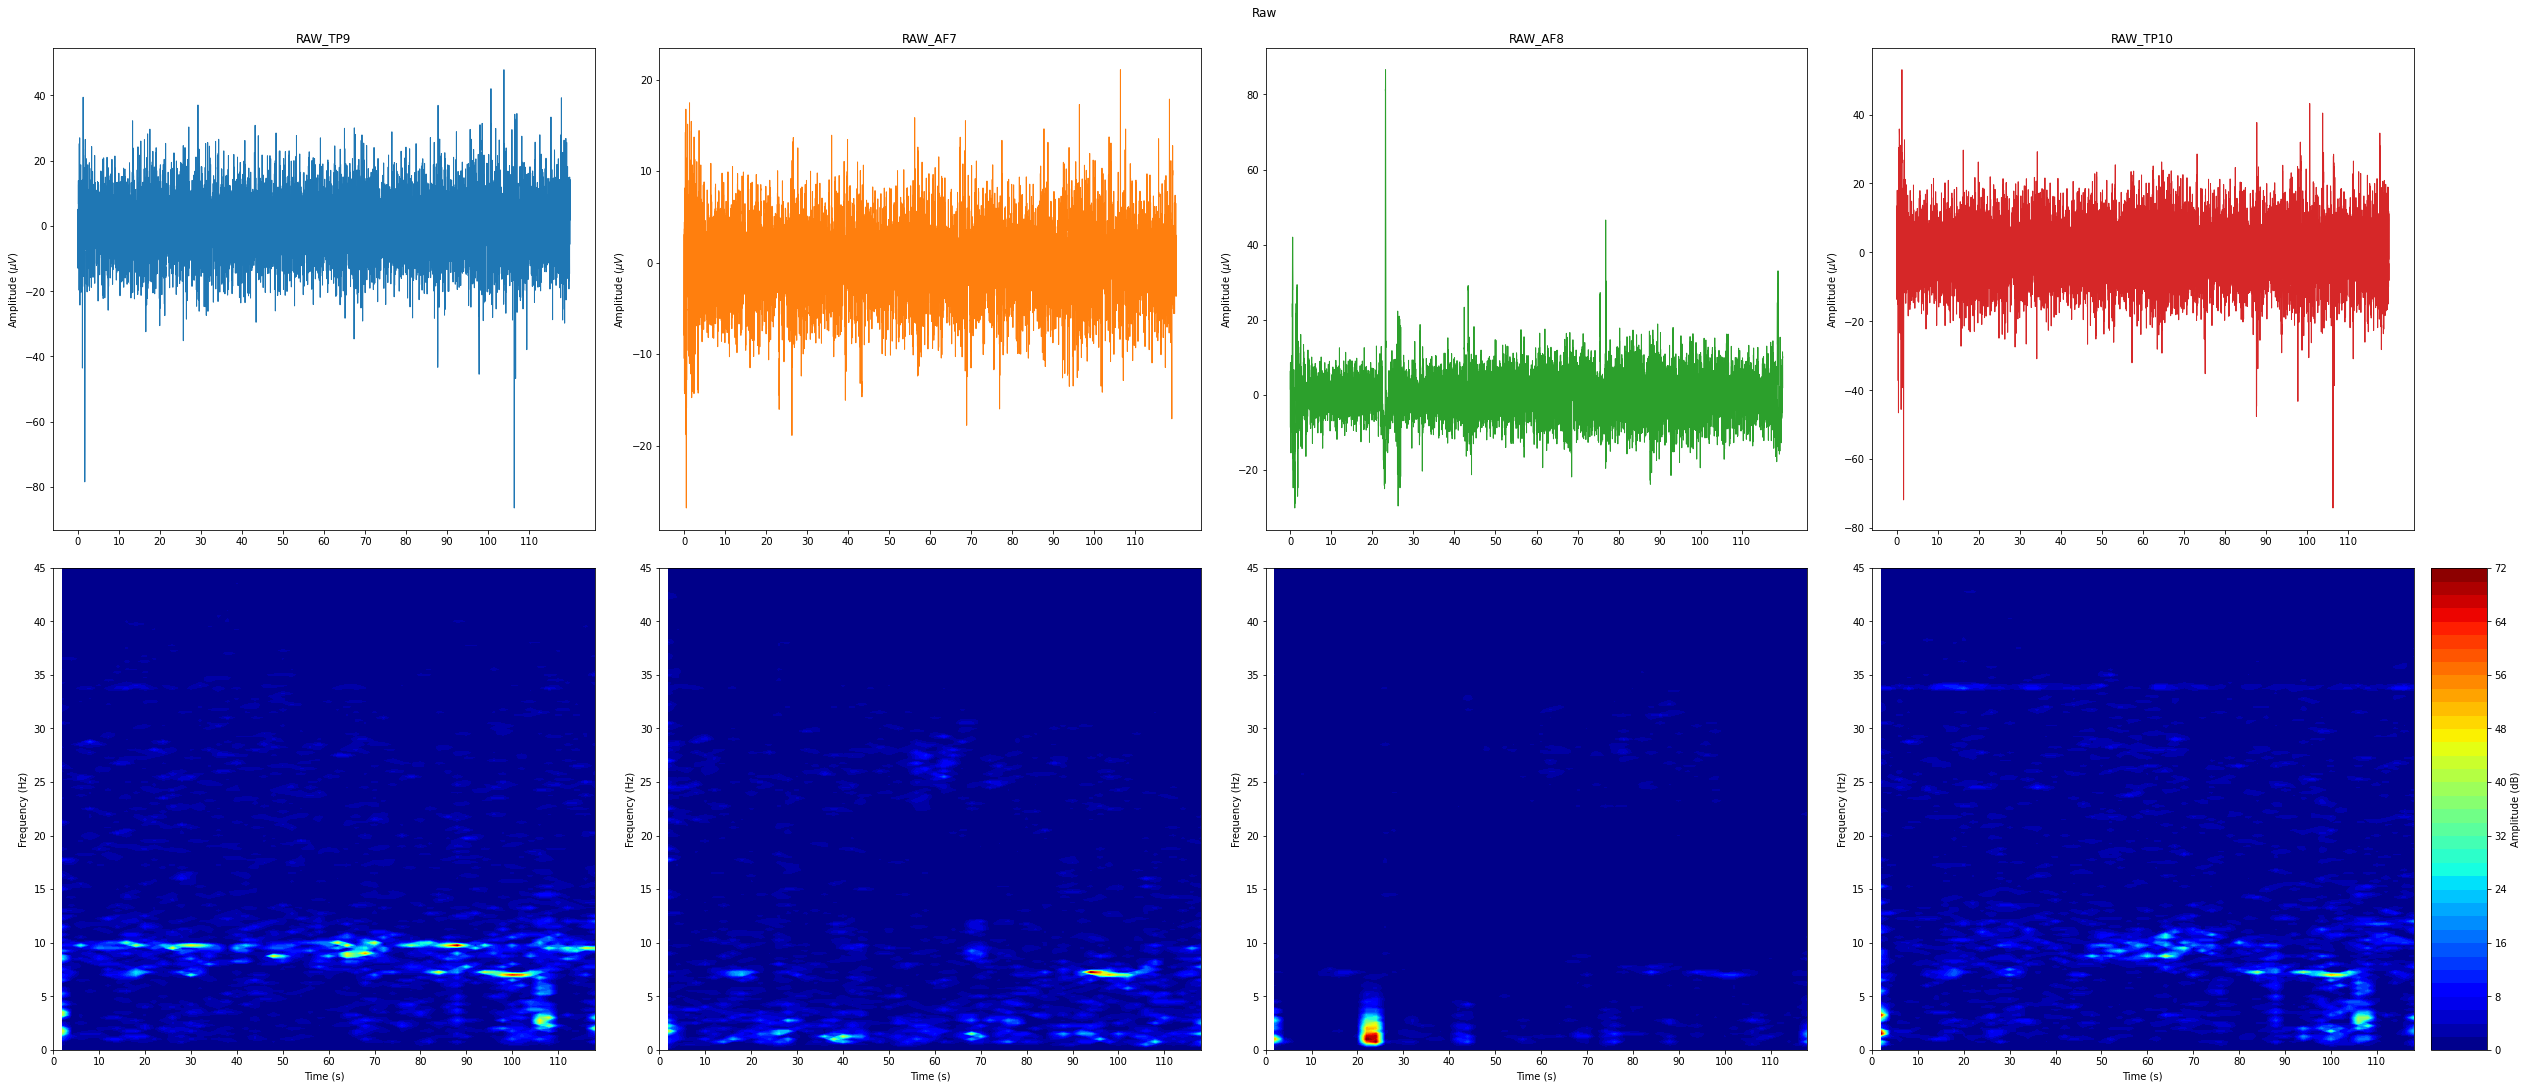

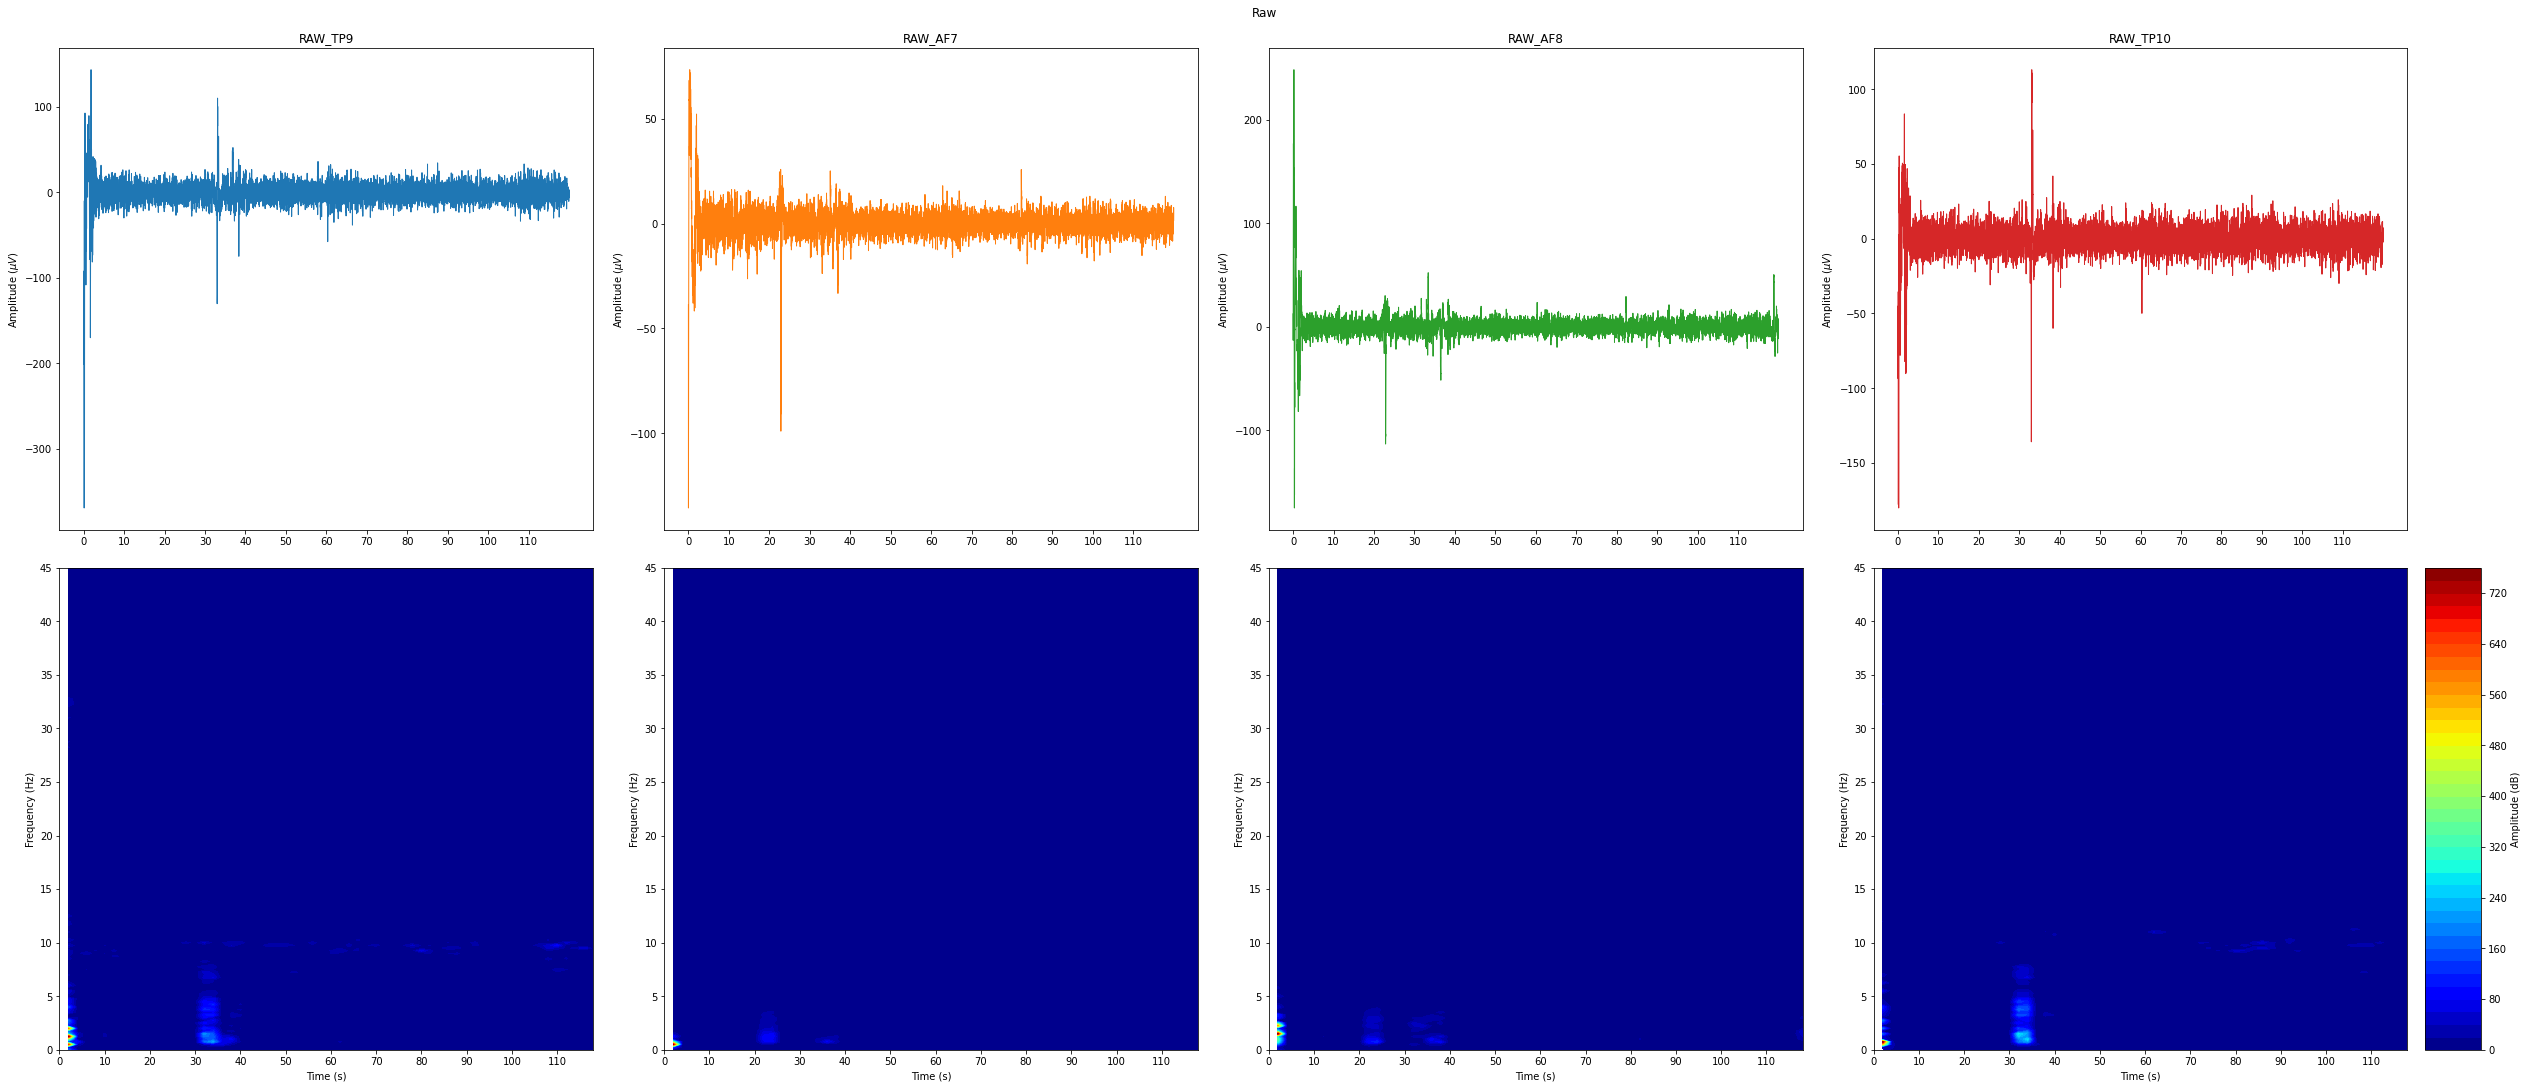

In [31]:
plots(data=band_C22[0],**args_1)
plots(data=band_C22[1],**args_1)
plots(data=band_C22[2],**args_1)
plots(data=band_C22[3],**args_1)
plots(data=band_C22[4],**args_1)

<b>Music Therapy Group<b>

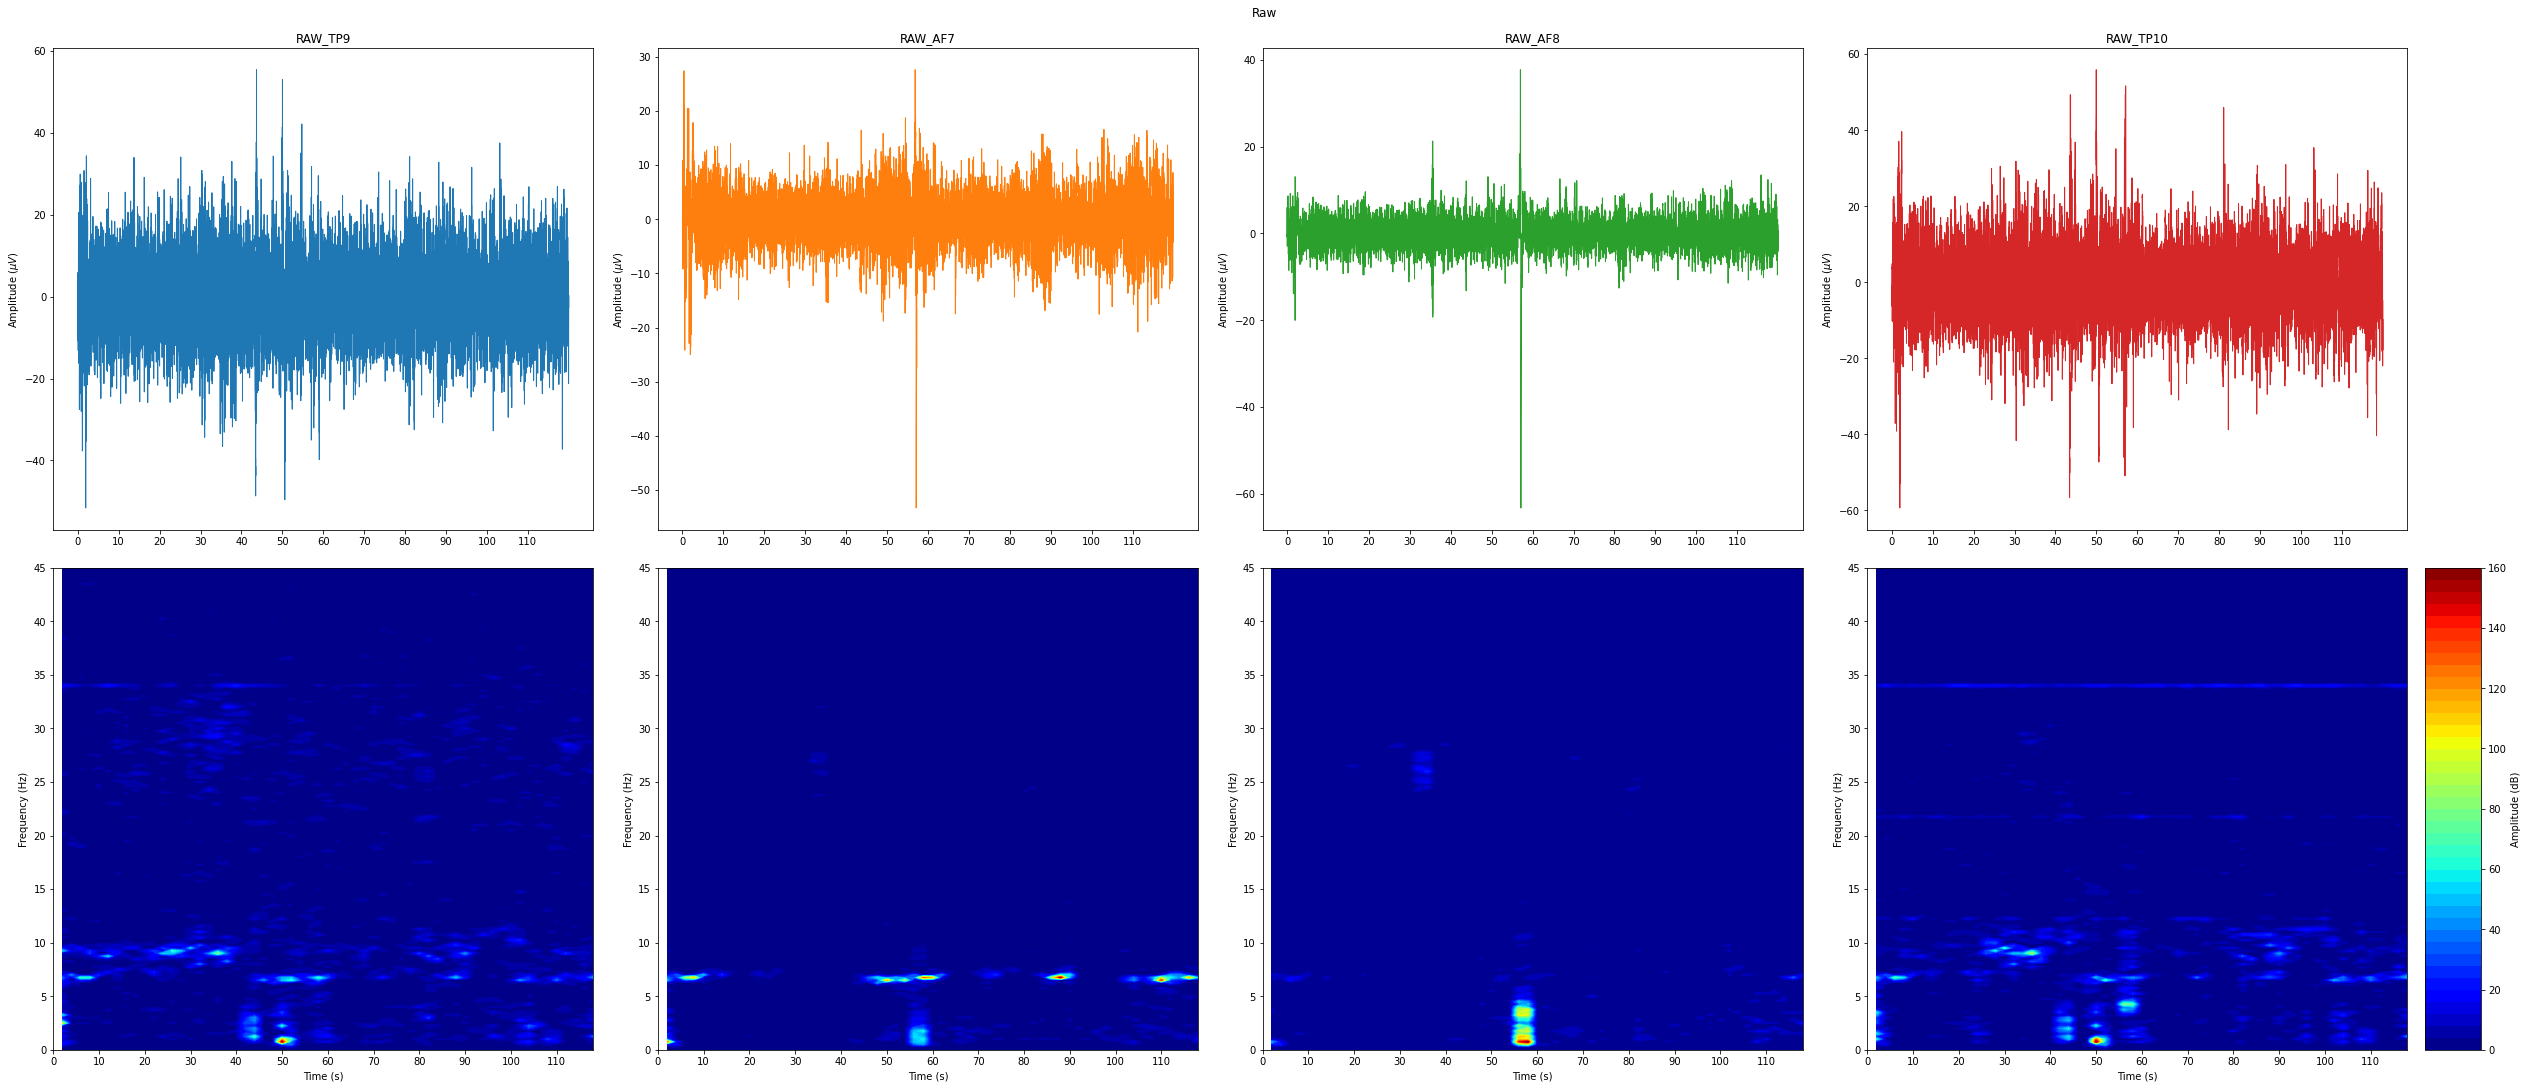

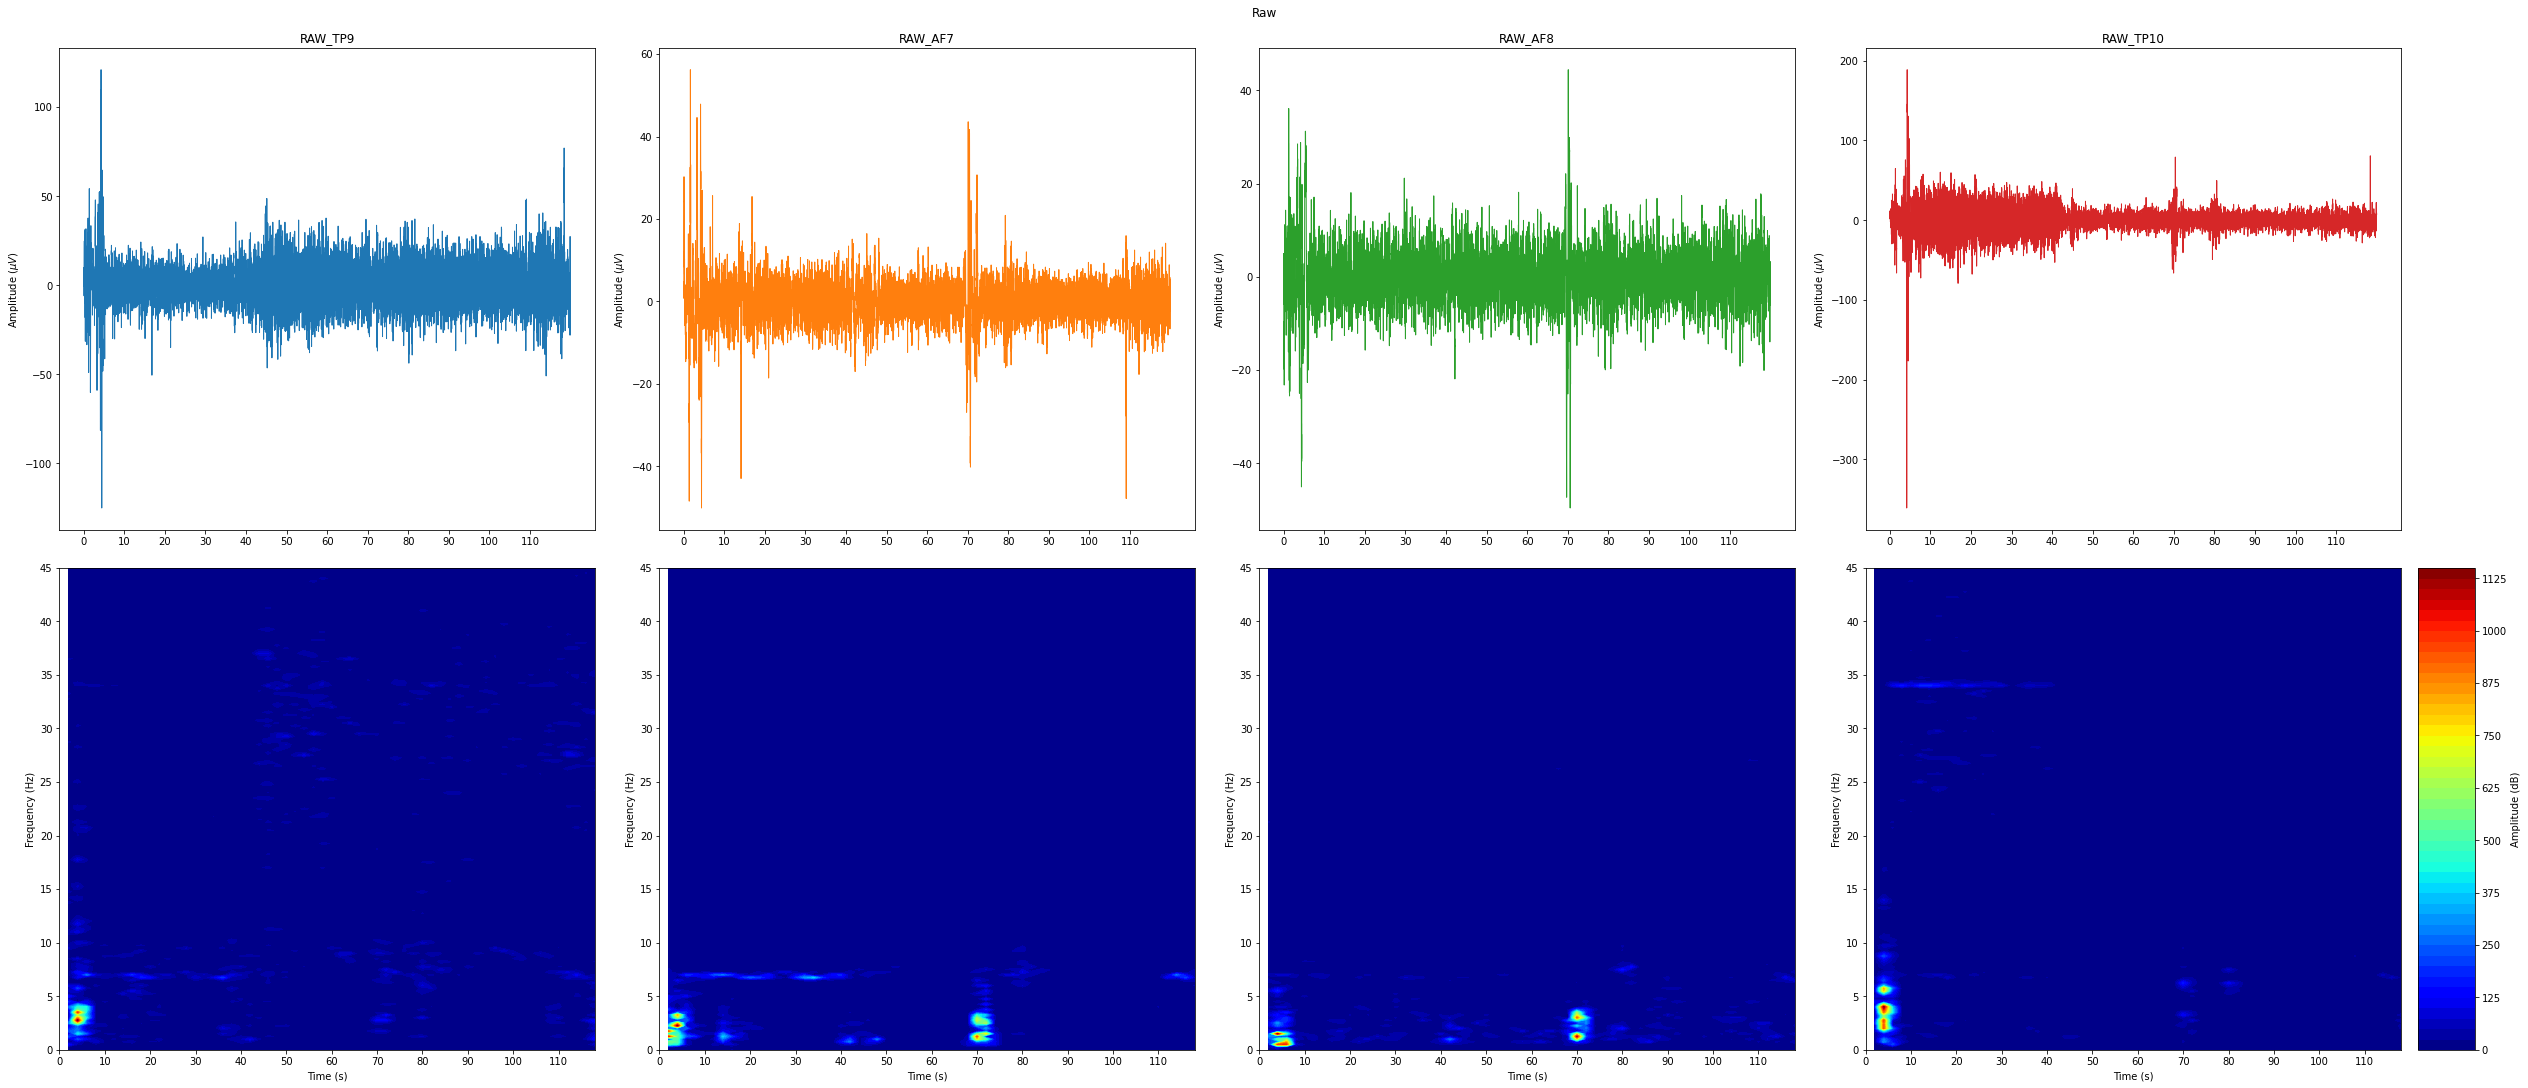

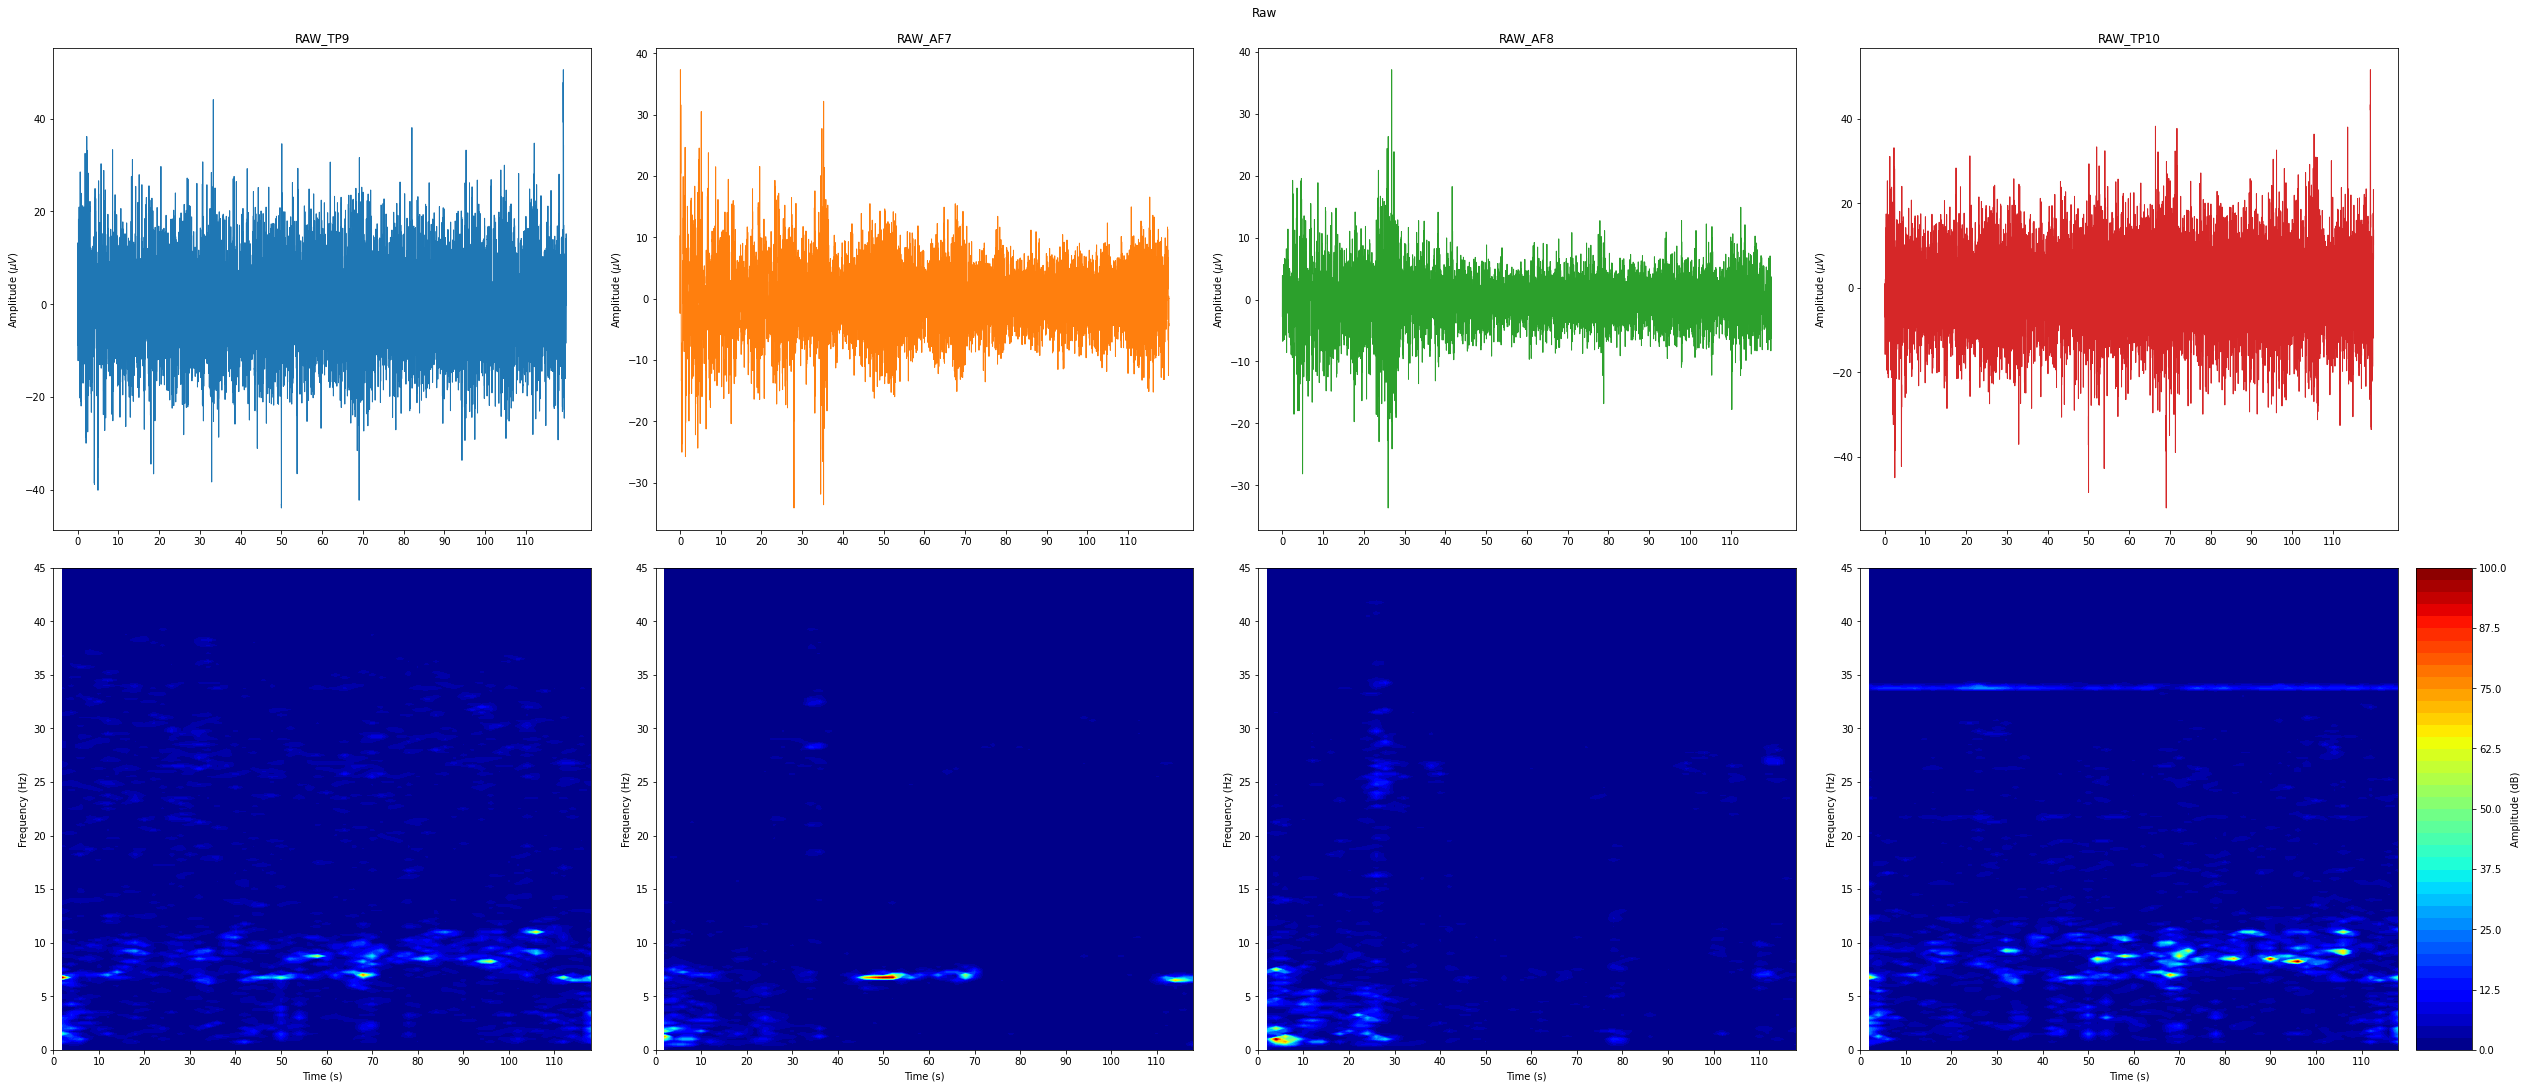

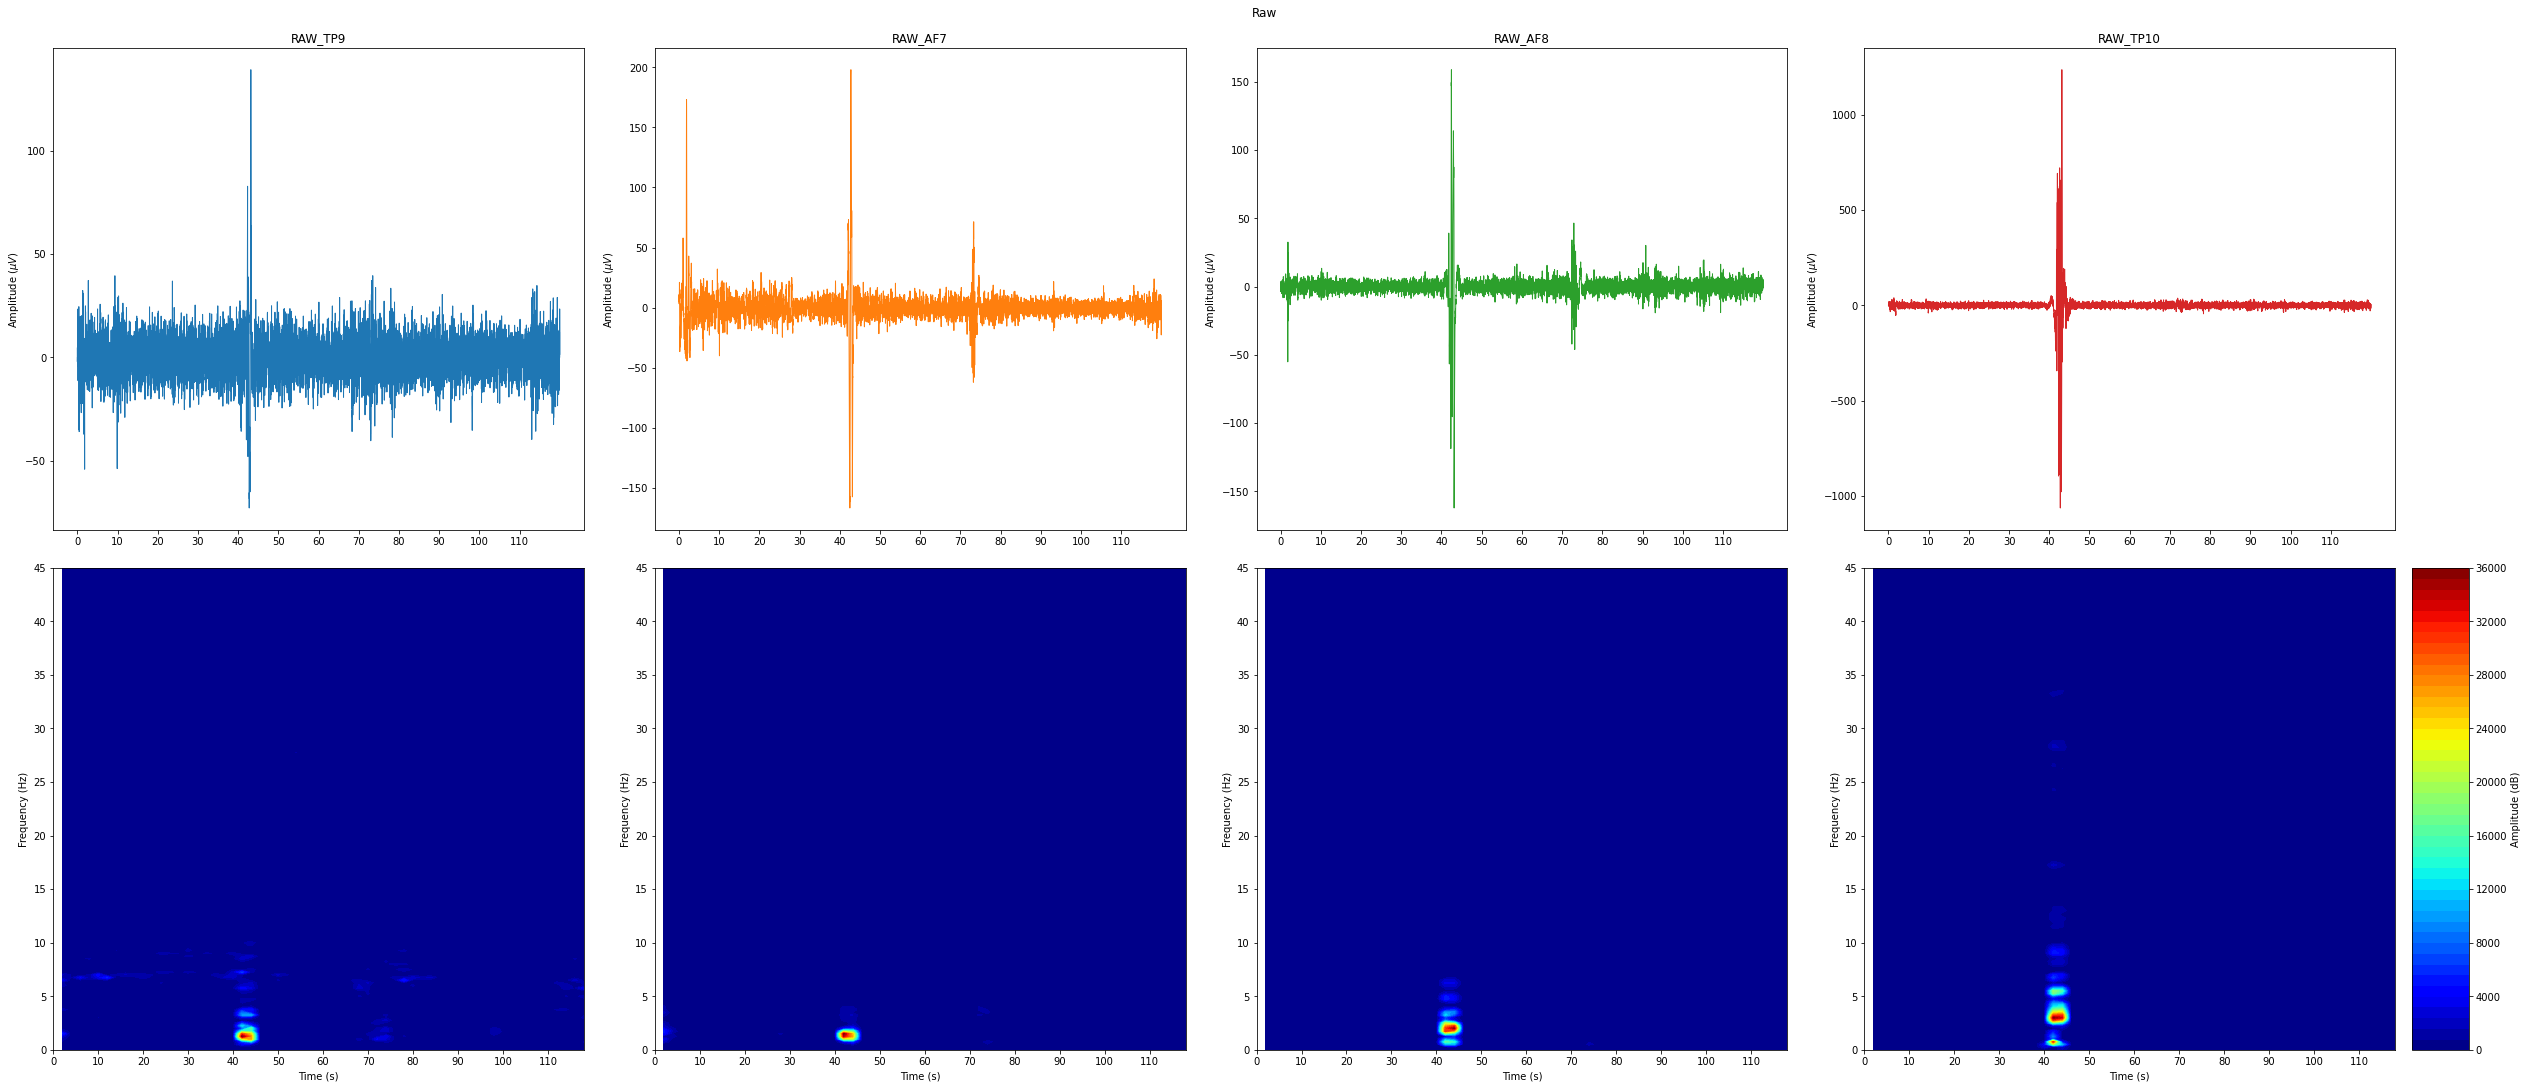

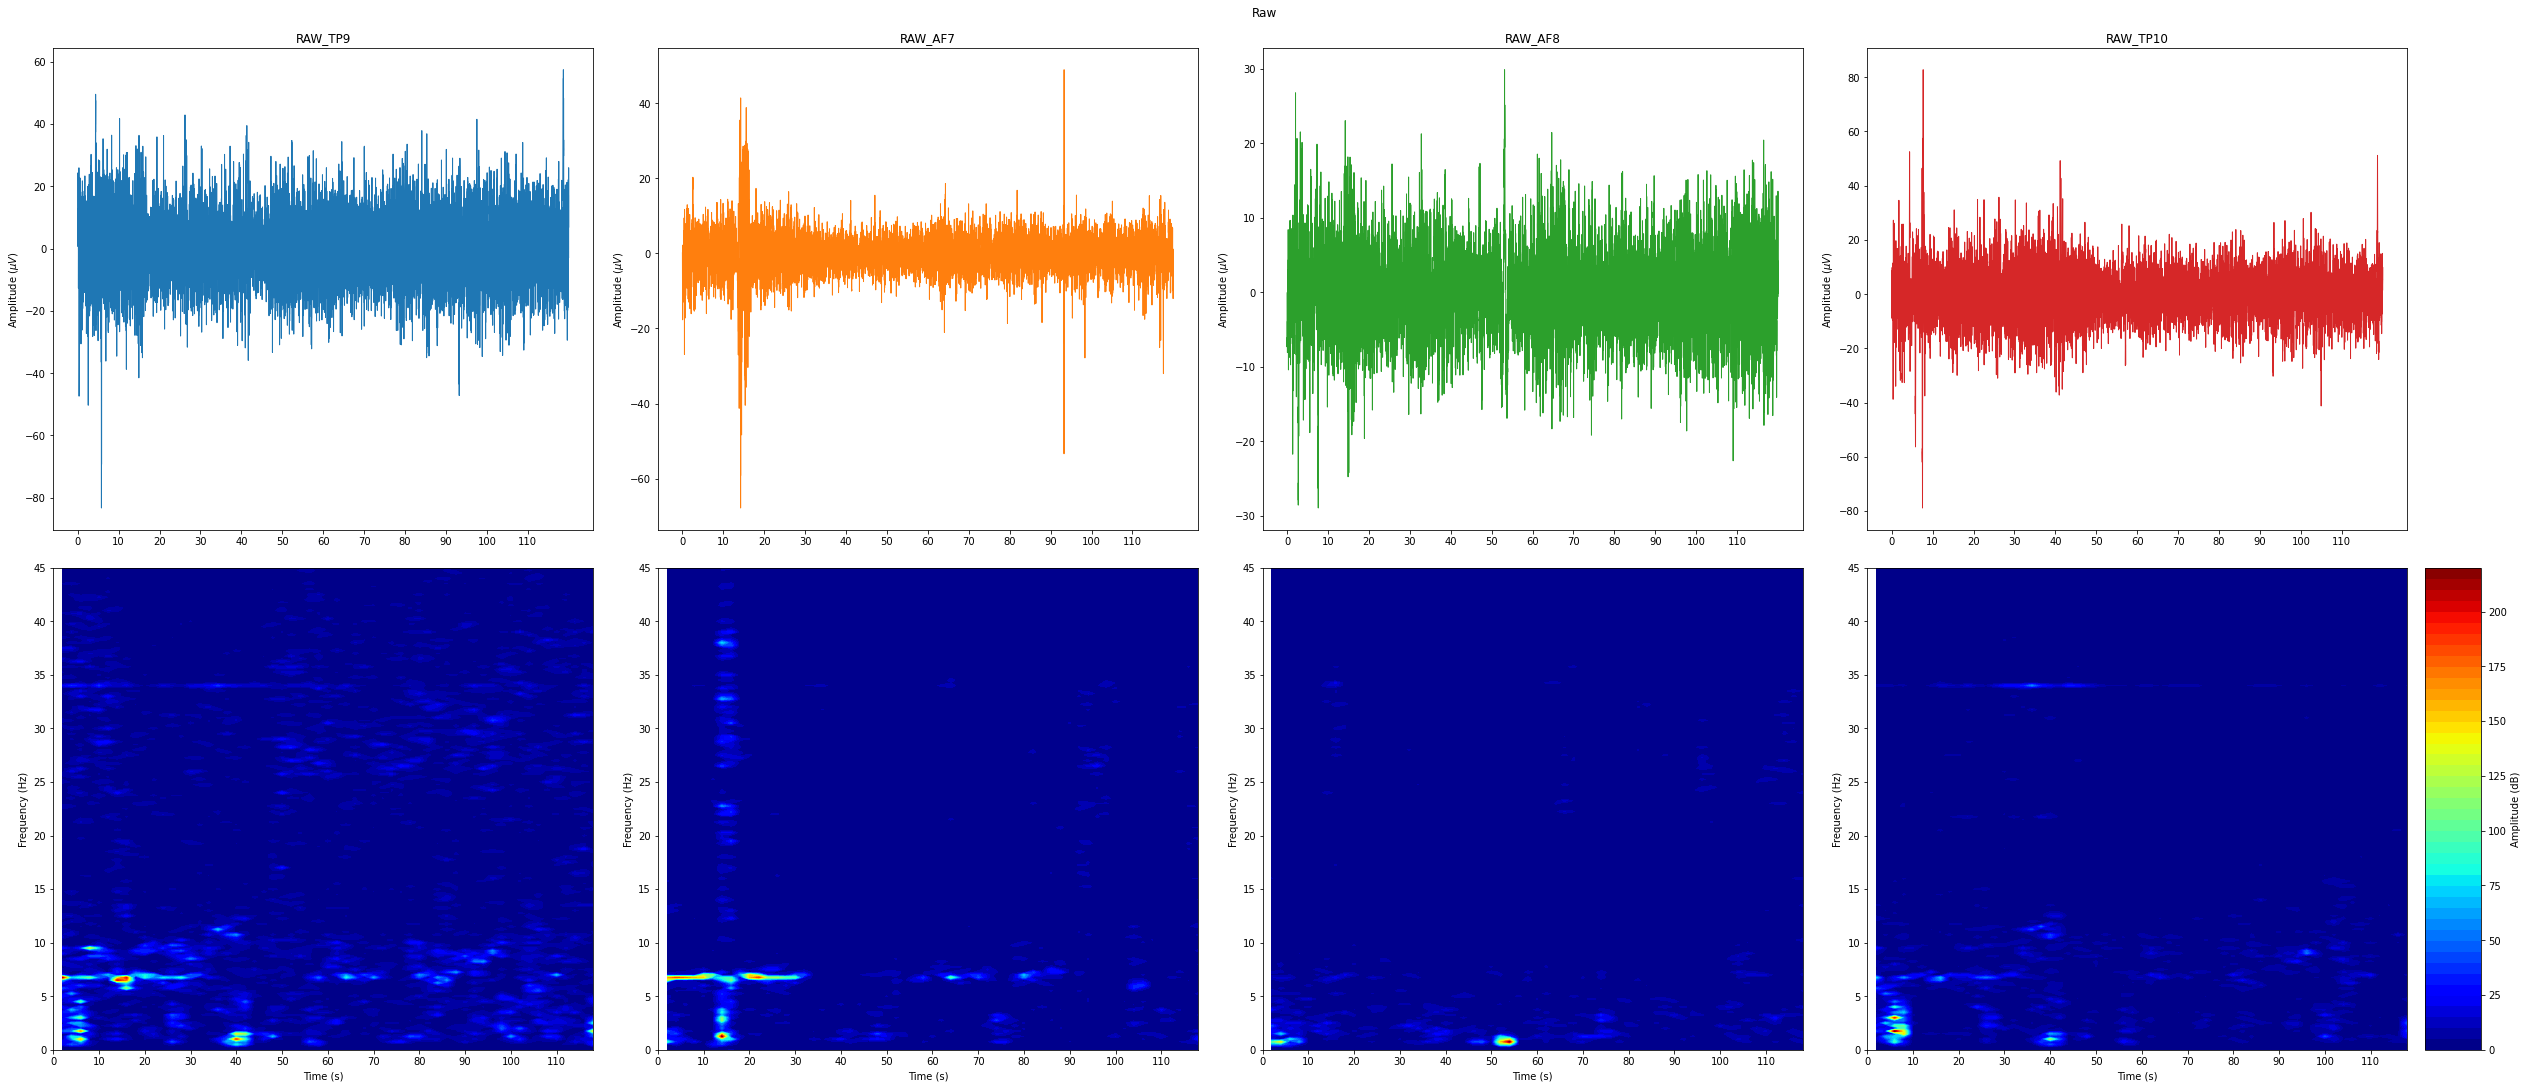

In [32]:
plots(data=band_M11[0],**args_1)
plots(data=band_M11[1],**args_1)
plots(data=band_M11[2],**args_1)
plots(data=band_M11[3],**args_1)
plots(data=band_M11[4],**args_1)

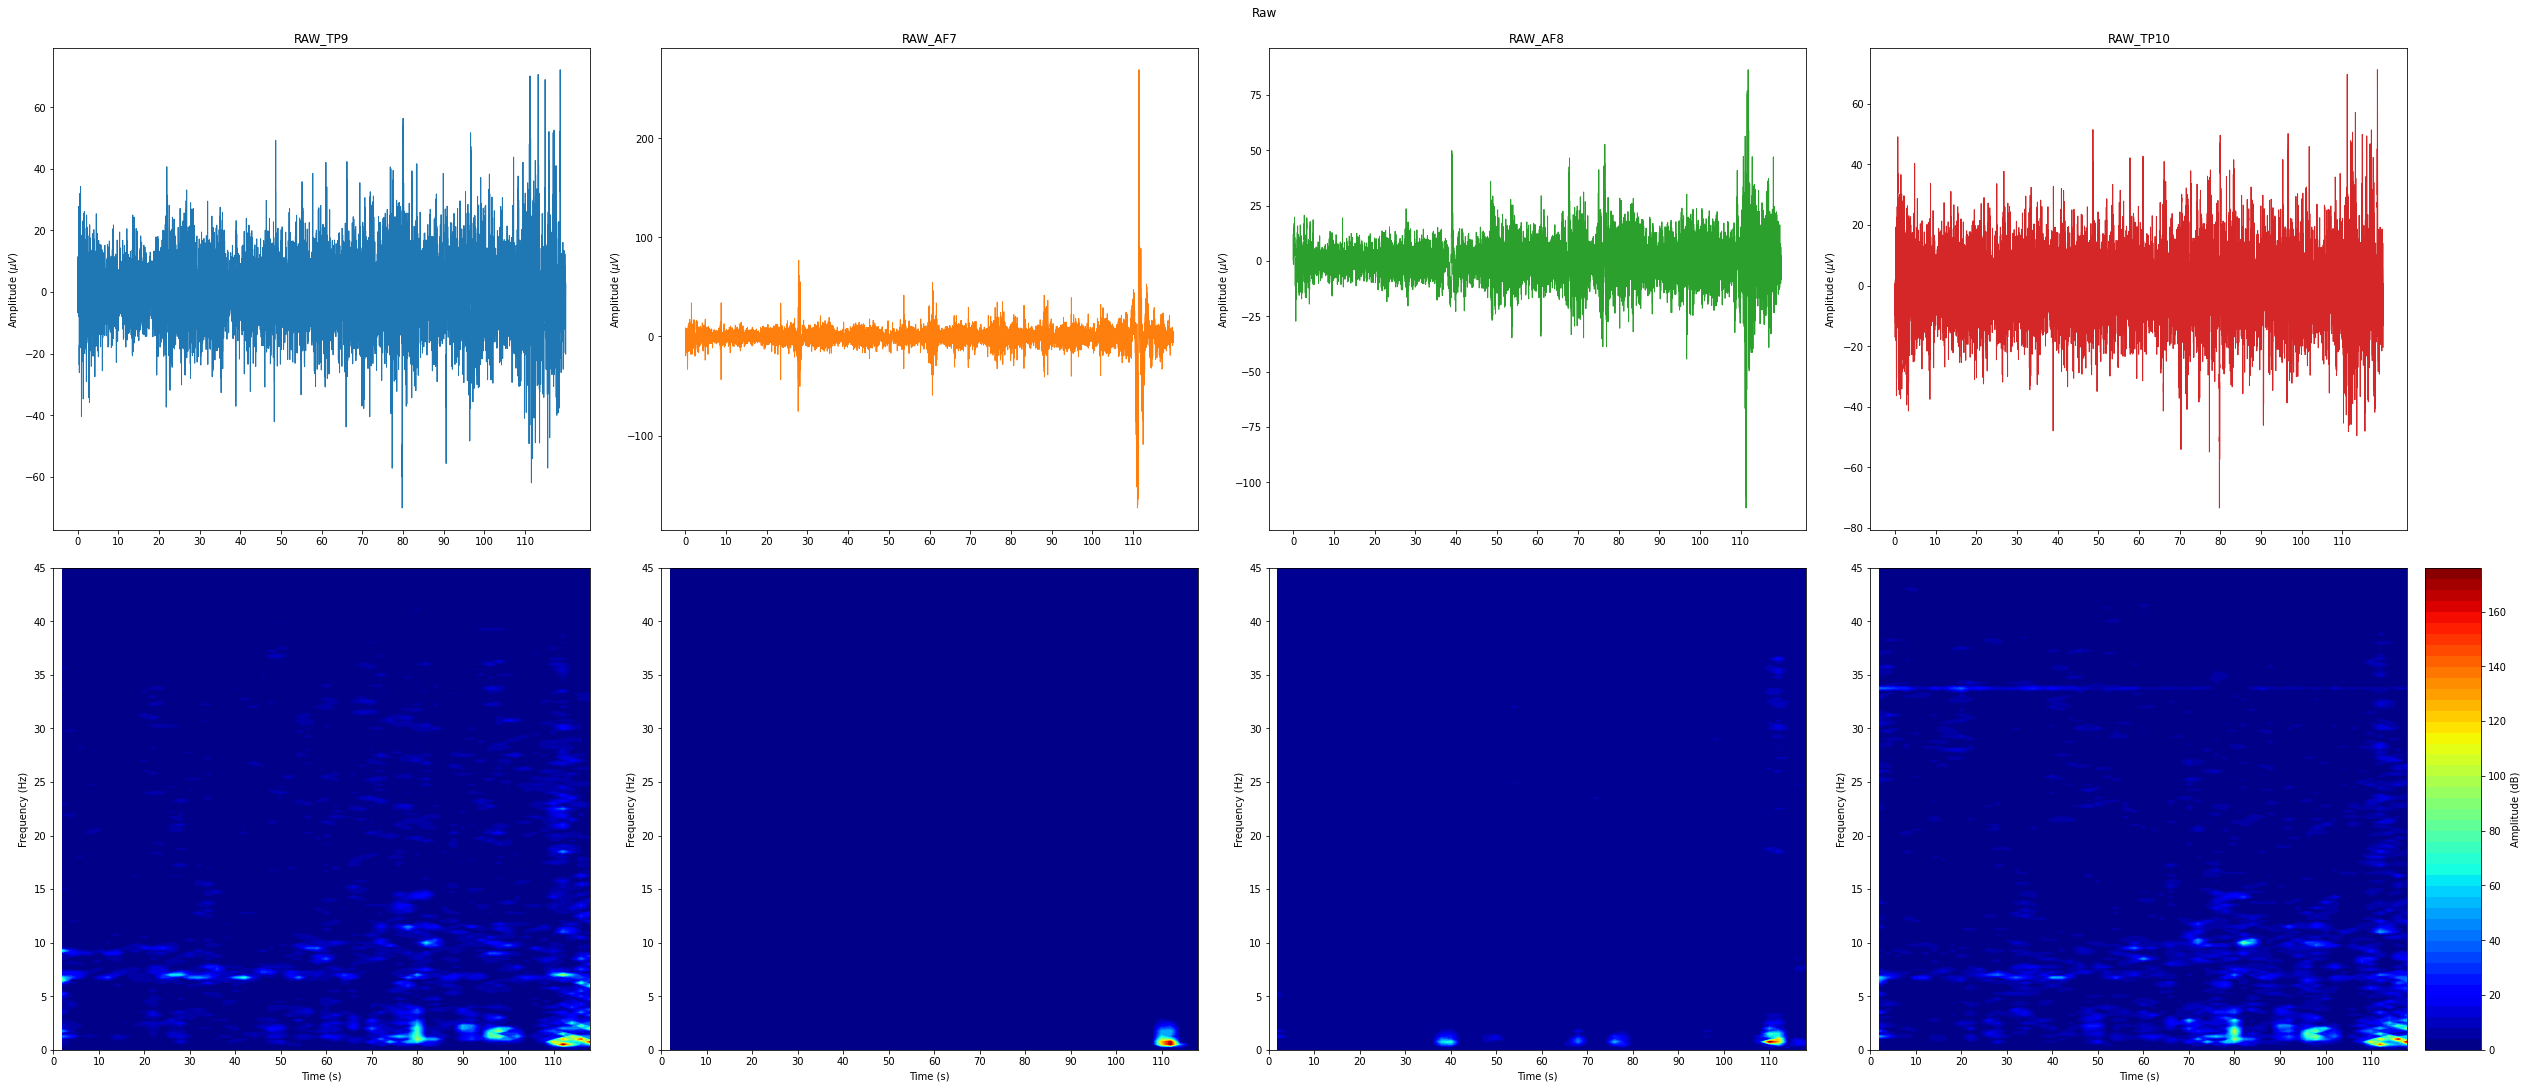

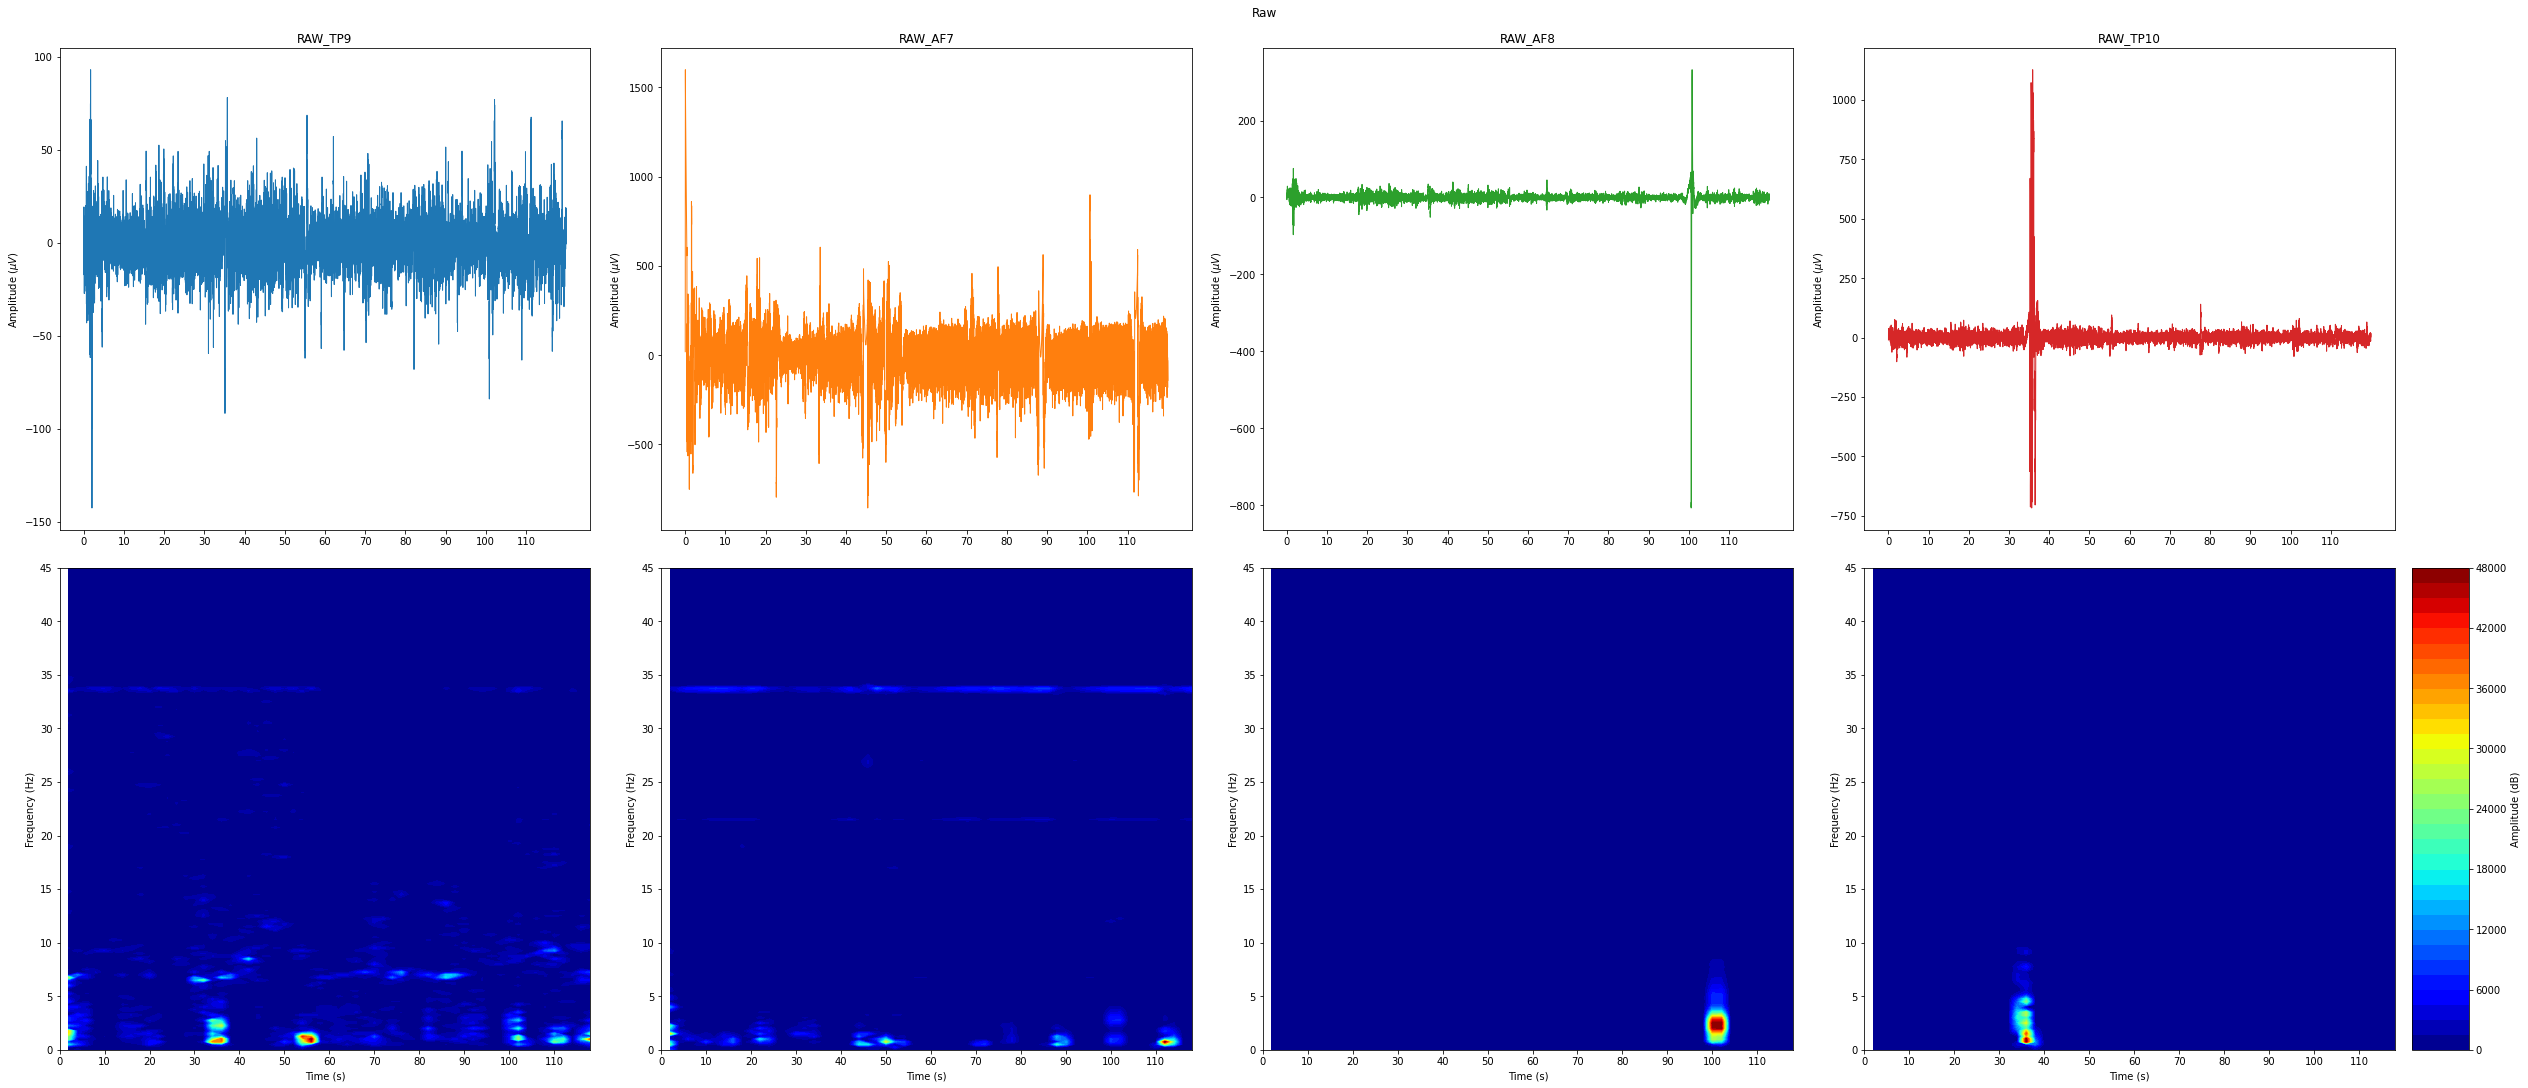

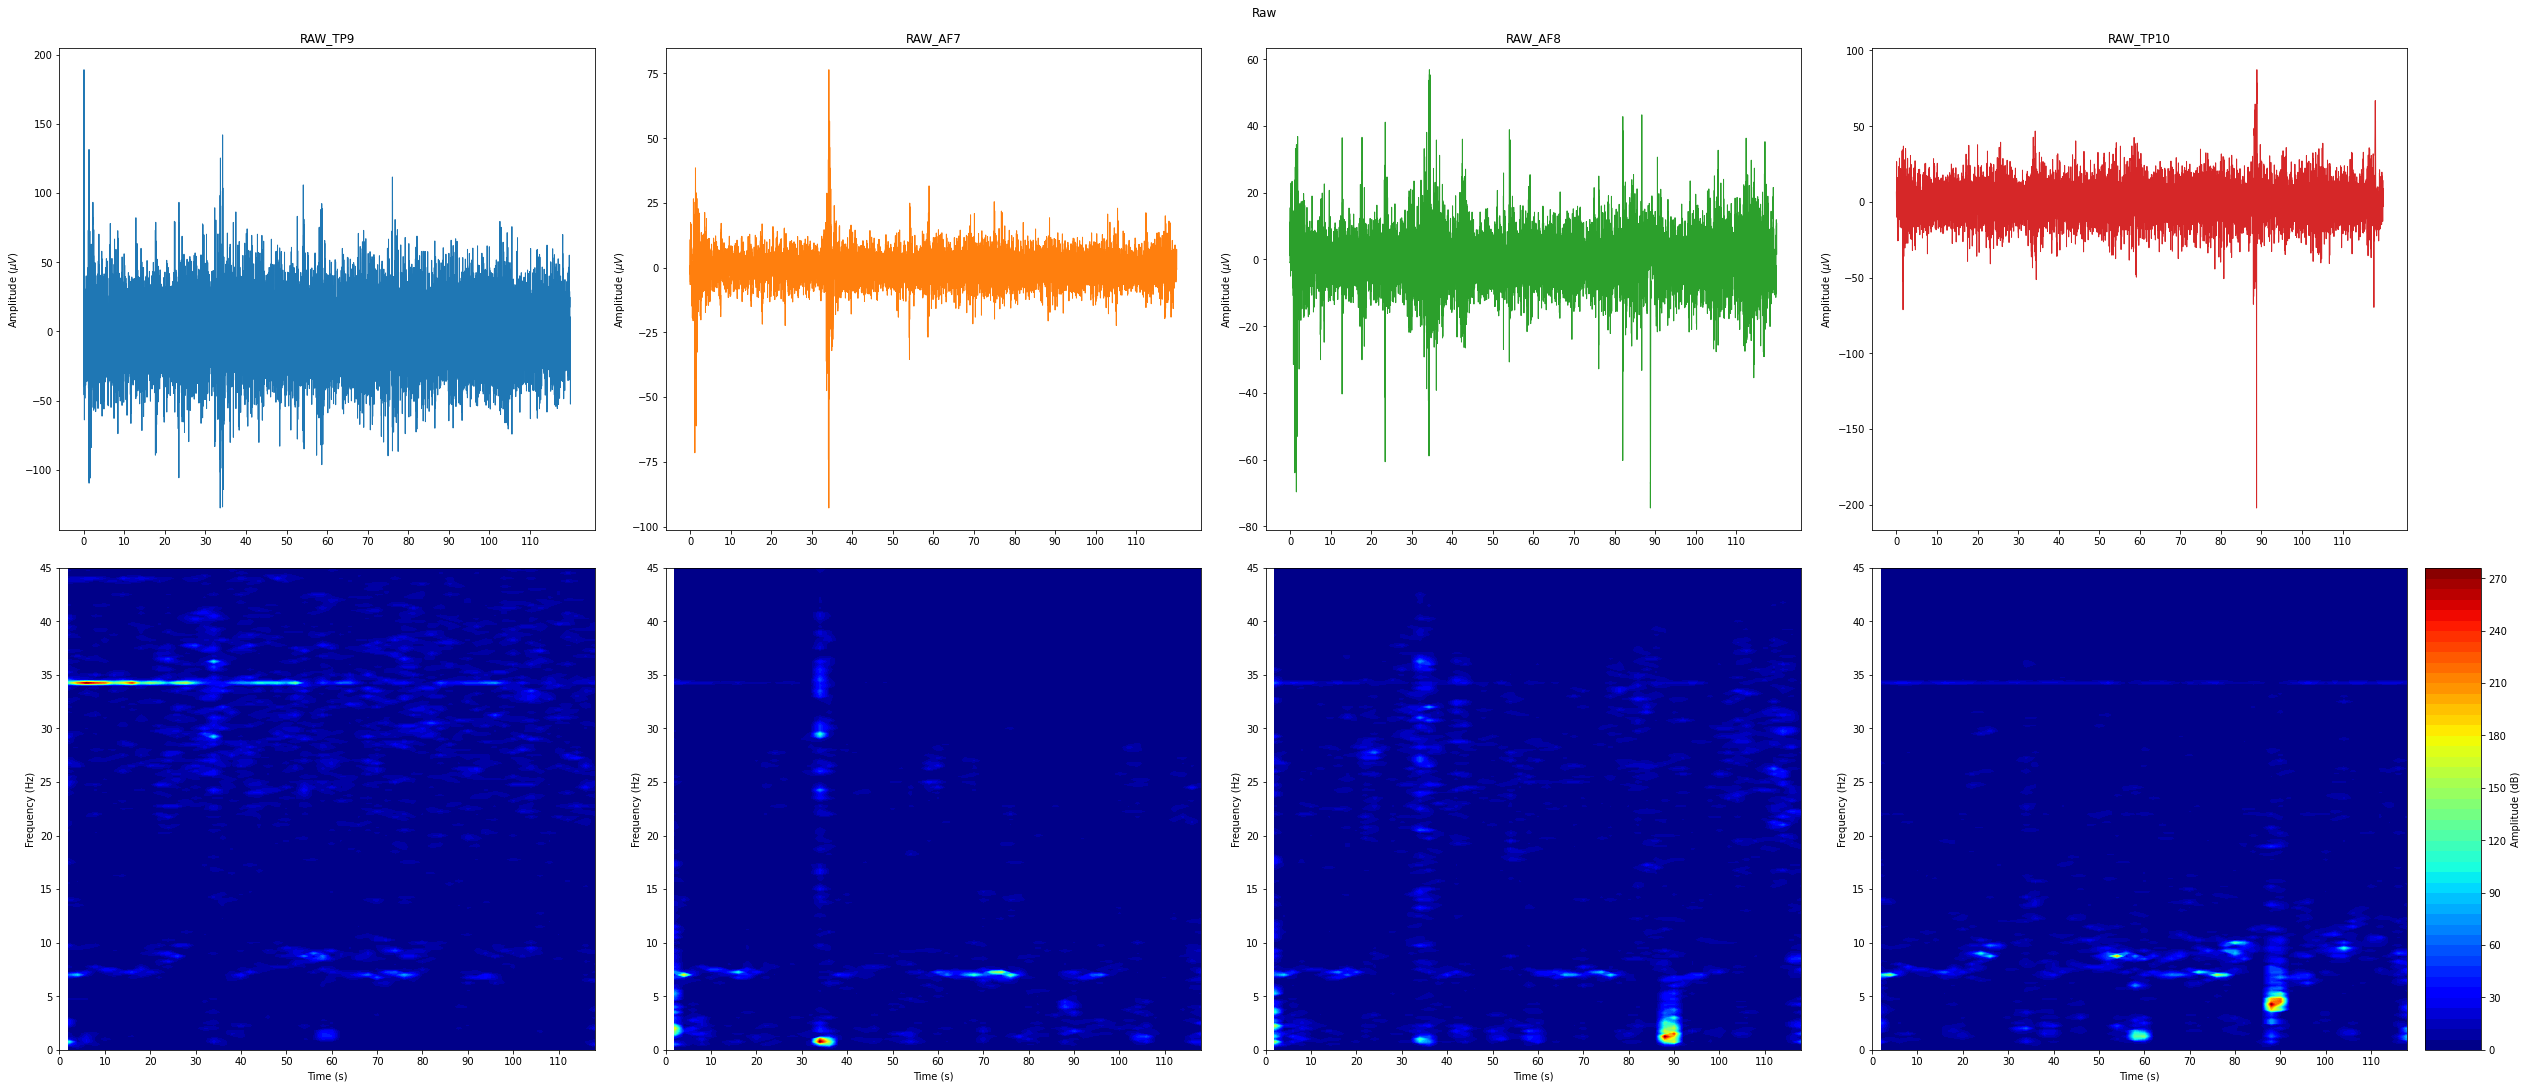

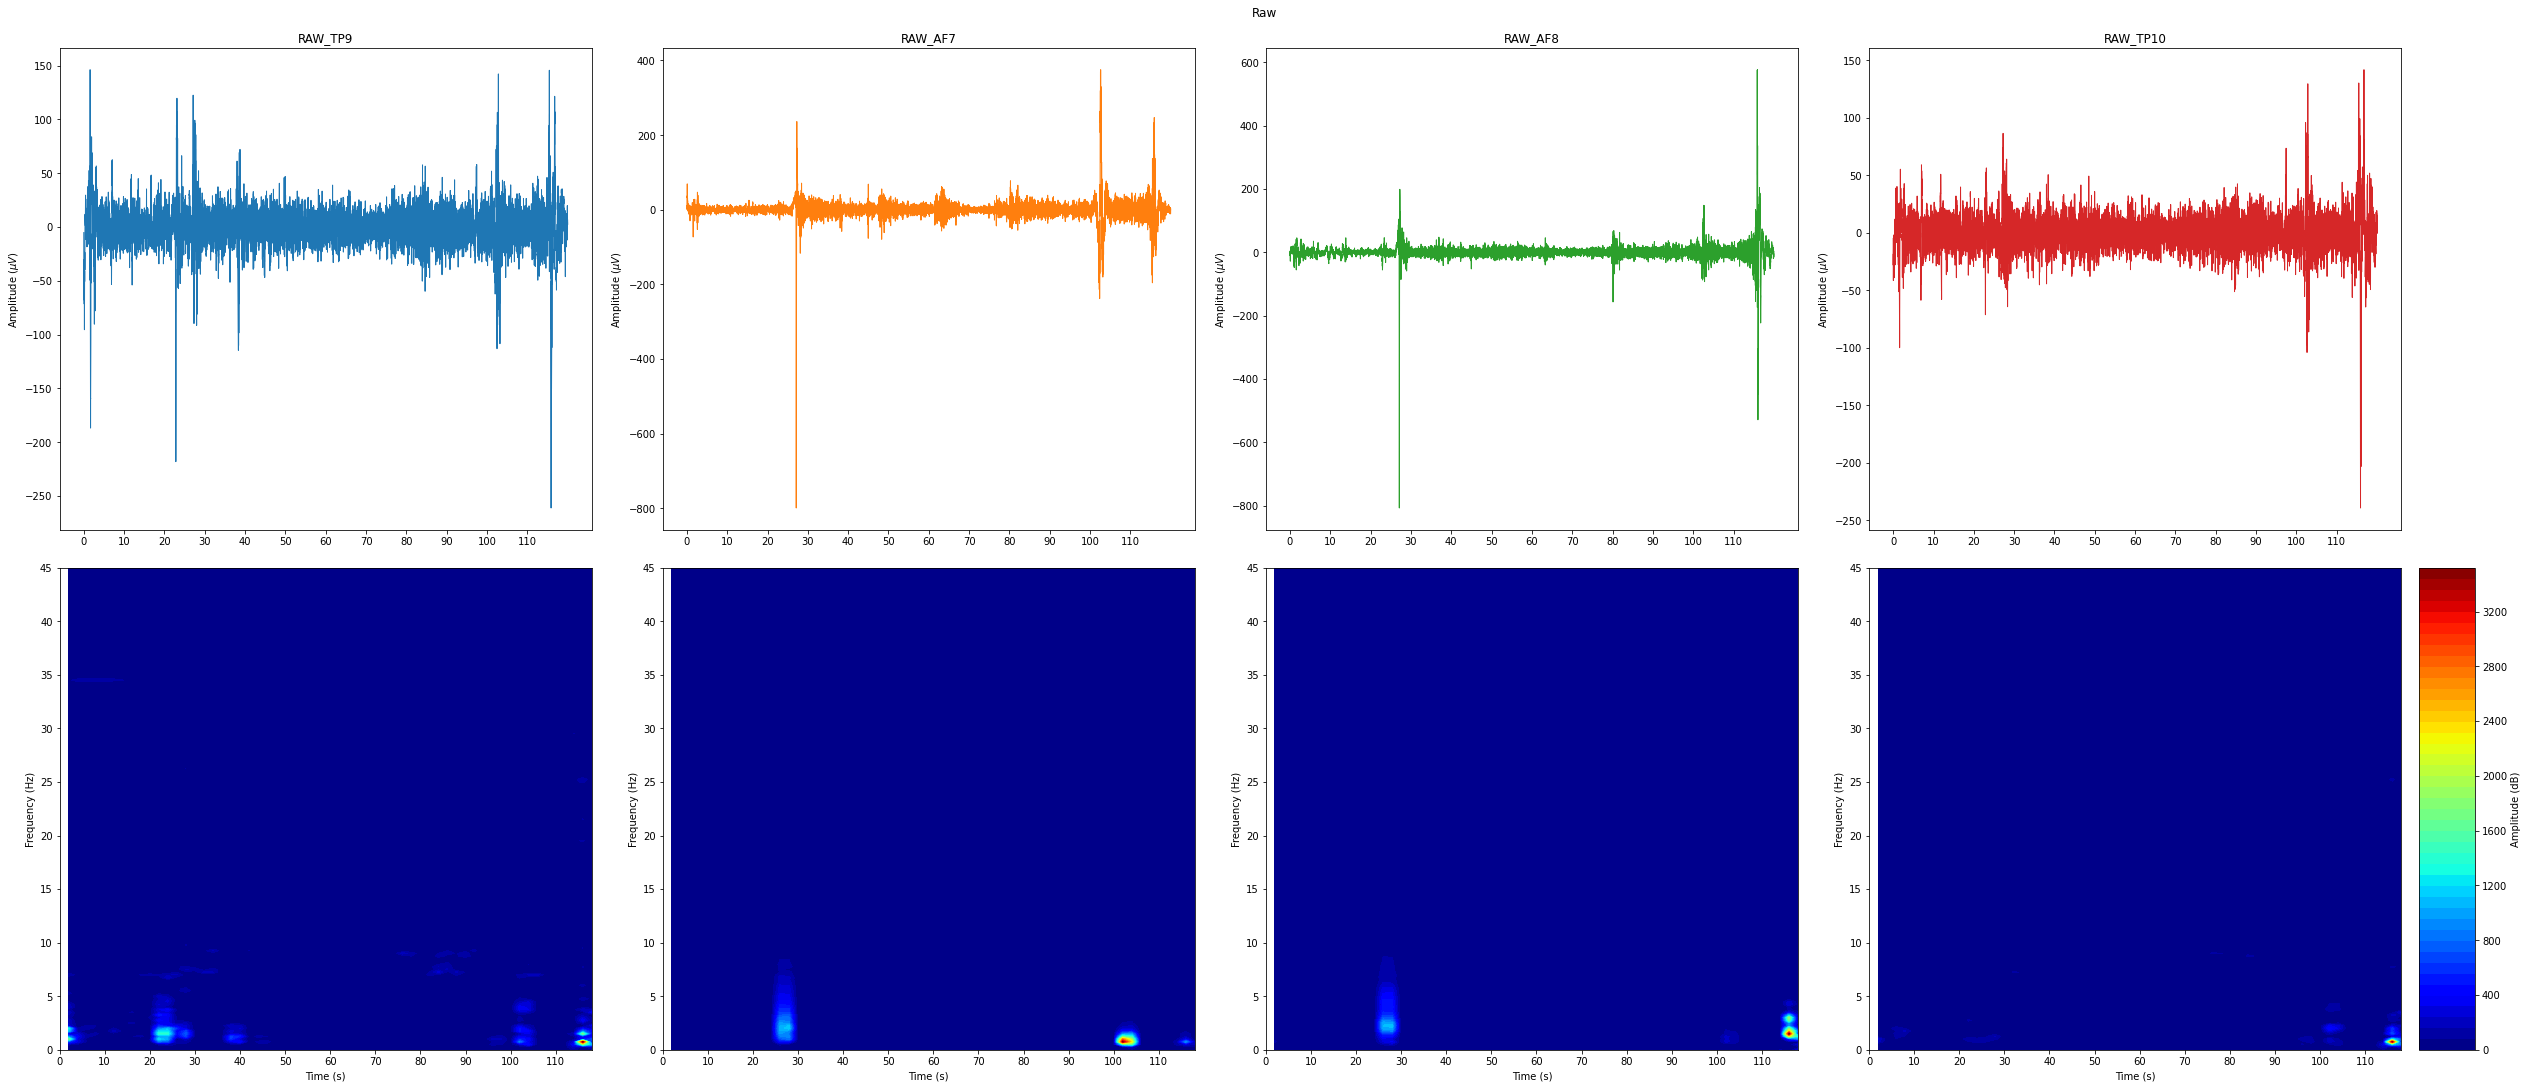

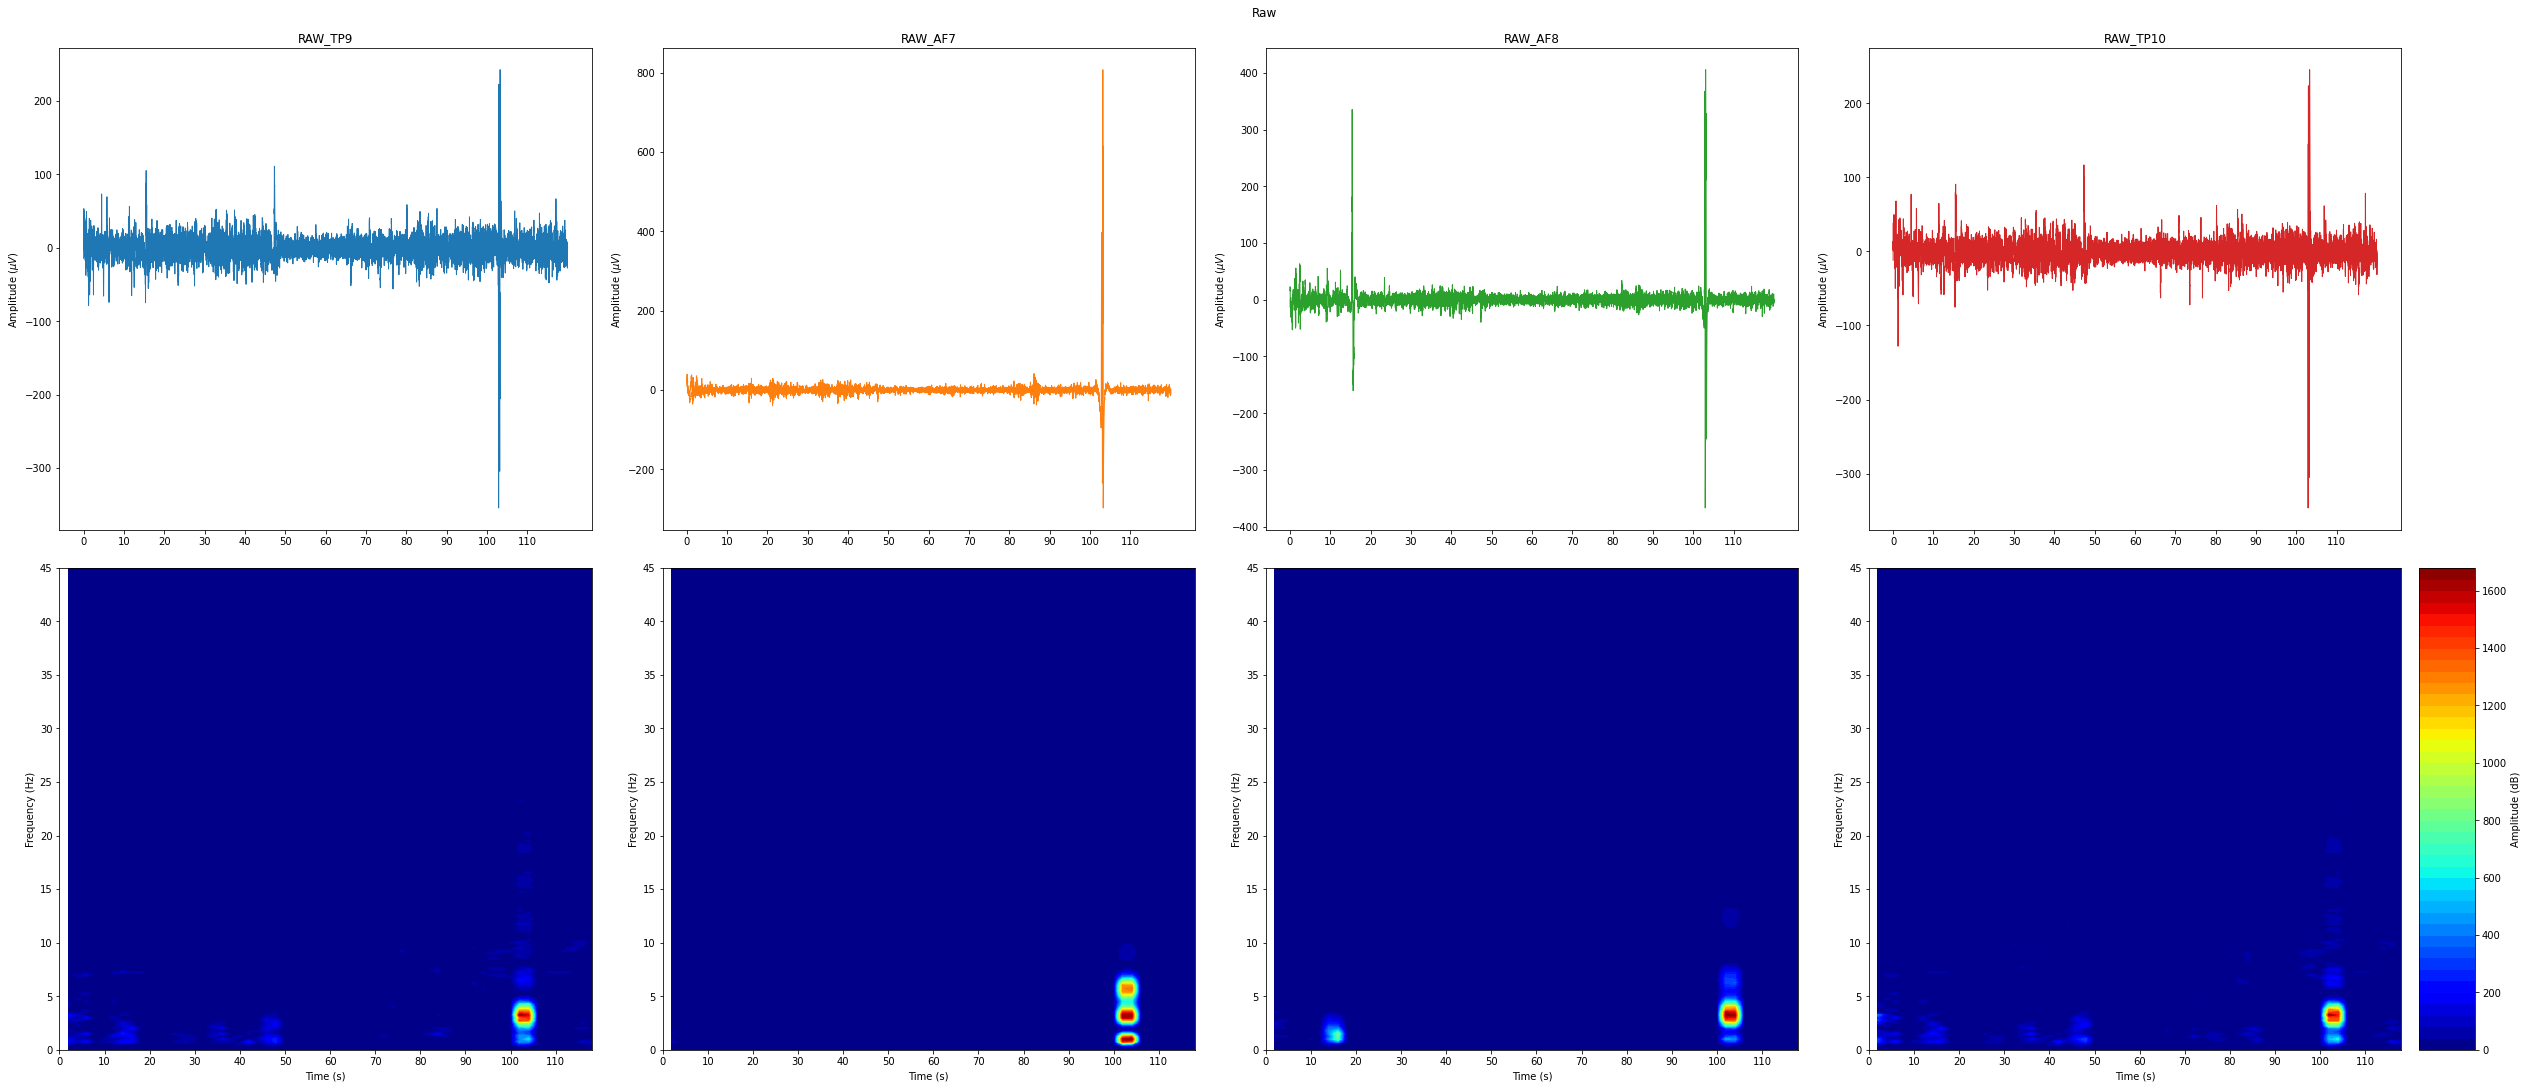

In [33]:
plots(data=band_M12[0],**args_1)
plots(data=band_M12[1],**args_1)
plots(data=band_M12[2],**args_1)
plots(data=band_M12[3],**args_1)
plots(data=band_M12[4],**args_1)

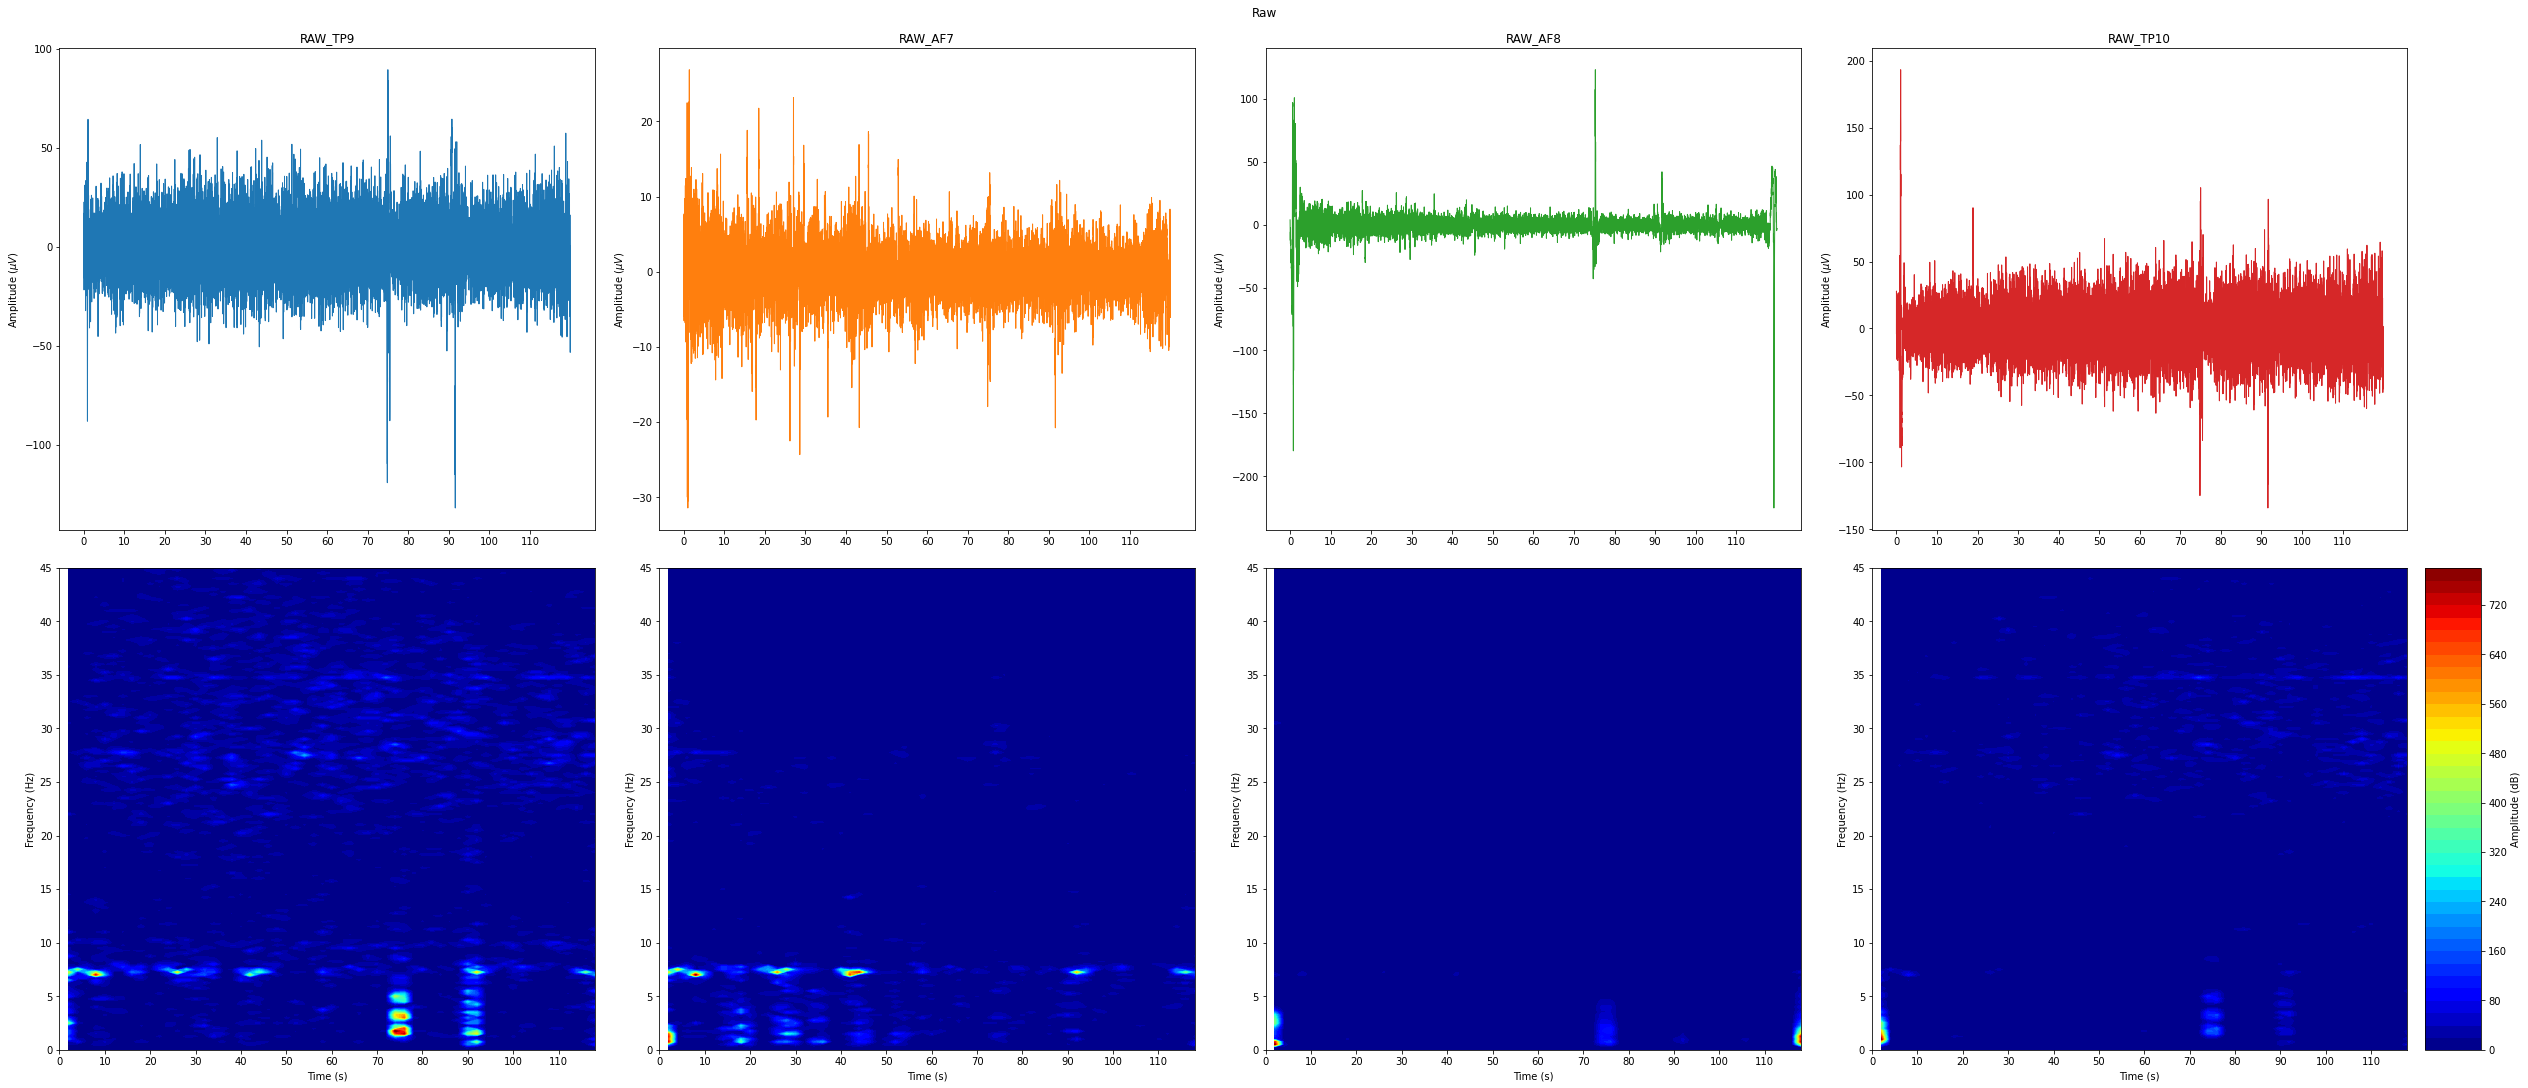

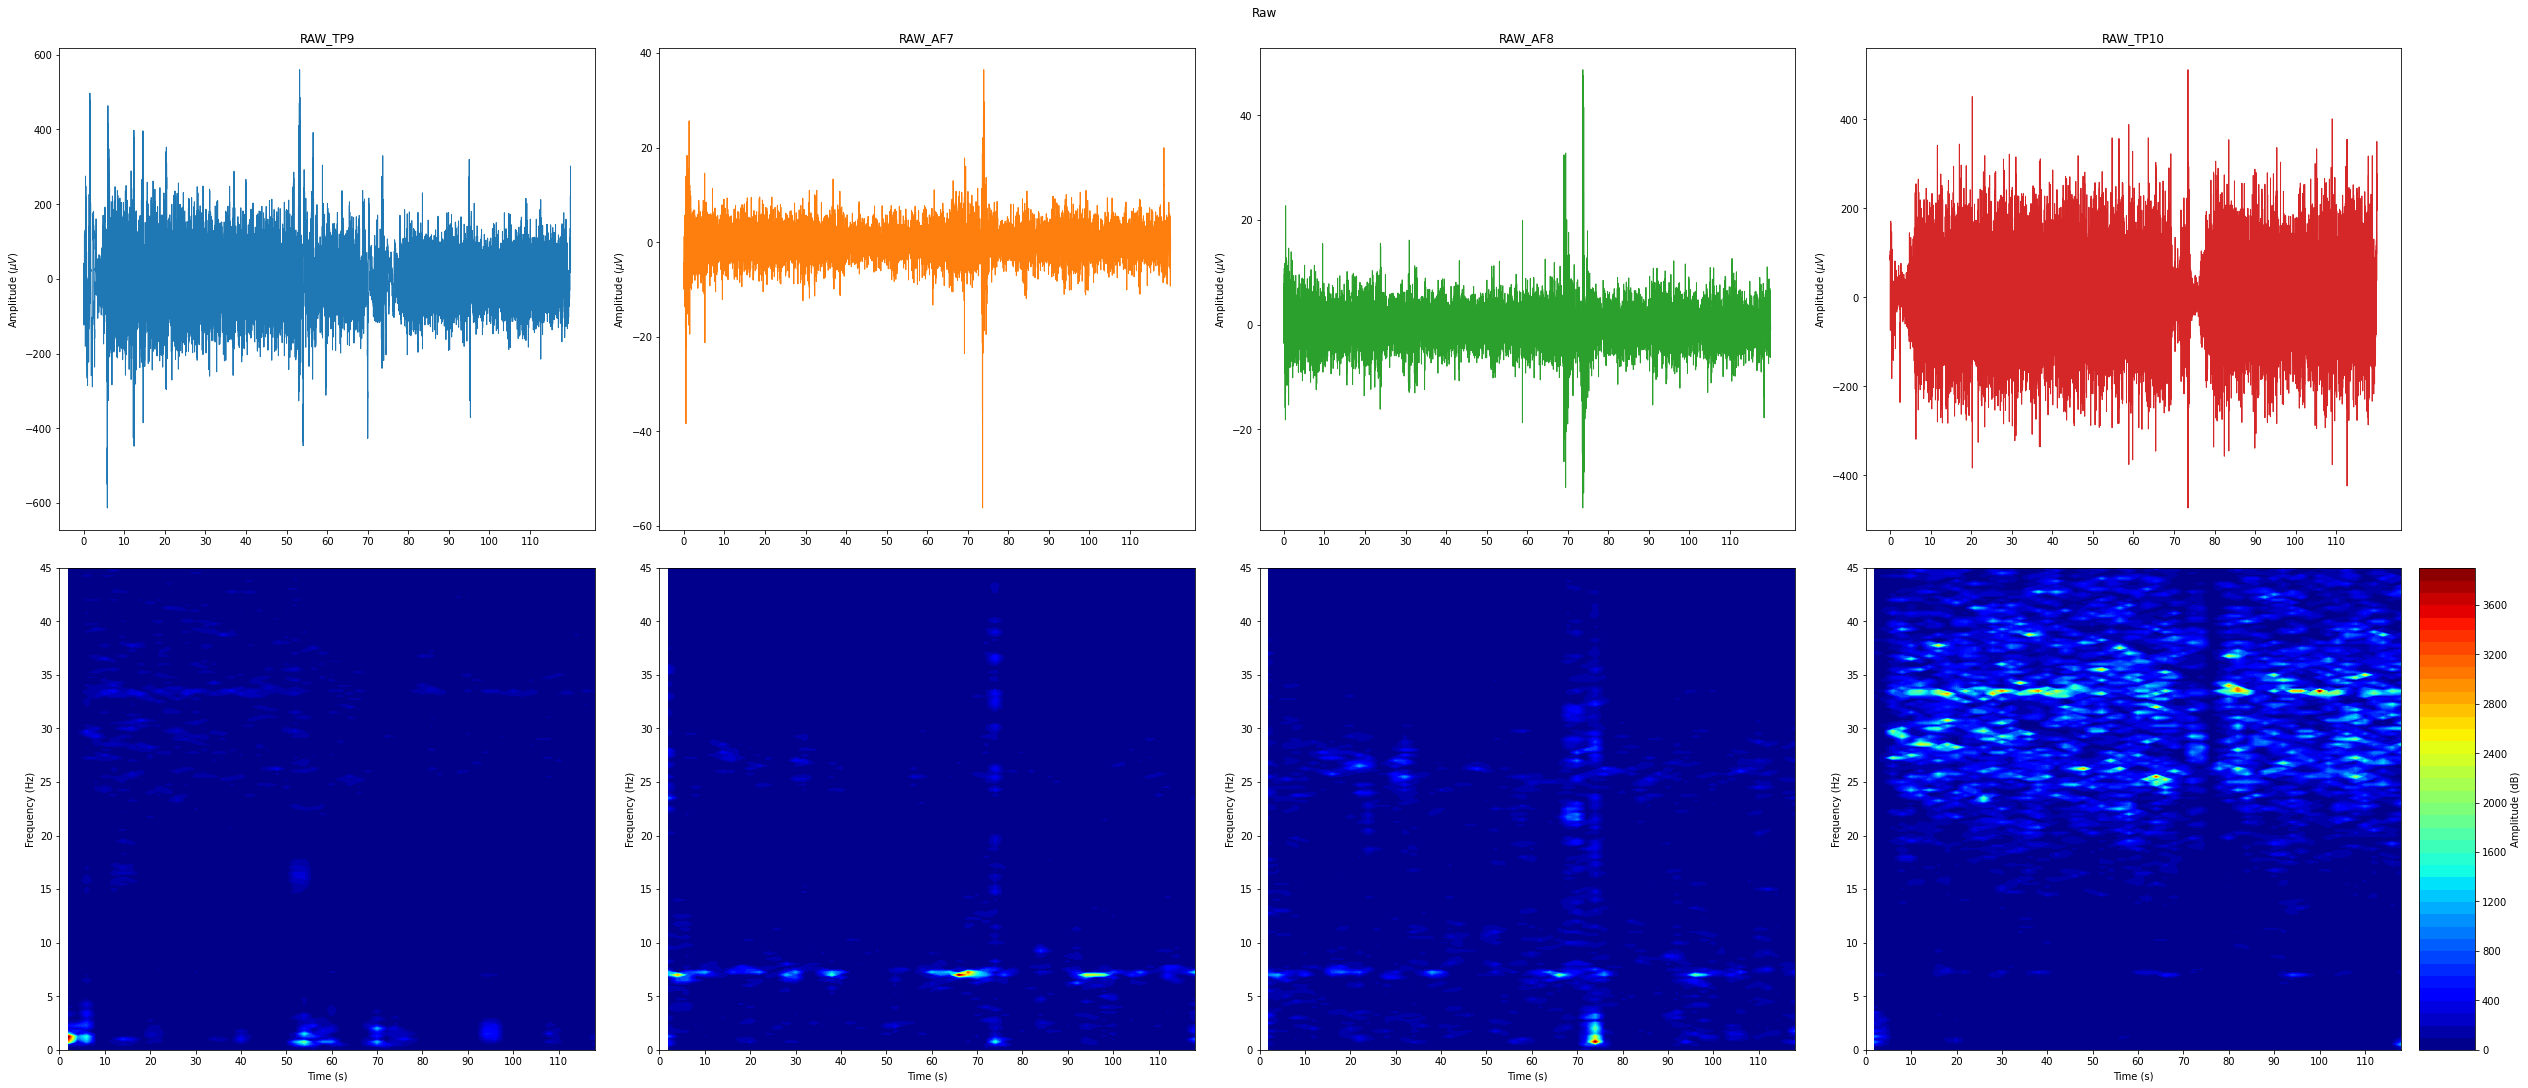

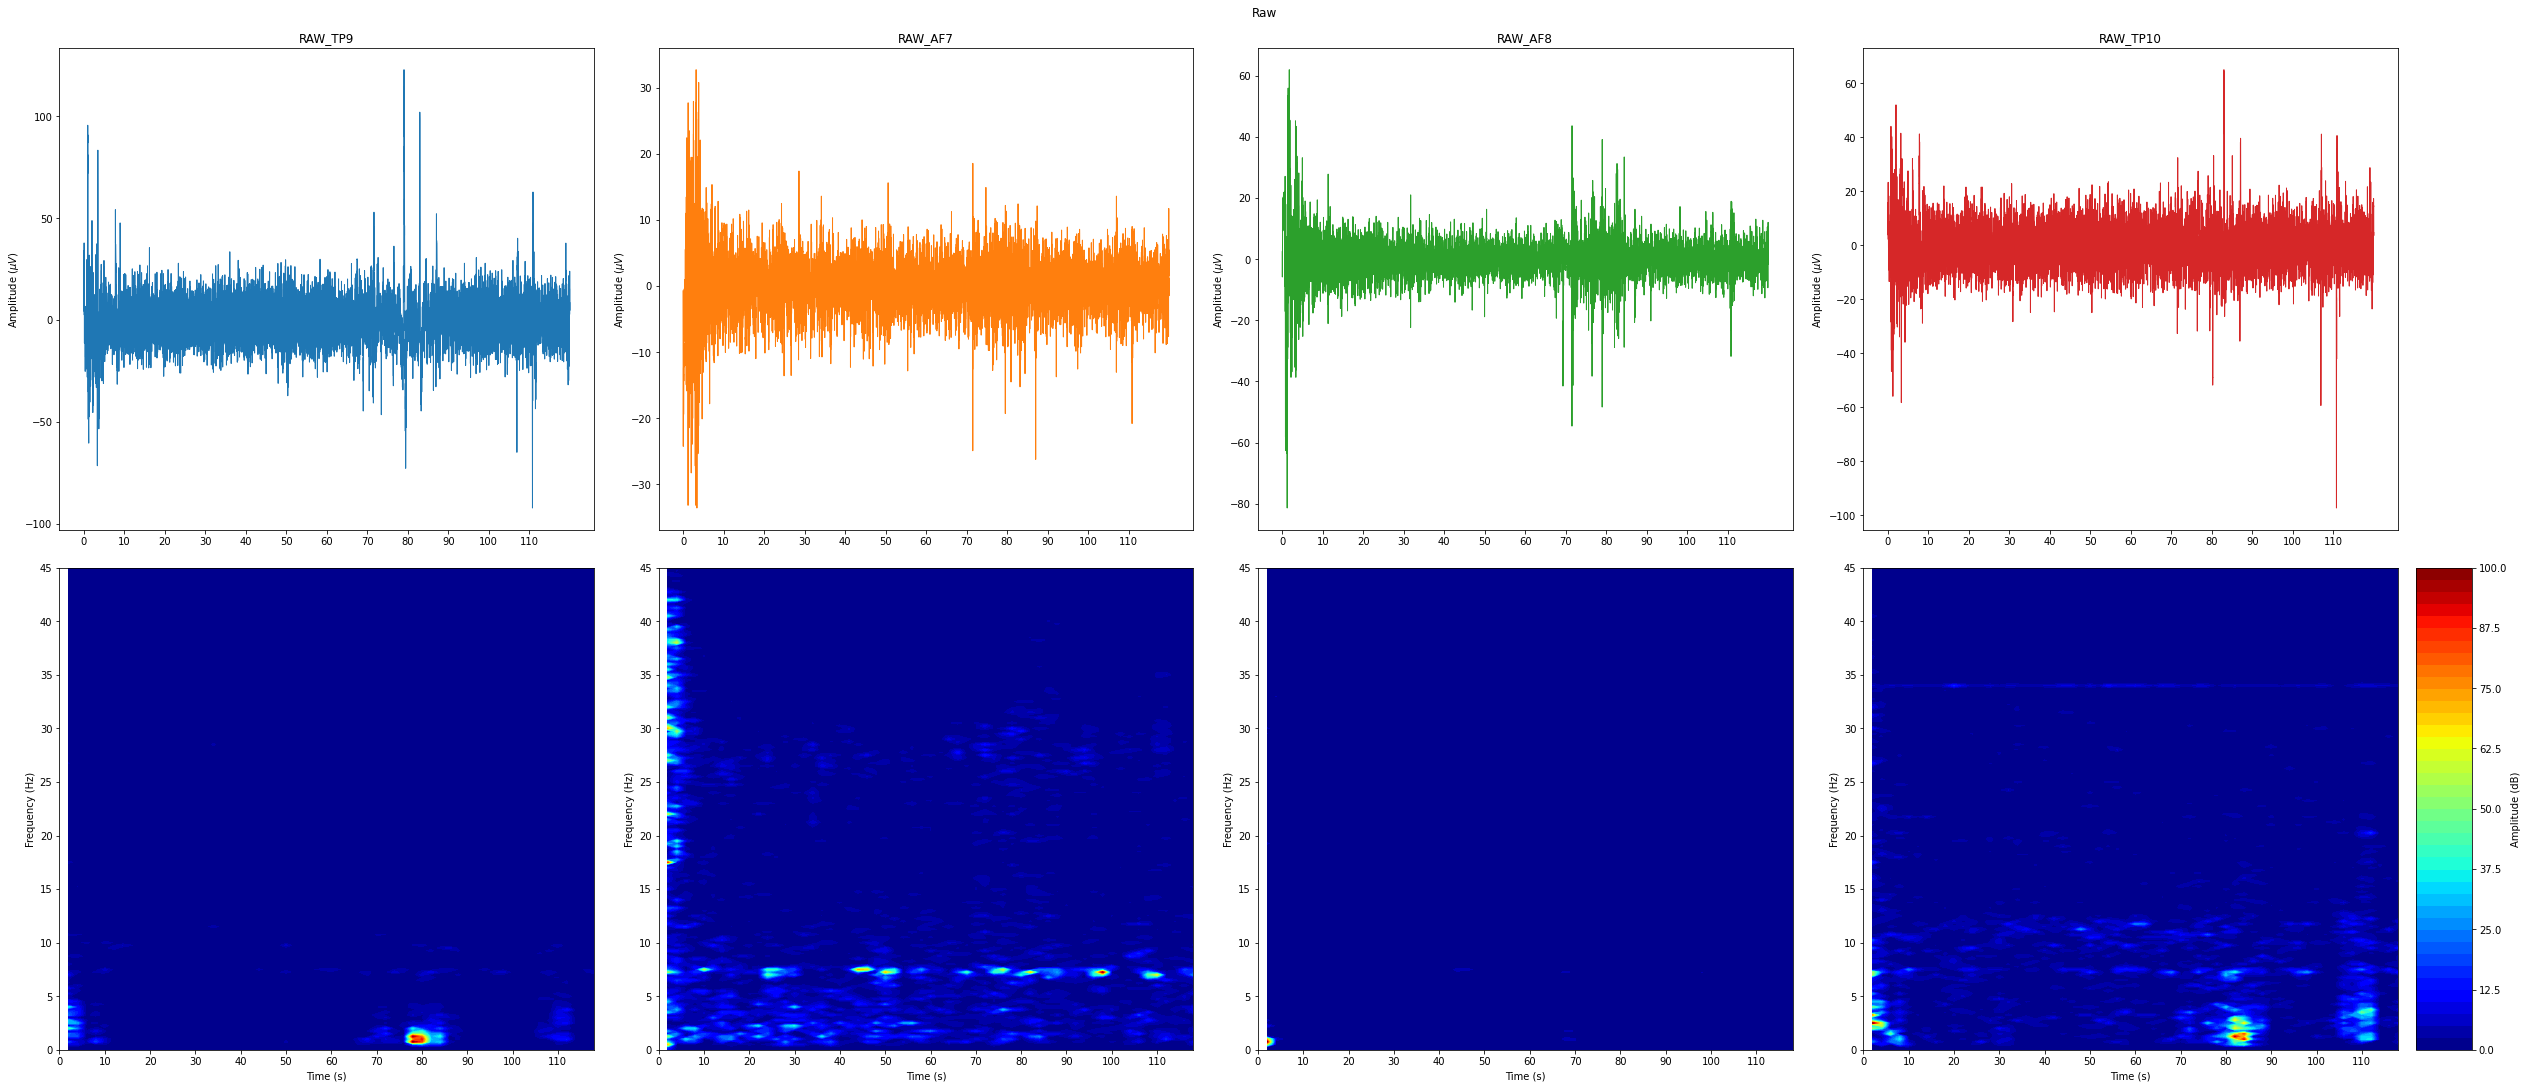

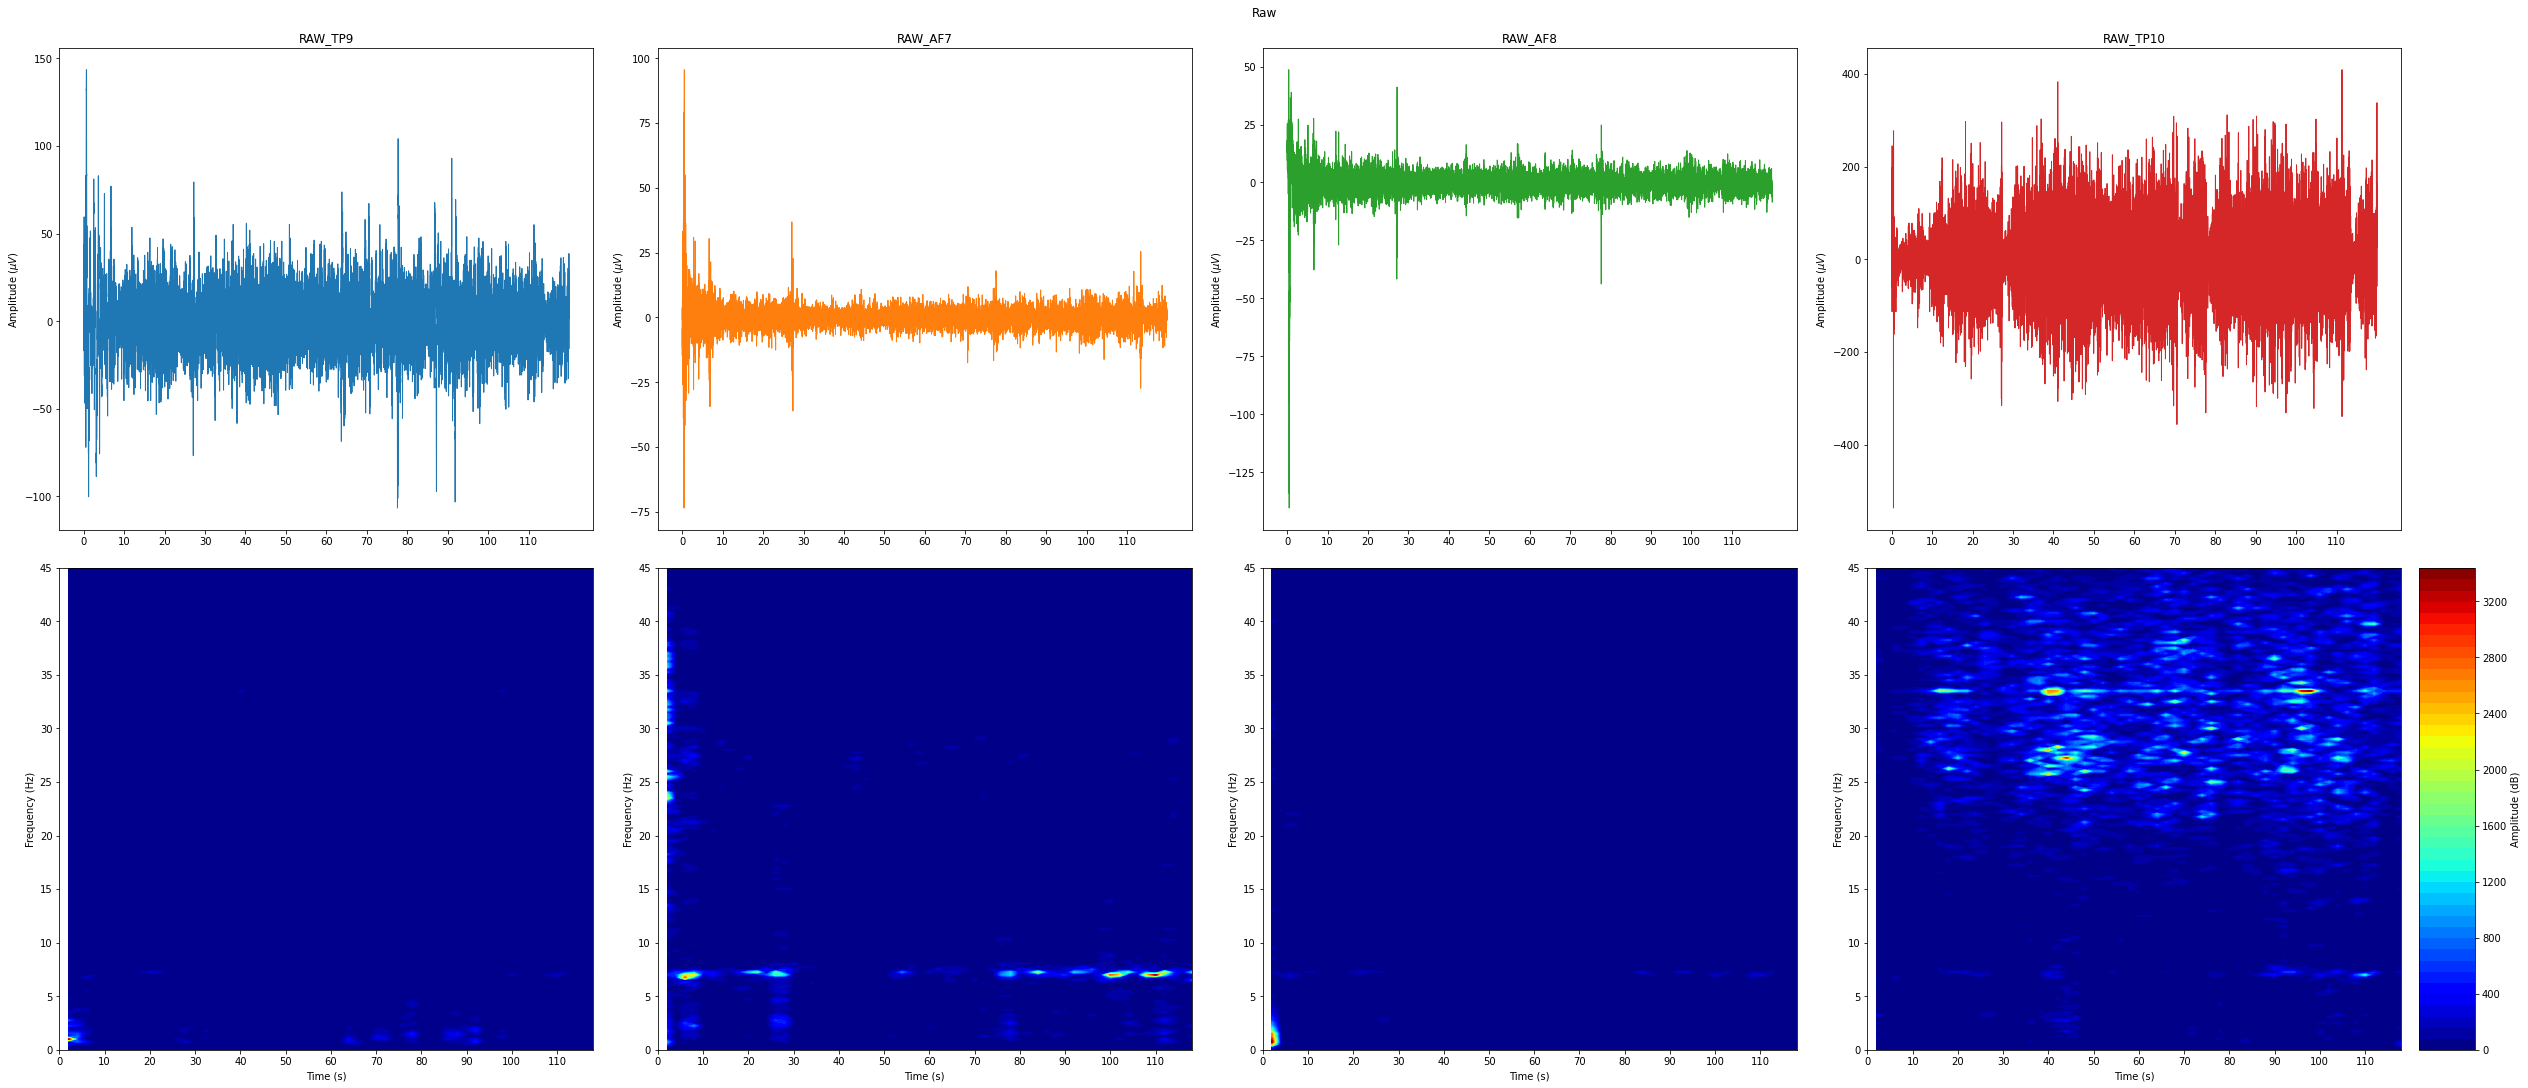

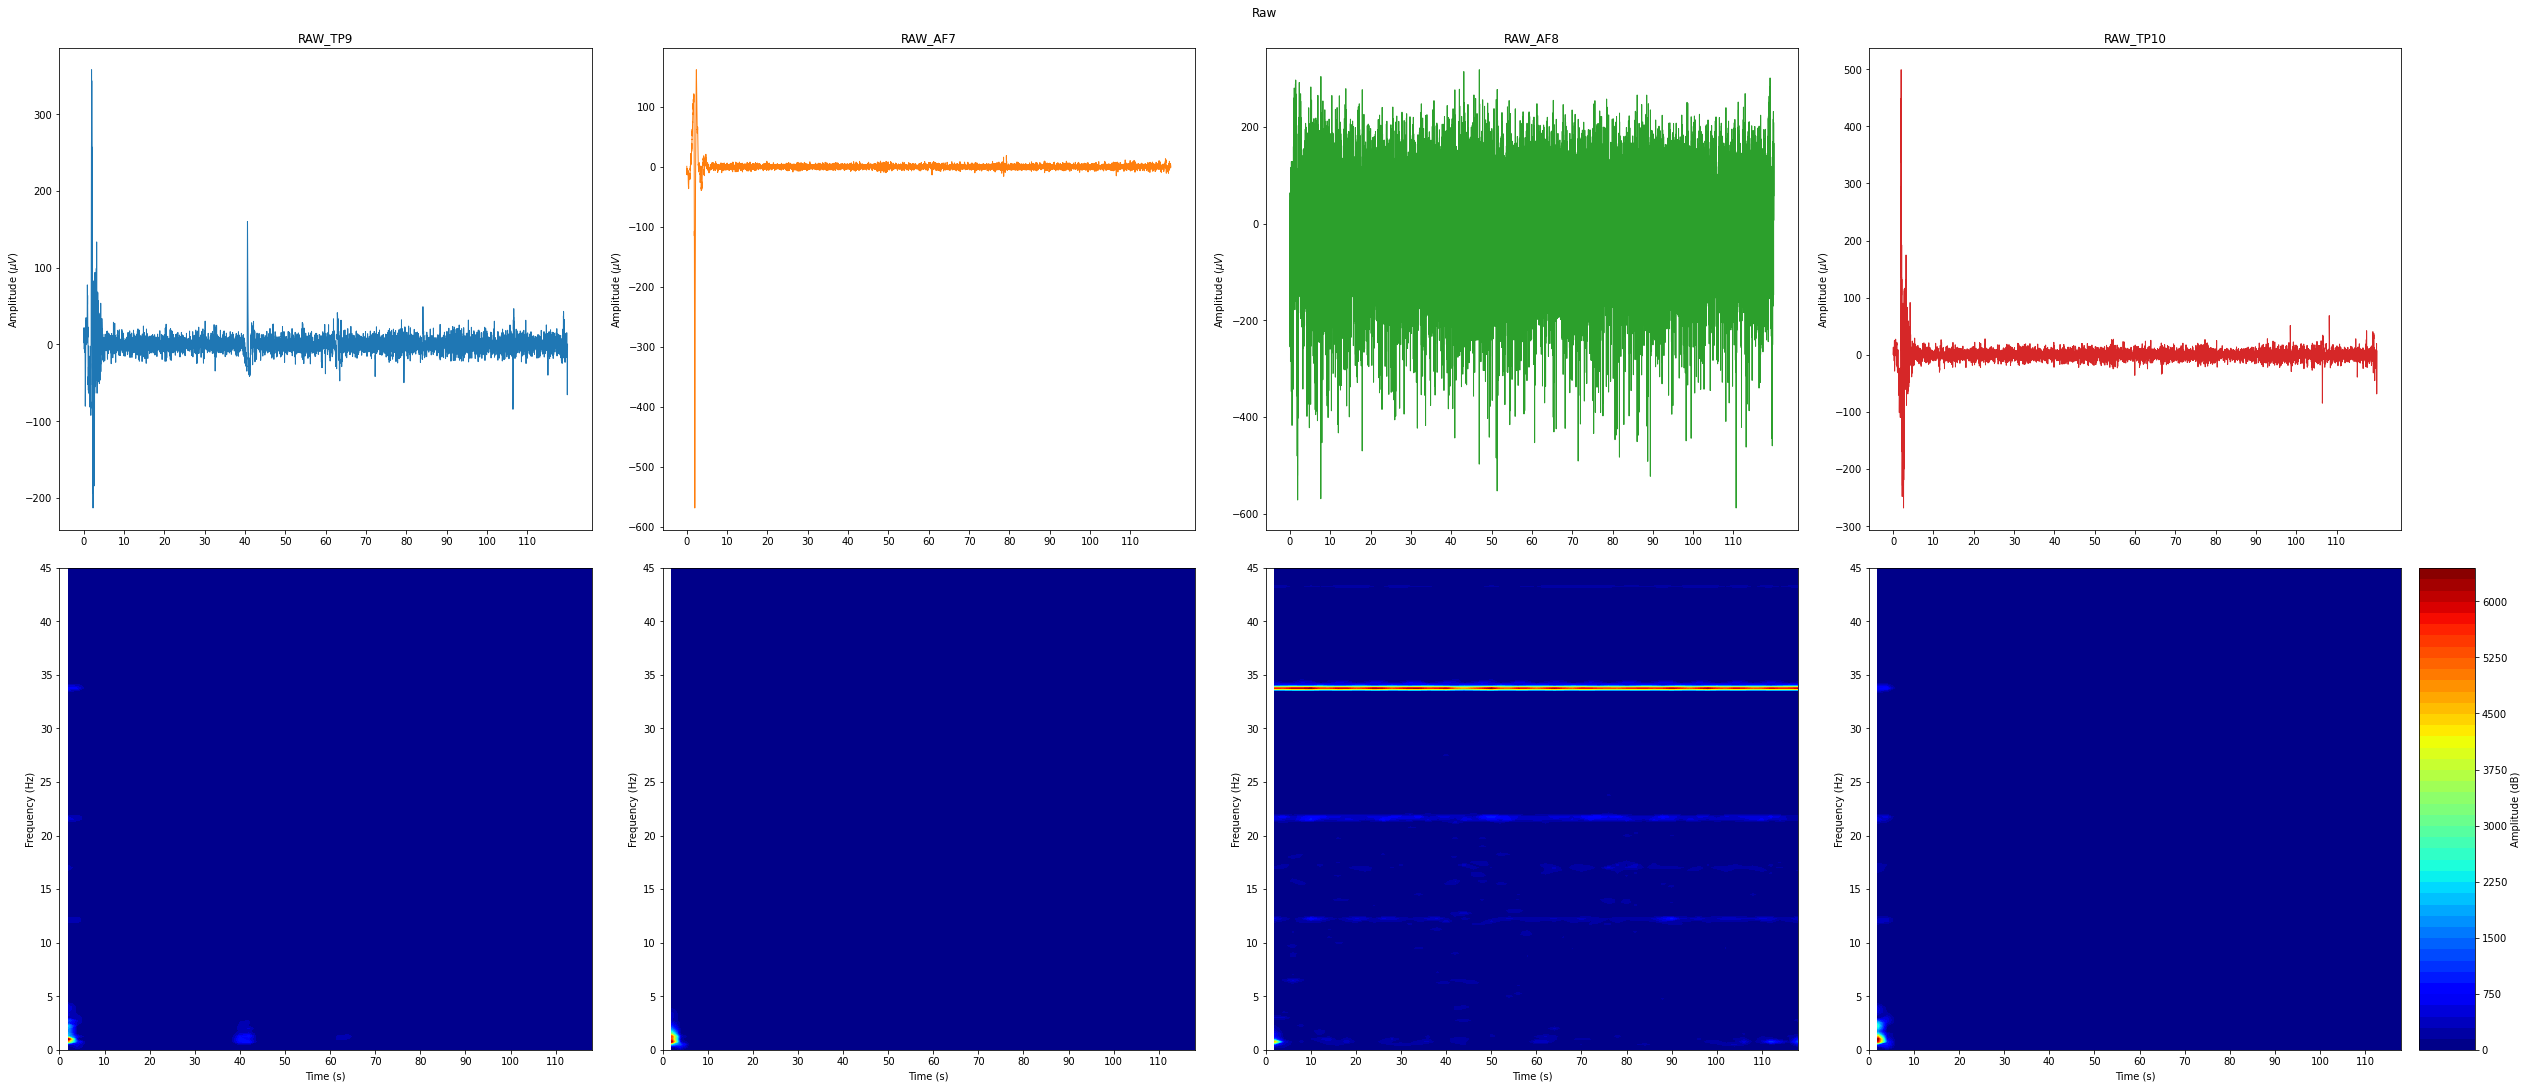

In [34]:
plots(data=band_M21[0],**args_1)
plots(data=band_M21[1],**args_1)
plots(data=band_M21[2],**args_1)
plots(data=band_M21[3],**args_1)
plots(data=band_M21[4],**args_1)

In [24]:
m1_delta = avgBandPower(n_eegM1,256,0.5,4)
m2_delta = avgBandPower(n_eegM2,256,0.5,4)
m1_theta = avgBandPower(n_eegM1,256,4,8)
m2_theta = avgBandPower(n_eegM2,256,4,8)
m1_alpha = avgBandPower(n_eegM1,256,8,12)
m2_alpha = avgBandPower(n_eegM2,256,8,12)
m1_beta = avgBandPower(n_eegM1,256,12,30)
m2_beta = avgBandPower(n_eegM2,256,12,30)
m1_gamma = avgBandPower(n_eegM1,256,30,50)
m2_gamma = avgBandPower(n_eegM2,256,30,50)
print("Delta:",m1_delta,m2_delta)
print("Theta:",m1_theta,m2_theta)
print("Alpha:",m1_alpha,m2_alpha)
print("Beta:",m1_beta,m2_beta)
print("Gamma:",m1_gamma,m2_gamma)

NameError: name 'n_eegM1' is not defined